In [1]:
#########
### importing bla bla bla ####
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from datetime import datetime
plt.rc("font", size=14)
import calendar

# from sklearn.cross_validation import train_test_split
# from pandas import Series, DataFrame
# from pylab import rcParams


# from sklearn.metrics import classification_report,accuracy_score
sb.set(style="white")
sb.set(style="whitegrid", color_codes=True)
# import itertools
# from sklearn import tree
# import graphviz
# from sklearn.model_selection import GridSearchCV,StratifiedKFold, LeaveOneOut
# from sklearn.datasets import make_regression
# from sklearn.ensemble import RandomForestClassifier

# import warnings; warnings.simplefilter('ignore')






### done with the imports ###



In [2]:
### reading data and printing the data ###
data = pd.read_csv('journal.pbio.2005143.s015.csv')
# data = data.dropna()
data = data.interpolate()
# data1.to_csv('temp.csv')
print(data.shape)
print(list(data.columns))
ID_list = data['userID'].unique()
meal_list = data['Meal'].unique()
print(ID_list)
print(meal_list)
ID_list_userfriendly = ",".join(ID_list)
print(ID_list_userfriendly)



### done with reading data and printing the data ###

(6235, 4)
['Meal', 'userID', 'time', 'GlucoseValue']
['2133-001' '2133-002' '2133-004' '2133-006' '2133-008' '2133-009'
 '2133-010' '2133-011' '2133-012' '2133-013' '2133-015' '2133-017'
 '2133-018' '2133-019' '2133-020' '2133-021' '2133-022' '2133-024'
 '2133-025' '2133-026' '2133-028' '2133-030' '2133-032' '2133-033'
 '2133-035' '2133-036' '2133-037' '2133-039' '2133-040' '2133-041']
['PB 1' 'PB 2' 'CF 1' 'CF 2' 'Bar 1' 'Bar 2']
2133-001,2133-002,2133-004,2133-006,2133-008,2133-009,2133-010,2133-011,2133-012,2133-013,2133-015,2133-017,2133-018,2133-019,2133-020,2133-021,2133-022,2133-024,2133-025,2133-026,2133-028,2133-030,2133-032,2133-033,2133-035,2133-036,2133-037,2133-039,2133-040,2133-041


2133-001 PB 1


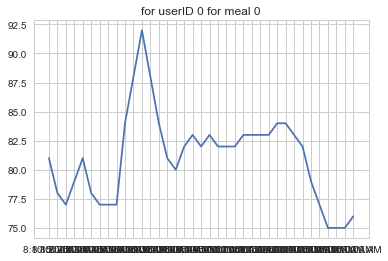

[81 78 77 79 81 78 77 77 77 84 88 92 88 84 81 80 82 83 82 83 82 82 82 83
 83 83 83 84 84 83 82 79 77 75 75 75 76]
              0
8:10:00 AM   81
8:15:00 AM   78
8:20:00 AM   77
8:25:00 AM   79
8:30:00 AM   81
8:35:00 AM   78
8:40:00 AM   77
8:45:00 AM   77
8:50:00 AM   77
8:55:00 AM   84
9:00:00 AM   88
9:05:00 AM   92
9:10:00 AM   88
9:15:00 AM   84
9:20:00 AM   81
9:25:00 AM   80
9:30:00 AM   82
9:35:00 AM   83
9:40:00 AM   82
9:45:00 AM   83
9:50:00 AM   82
9:55:00 AM   82
10:00:00 AM  82
10:05:00 AM  83
10:10:00 AM  83
10:15:00 AM  83
10:20:00 AM  83
10:25:00 AM  84
10:30:00 AM  84
10:35:00 AM  83
10:40:00 AM  82
10:45:00 AM  79
10:50:00 AM  77
10:55:00 AM  75
11:00:00 AM  75
11:05:00 AM  75
11:10:00 AM  76
2133-002 PB 1


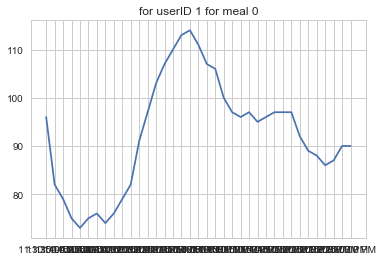

[ 96  82  79  75  73  75  76  74  76  79  82  91  97 103 107 110 113 114
 111 107 106 100  97  96  97  95  96  97  97  97  92  89  88  86  87  90
  90]
               0
11:30:00 AM   96
11:35:00 AM   82
11:40:00 AM   79
11:45:00 AM   75
11:50:00 AM   73
11:55:00 AM   75
12:00:00 PM   76
12:05:00 PM   74
12:10:00 PM   76
12:15:00 PM   79
12:20:00 PM   82
12:25:00 PM   91
12:30:00 PM   97
12:35:00 PM  103
12:40:00 PM  107
12:45:00 PM  110
12:50:00 PM  113
12:55:00 PM  114
1:00:00 PM   111
1:05:00 PM   107
1:10:00 PM   106
1:15:00 PM   100
1:20:00 PM    97
1:25:00 PM    96
1:30:00 PM    97
1:35:00 PM    95
1:40:00 PM    96
1:45:00 PM    97
1:50:00 PM    97
1:55:00 PM    97
2:00:00 PM    92
2:05:00 PM    89
2:10:00 PM    88
2:15:00 PM    86
2:20:00 PM    87
2:25:00 PM    90
2:30:00 PM    90
2133-004 PB 1


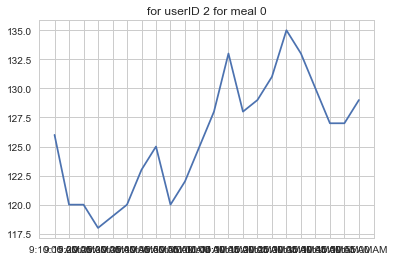

[126 120 120 118 119 120 123 125 120 122 125 128 133 128 129 131 135 133
 130 127 127 129]
               0
9:10:00 AM   126
9:15:00 AM   120
9:20:00 AM   120
9:25:00 AM   118
9:30:00 AM   119
9:35:00 AM   120
9:40:00 AM   123
9:45:00 AM   125
9:50:00 AM   120
9:55:00 AM   122
10:00:00 AM  125
10:05:00 AM  128
10:10:00 AM  133
10:15:00 AM  128
10:20:00 AM  129
10:25:00 AM  131
10:30:00 AM  135
10:35:00 AM  133
10:40:00 AM  130
10:45:00 AM  127
10:50:00 AM  127
10:55:00 AM  129
2133-006 PB 1


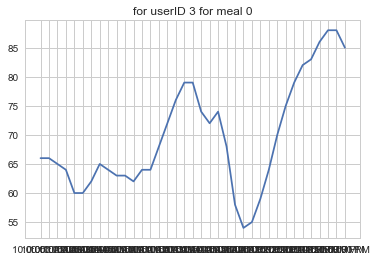

[66 66 65 64 60 60 62 65 64 63 63 62 64 64 68 72 76 79 79 74 72 74 68 58
 54 55 59 64 70 75 79 82 83 86 88 88 85]
              0
10:00:00 AM  66
10:05:00 AM  66
10:10:00 AM  65
10:15:00 AM  64
10:20:00 AM  60
10:25:00 AM  60
10:30:00 AM  62
10:35:00 AM  65
10:40:00 AM  64
10:45:00 AM  63
10:50:00 AM  63
10:55:00 AM  62
11:00:00 AM  64
11:05:00 AM  64
11:10:00 AM  68
11:15:00 AM  72
11:20:00 AM  76
11:25:00 AM  79
11:30:00 AM  79
11:35:00 AM  74
11:40:00 AM  72
11:45:00 AM  74
11:50:00 AM  68
11:55:00 AM  58
12:00:00 PM  54
12:05:00 PM  55
12:10:00 PM  59
12:15:00 PM  64
12:20:00 PM  70
12:25:00 PM  75
12:30:00 PM  79
12:35:00 PM  82
12:40:00 PM  83
12:45:00 PM  86
12:50:00 PM  88
12:55:00 PM  88
1:00:00 PM   85
2133-008 PB 1


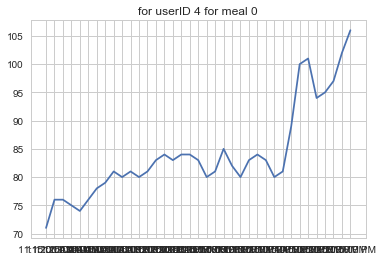

[ 71  76  76  75  74  76  78  79  81  80  81  80  81  83  84  83  84  84
  83  80  81  85  82  80  83  84  83  80  81  89 100 101  94  95  97 102
 106]
               0
11:15:00 AM   71
11:20:00 AM   76
11:25:00 AM   76
11:30:00 AM   75
11:35:00 AM   74
11:40:00 AM   76
11:45:00 AM   78
11:50:00 AM   79
11:55:00 AM   81
12:00:00 PM   80
12:05:00 PM   81
12:10:00 PM   80
12:15:00 PM   81
12:20:00 PM   83
12:25:00 PM   84
12:30:00 PM   83
12:35:00 PM   84
12:40:00 PM   84
12:45:00 PM   83
12:50:00 PM   80
12:55:00 PM   81
1:00:00 PM    85
1:05:00 PM    82
1:10:00 PM    80
1:15:00 PM    83
1:20:00 PM    84
1:25:00 PM    83
1:30:00 PM    80
1:35:00 PM    81
1:40:00 PM    89
1:45:00 PM   100
1:50:00 PM   101
1:55:00 PM    94
2:00:00 PM    95
2:05:00 PM    97
2:10:00 PM   102
2:15:00 PM   106
2133-009 PB 1


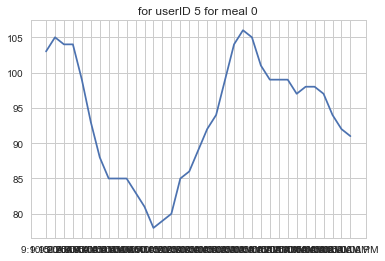

[103 105 104 104  99  93  88  85  85  85  83  81  78  79  80  85  86  89
  92  94  99 104 106 105 101  99  99  99  97  98  98  97  94  92  91]
               0
9:10:00 AM   103
9:15:00 AM   105
9:20:00 AM   104
9:25:00 AM   104
9:30:00 AM    99
9:35:00 AM    93
9:40:00 AM    88
9:45:00 AM    85
9:50:00 AM    85
9:55:00 AM    85
10:00:00 AM   83
10:05:00 AM   81
10:10:00 AM   78
10:15:00 AM   79
10:20:00 AM   80
10:25:00 AM   85
10:30:00 AM   86
10:35:00 AM   89
10:40:00 AM   92
10:45:00 AM   94
10:50:00 AM   99
10:55:00 AM  104
11:00:00 AM  106
11:05:00 AM  105
11:10:00 AM  101
11:15:00 AM   99
11:20:00 AM   99
11:25:00 AM   99
11:30:00 AM   97
11:35:00 AM   98
11:40:00 AM   98
11:45:00 AM   97
11:50:00 AM   94
11:55:00 AM   92
12:00:00 PM   91
2133-010 PB 1


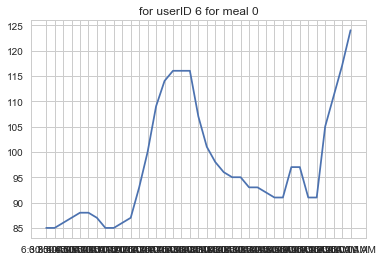

[ 85  85  86  87  88  88  87  85  85  86  87  93 100 109 114 116 116 116
 107 101  98  96  95  95  93  93  92  91  91  97  97  91  91 105 111 117
 124]
              0
6:30:00 AM   85
6:35:00 AM   85
6:40:00 AM   86
6:45:00 AM   87
6:50:00 AM   88
6:55:00 AM   88
7:00:00 AM   87
7:05:00 AM   85
7:10:00 AM   85
7:15:00 AM   86
7:20:00 AM   87
7:25:00 AM   93
7:30:00 AM  100
7:35:00 AM  109
7:40:00 AM  114
7:45:00 AM  116
7:50:00 AM  116
7:55:00 AM  116
8:00:00 AM  107
8:05:00 AM  101
8:10:00 AM   98
8:15:00 AM   96
8:20:00 AM   95
8:25:00 AM   95
8:30:00 AM   93
8:35:00 AM   93
8:40:00 AM   92
8:45:00 AM   91
8:50:00 AM   91
8:55:00 AM   97
9:00:00 AM   97
9:05:00 AM   91
9:10:00 AM   91
9:15:00 AM  105
9:20:00 AM  111
9:25:00 AM  117
9:30:00 AM  124
2133-011 PB 1


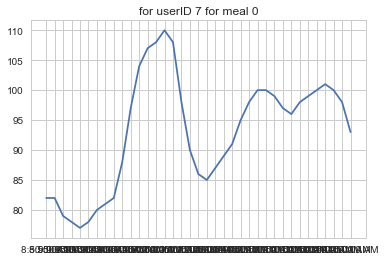

[ 82  82  79  78  77  78  80  81  82  88  97 104 107 108 110 108  98  90
  86  85  87  89  91  95  98 100 100  99  97  96  98  99 100 101 100  98
  93]
               0
8:50:00 AM    82
8:55:00 AM    82
9:00:00 AM    79
9:05:00 AM    78
9:10:00 AM    77
9:15:00 AM    78
9:20:00 AM    80
9:25:00 AM    81
9:30:00 AM    82
9:35:00 AM    88
9:40:00 AM    97
9:45:00 AM   104
9:50:00 AM   107
9:55:00 AM   108
10:00:00 AM  110
10:05:00 AM  108
10:10:00 AM   98
10:15:00 AM   90
10:20:00 AM   86
10:25:00 AM   85
10:30:00 AM   87
10:35:00 AM   89
10:40:00 AM   91
10:45:00 AM   95
10:50:00 AM   98
10:55:00 AM  100
11:00:00 AM  100
11:05:00 AM   99
11:10:00 AM   97
11:15:00 AM   96
11:20:00 AM   98
11:25:00 AM   99
11:30:00 AM  100
11:35:00 AM  101
11:40:00 AM  100
11:45:00 AM   98
11:50:00 AM   93
2133-012 PB 1


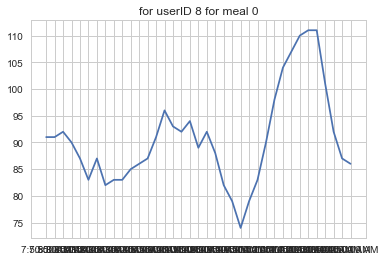

[ 91  91  92  90  87  83  87  82  83  83  85  86  87  91  96  93  92  94
  89  92  88  82  79  74  79  83  90  98 104 107 110 111 111 101  92  87
  86]
               0
7:50:00 AM    91
7:55:00 AM    91
8:00:00 AM    92
8:05:00 AM    90
8:10:00 AM    87
8:15:00 AM    83
8:20:00 AM    87
8:25:00 AM    82
8:30:00 AM    83
8:35:00 AM    83
8:40:00 AM    85
8:45:00 AM    86
8:50:00 AM    87
8:55:00 AM    91
9:00:00 AM    96
9:05:00 AM    93
9:10:00 AM    92
9:15:00 AM    94
9:20:00 AM    89
9:25:00 AM    92
9:30:00 AM    88
9:35:00 AM    82
9:40:00 AM    79
9:45:00 AM    74
9:50:00 AM    79
9:55:00 AM    83
10:00:00 AM   90
10:05:00 AM   98
10:10:00 AM  104
10:15:00 AM  107
10:20:00 AM  110
10:25:00 AM  111
10:30:00 AM  111
10:35:00 AM  101
10:40:00 AM   92
10:45:00 AM   87
10:50:00 AM   86
2133-013 PB 1


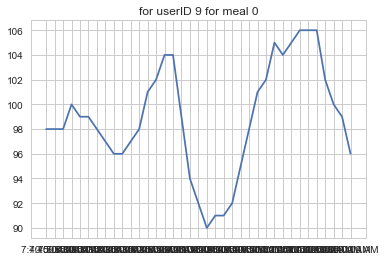

[ 98  98  98 100  99  99  98  97  96  96  97  98 101 102 104 104  99  94
  92  90  91  91  92  95  98 101 102 105 104 105 106 106 106 102 100  99
  96]
               0
7:40:00 AM    98
7:45:00 AM    98
7:50:00 AM    98
7:55:00 AM   100
8:00:00 AM    99
8:05:00 AM    99
8:10:00 AM    98
8:15:00 AM    97
8:20:00 AM    96
8:25:00 AM    96
8:30:00 AM    97
8:35:00 AM    98
8:40:00 AM   101
8:45:00 AM   102
8:50:00 AM   104
8:55:00 AM   104
9:00:00 AM    99
9:05:00 AM    94
9:10:00 AM    92
9:15:00 AM    90
9:20:00 AM    91
9:25:00 AM    91
9:30:00 AM    92
9:35:00 AM    95
9:40:00 AM    98
9:45:00 AM   101
9:50:00 AM   102
9:55:00 AM   105
10:00:00 AM  104
10:05:00 AM  105
10:10:00 AM  106
10:15:00 AM  106
10:20:00 AM  106
10:25:00 AM  102
10:30:00 AM  100
10:35:00 AM   99
10:40:00 AM   96
2133-015 PB 1


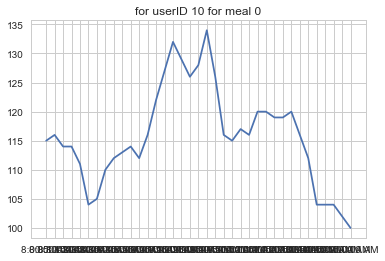

[115 116 114 114 111 104 105 110 112 113 114 112 116 122 127 132 129 126
 128 134 126 116 115 117 116 120 120 119 119 120 116 112 104 104 104 102
 100]
               0
8:00:00 AM   115
8:05:00 AM   116
8:10:00 AM   114
8:15:00 AM   114
8:20:00 AM   111
8:25:00 AM   104
8:30:00 AM   105
8:35:00 AM   110
8:40:00 AM   112
8:45:00 AM   113
8:50:00 AM   114
8:55:00 AM   112
9:00:00 AM   116
9:05:00 AM   122
9:10:00 AM   127
9:15:00 AM   132
9:20:00 AM   129
9:25:00 AM   126
9:30:00 AM   128
9:35:00 AM   134
9:40:00 AM   126
9:45:00 AM   116
9:50:00 AM   115
9:55:00 AM   117
10:00:00 AM  116
10:05:00 AM  120
10:10:00 AM  120
10:15:00 AM  119
10:20:00 AM  119
10:25:00 AM  120
10:30:00 AM  116
10:35:00 AM  112
10:40:00 AM  104
10:45:00 AM  104
10:50:00 AM  104
10:55:00 AM  102
11:00:00 AM  100
2133-017 PB 1


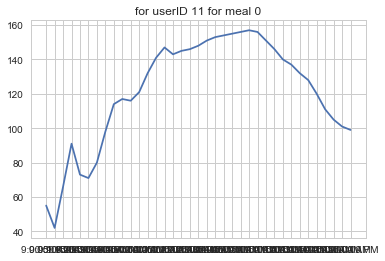

[ 55  42  66  91  73  71  80  98 114 117 116 121 132 141 147 143 145 146
 148 151 153 154 155 156 157 156 151 146 140 137 132 128 120 111 105 101
  99]
               0
9:00:00 AM    55
9:05:00 AM    42
9:10:00 AM    66
9:15:00 AM    91
9:20:00 AM    73
9:25:00 AM    71
9:30:00 AM    80
9:35:00 AM    98
9:40:00 AM   114
9:45:00 AM   117
9:50:00 AM   116
9:55:00 AM   121
10:00:00 AM  132
10:05:00 AM  141
10:10:00 AM  147
10:15:00 AM  143
10:20:00 AM  145
10:25:00 AM  146
10:30:00 AM  148
10:35:00 AM  151
10:40:00 AM  153
10:45:00 AM  154
10:50:00 AM  155
10:55:00 AM  156
11:00:00 AM  157
11:05:00 AM  156
11:10:00 AM  151
11:15:00 AM  146
11:20:00 AM  140
11:25:00 AM  137
11:30:00 AM  132
11:35:00 AM  128
11:40:00 AM  120
11:45:00 AM  111
11:50:00 AM  105
11:55:00 AM  101
12:00:00 PM   99
2133-018 PB 1


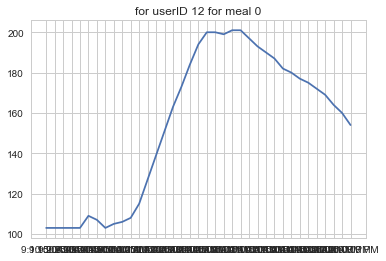

[103 103 103 103 103 109 107 103 105 106 108 115 127 139 151 163 173 184
 194 200 200 199 201 201 197 193 190 187 182 180 177 175 172 169 164 160
 154]
               0
9:10:00 AM   103
9:15:00 AM   103
9:20:00 AM   103
9:25:00 AM   103
9:30:00 AM   103
9:35:00 AM   109
9:40:00 AM   107
9:45:00 AM   103
9:50:00 AM   105
9:55:00 AM   106
10:00:00 AM  108
10:05:00 AM  115
10:10:00 AM  127
10:15:00 AM  139
10:20:00 AM  151
10:25:00 AM  163
10:30:00 AM  173
10:35:00 AM  184
10:40:00 AM  194
10:45:00 AM  200
10:50:00 AM  200
10:55:00 AM  199
11:00:00 AM  201
11:05:00 AM  201
11:10:00 AM  197
11:15:00 AM  193
11:20:00 AM  190
11:25:00 AM  187
11:30:00 AM  182
11:35:00 AM  180
11:40:00 AM  177
11:45:00 AM  175
11:50:00 AM  172
11:55:00 AM  169
12:00:00 PM  164
12:05:00 PM  160
12:10:00 PM  154
2133-019 PB 1


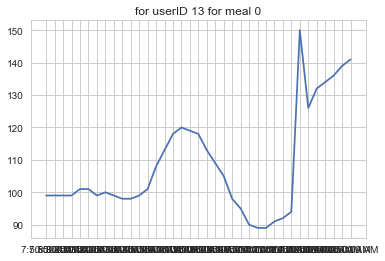

[ 99  99  99  99 101 101  99 100  99  98  98  99 101 108 113 118 120 119
 118 113 109 105  98  95  90  89  89  91  92  94 150 126 132 134 136 139
 141]
               0
7:50:00 AM    99
7:55:00 AM    99
8:00:00 AM    99
8:05:00 AM    99
8:10:00 AM   101
8:15:00 AM   101
8:20:00 AM    99
8:25:00 AM   100
8:30:00 AM    99
8:35:00 AM    98
8:40:00 AM    98
8:45:00 AM    99
8:50:00 AM   101
8:55:00 AM   108
9:00:00 AM   113
9:05:00 AM   118
9:10:00 AM   120
9:15:00 AM   119
9:20:00 AM   118
9:25:00 AM   113
9:30:00 AM   109
9:35:00 AM   105
9:40:00 AM    98
9:45:00 AM    95
9:50:00 AM    90
9:55:00 AM    89
10:00:00 AM   89
10:05:00 AM   91
10:10:00 AM   92
10:15:00 AM   94
10:20:00 AM  150
10:25:00 AM  126
10:30:00 AM  132
10:35:00 AM  134
10:40:00 AM  136
10:45:00 AM  139
10:50:00 AM  141
2133-020 PB 1


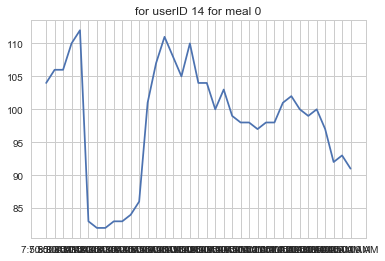

[104 106 106 110 112  83  82  82  83  83  84  86 101 107 111 108 105 110
 104 104 100 103  99  98  98  97  98  98 101 102 100  99 100  97  92  93
  91]
               0
7:50:00 AM   104
7:55:00 AM   106
8:00:00 AM   106
8:05:00 AM   110
8:10:00 AM   112
8:15:00 AM    83
8:20:00 AM    82
8:25:00 AM    82
8:30:00 AM    83
8:35:00 AM    83
8:40:00 AM    84
8:45:00 AM    86
8:50:00 AM   101
8:55:00 AM   107
9:00:00 AM   111
9:05:00 AM   108
9:10:00 AM   105
9:15:00 AM   110
9:20:00 AM   104
9:25:00 AM   104
9:30:00 AM   100
9:35:00 AM   103
9:40:00 AM    99
9:45:00 AM    98
9:50:00 AM    98
9:55:00 AM    97
10:00:00 AM   98
10:05:00 AM   98
10:10:00 AM  101
10:15:00 AM  102
10:20:00 AM  100
10:25:00 AM   99
10:30:00 AM  100
10:35:00 AM   97
10:40:00 AM   92
10:45:00 AM   93
10:50:00 AM   91
2133-021 PB 1


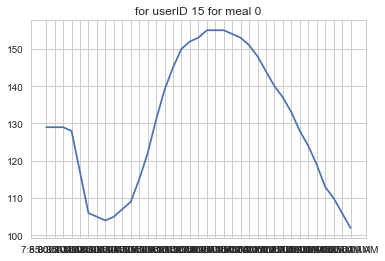

[129 129 129 128 117 106 105 104 105 107 109 115 122 131 139 145 150 152
 153 155 155 155 154 153 151 148 144 140 137 133 128 124 119 113 110 106
 102]
               0
7:55:00 AM   129
8:00:00 AM   129
8:05:00 AM   129
8:10:00 AM   128
8:15:00 AM   117
8:20:00 AM   106
8:25:00 AM   105
8:30:00 AM   104
8:35:00 AM   105
8:40:00 AM   107
8:45:00 AM   109
8:50:00 AM   115
8:55:00 AM   122
9:00:00 AM   131
9:05:00 AM   139
9:10:00 AM   145
9:15:00 AM   150
9:20:00 AM   152
9:25:00 AM   153
9:30:00 AM   155
9:35:00 AM   155
9:40:00 AM   155
9:45:00 AM   154
9:50:00 AM   153
9:55:00 AM   151
10:00:00 AM  148
10:05:00 AM  144
10:10:00 AM  140
10:15:00 AM  137
10:20:00 AM  133
10:25:00 AM  128
10:30:00 AM  124
10:35:00 AM  119
10:40:00 AM  113
10:45:00 AM  110
10:50:00 AM  106
10:55:00 AM  102
2133-022 PB 1


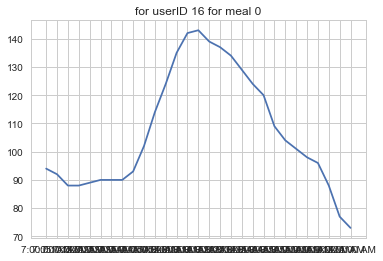

[ 94  92  88  88  89  90  90  90  93 102 114 124 135 142 143 139 137 134
 129 124 120 109 104 101  98  96  88  77  73]
              0
7:00:00 AM   94
7:05:00 AM   92
7:10:00 AM   88
7:15:00 AM   88
7:20:00 AM   89
7:25:00 AM   90
7:30:00 AM   90
7:35:00 AM   90
7:40:00 AM   93
7:45:00 AM  102
7:50:00 AM  114
7:55:00 AM  124
8:00:00 AM  135
8:05:00 AM  142
8:10:00 AM  143
8:15:00 AM  139
8:20:00 AM  137
8:25:00 AM  134
8:30:00 AM  129
8:35:00 AM  124
8:40:00 AM  120
8:45:00 AM  109
8:50:00 AM  104
8:55:00 AM  101
9:00:00 AM   98
9:05:00 AM   96
9:10:00 AM   88
9:15:00 AM   77
9:20:00 AM   73
2133-024 PB 1


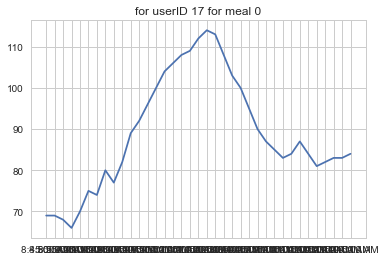

[ 69  69  68  66  70  75  74  80  77  82  89  92  96 100 104 106 108 109
 112 114 113 108 103 100  95  90  87  85  83  84  87  84  81  82  83  83
  84]
               0
8:45:00 AM    69
8:50:00 AM    69
8:55:00 AM    68
9:00:00 AM    66
9:05:00 AM    70
9:10:00 AM    75
9:15:00 AM    74
9:20:00 AM    80
9:25:00 AM    77
9:30:00 AM    82
9:35:00 AM    89
9:40:00 AM    92
9:45:00 AM    96
9:50:00 AM   100
9:55:00 AM   104
10:00:00 AM  106
10:05:00 AM  108
10:10:00 AM  109
10:15:00 AM  112
10:20:00 AM  114
10:25:00 AM  113
10:30:00 AM  108
10:35:00 AM  103
10:40:00 AM  100
10:45:00 AM   95
10:50:00 AM   90
10:55:00 AM   87
11:00:00 AM   85
11:05:00 AM   83
11:10:00 AM   84
11:15:00 AM   87
11:20:00 AM   84
11:25:00 AM   81
11:30:00 AM   82
11:35:00 AM   83
11:40:00 AM   83
11:45:00 AM   84
2133-025 PB 1


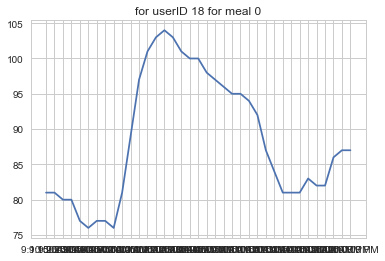

[ 81  81  80  80  77  76  77  77  76  81  89  97 101 103 104 103 101 100
 100  98  97  96  95  95  94  92  87  84  81  81  81  83  82  82  86  87
  87]
               0
9:10:00 AM    81
9:15:00 AM    81
9:20:00 AM    80
9:25:00 AM    80
9:30:00 AM    77
9:35:00 AM    76
9:40:00 AM    77
9:45:00 AM    77
9:50:00 AM    76
9:55:00 AM    81
10:00:00 AM   89
10:05:00 AM   97
10:10:00 AM  101
10:15:00 AM  103
10:20:00 AM  104
10:25:00 AM  103
10:30:00 AM  101
10:35:00 AM  100
10:40:00 AM  100
10:45:00 AM   98
10:50:00 AM   97
10:55:00 AM   96
11:00:00 AM   95
11:05:00 AM   95
11:10:00 AM   94
11:15:00 AM   92
11:20:00 AM   87
11:25:00 AM   84
11:30:00 AM   81
11:35:00 AM   81
11:40:00 AM   81
11:45:00 AM   83
11:50:00 AM   82
11:55:00 AM   82
12:00:00 PM   86
12:05:00 PM   87
12:10:00 PM   87
2133-026 PB 1


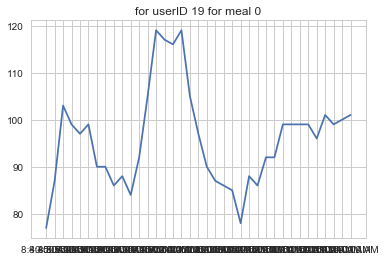

[ 77  87 103  99  97  99  90  90  86  88  84  92 105 119 117 116 119 105
  97  90  87  86  85  78  88  86  92  92  99  99  99  99  96 101  99 100
 101]
               0
8:40:00 AM    77
8:45:00 AM    87
8:50:00 AM   103
8:55:00 AM    99
9:00:00 AM    97
9:05:00 AM    99
9:10:00 AM    90
9:15:00 AM    90
9:20:00 AM    86
9:25:00 AM    88
9:30:00 AM    84
9:35:00 AM    92
9:40:00 AM   105
9:45:00 AM   119
9:50:00 AM   117
9:55:00 AM   116
10:00:00 AM  119
10:05:00 AM  105
10:10:00 AM   97
10:15:00 AM   90
10:20:00 AM   87
10:25:00 AM   86
10:30:00 AM   85
10:35:00 AM   78
10:40:00 AM   88
10:45:00 AM   86
10:50:00 AM   92
10:55:00 AM   92
11:00:00 AM   99
11:05:00 AM   99
11:10:00 AM   99
11:15:00 AM   99
11:20:00 AM   96
11:25:00 AM  101
11:30:00 AM   99
11:35:00 AM  100
11:40:00 AM  101
2133-028 PB 1


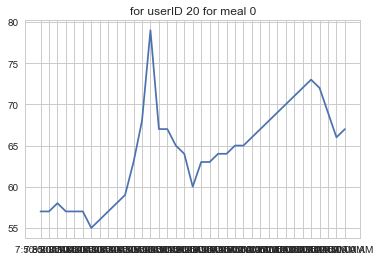

[57 57 58 57 57 57 55 56 57 58 59 63 68 79 67 67 65 64 60 63 63 64 64 65
 65 66 67 68 69 70 71 72 73 72 69 66 67]
              0
7:50:00 AM   57
7:55:00 AM   57
8:00:00 AM   58
8:05:00 AM   57
8:10:00 AM   57
8:15:00 AM   57
8:20:00 AM   55
8:25:00 AM   56
8:30:00 AM   57
8:35:00 AM   58
8:40:00 AM   59
8:45:00 AM   63
8:50:00 AM   68
8:55:00 AM   79
9:00:00 AM   67
9:05:00 AM   67
9:10:00 AM   65
9:15:00 AM   64
9:20:00 AM   60
9:25:00 AM   63
9:30:00 AM   63
9:35:00 AM   64
9:40:00 AM   64
9:45:00 AM   65
9:50:00 AM   65
9:55:00 AM   66
10:00:00 AM  67
10:05:00 AM  68
10:10:00 AM  69
10:15:00 AM  70
10:20:00 AM  71
10:25:00 AM  72
10:30:00 AM  73
10:35:00 AM  72
10:40:00 AM  69
10:45:00 AM  66
10:50:00 AM  67
2133-030 PB 1


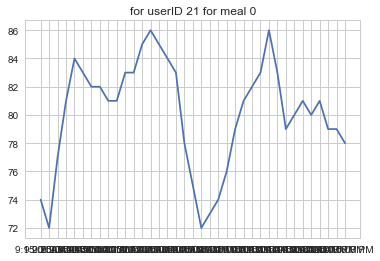

[74 72 77 81 84 83 82 82 81 81 83 83 85 86 85 84 83 78 75 72 73 74 76 79
 81 82 83 86 83 79 80 81 80 81 79 79 78]
              0
9:15:00 AM   74
9:20:00 AM   72
9:25:00 AM   77
9:30:00 AM   81
9:35:00 AM   84
9:40:00 AM   83
9:45:00 AM   82
9:50:00 AM   82
9:55:00 AM   81
10:00:00 AM  81
10:05:00 AM  83
10:10:00 AM  83
10:15:00 AM  85
10:20:00 AM  86
10:25:00 AM  85
10:30:00 AM  84
10:35:00 AM  83
10:40:00 AM  78
10:45:00 AM  75
10:50:00 AM  72
10:55:00 AM  73
11:00:00 AM  74
11:05:00 AM  76
11:10:00 AM  79
11:15:00 AM  81
11:20:00 AM  82
11:25:00 AM  83
11:30:00 AM  86
11:35:00 AM  83
11:40:00 AM  79
11:45:00 AM  80
11:50:00 AM  81
11:55:00 AM  80
12:00:00 PM  81
12:05:00 PM  79
12:10:00 PM  79
12:15:00 PM  78
2133-032 PB 1


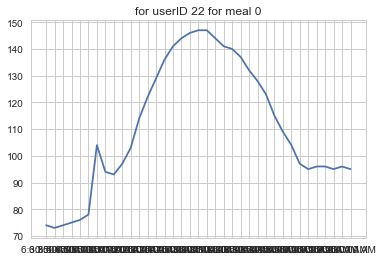

[ 74  73  74  75  76  78 104  94  93  97 103 114 122 129 136 141 144 146
 147 147 144 141 140 137 132 128 123 115 109 104  97  95  96  96  95  96
  95]
              0
6:30:00 AM   74
6:35:00 AM   73
6:40:00 AM   74
6:45:00 AM   75
6:50:00 AM   76
6:55:00 AM   78
7:00:00 AM  104
7:05:00 AM   94
7:10:00 AM   93
7:15:00 AM   97
7:20:00 AM  103
7:25:00 AM  114
7:30:00 AM  122
7:35:00 AM  129
7:40:00 AM  136
7:45:00 AM  141
7:50:00 AM  144
7:55:00 AM  146
8:00:00 AM  147
8:05:00 AM  147
8:10:00 AM  144
8:15:00 AM  141
8:20:00 AM  140
8:25:00 AM  137
8:30:00 AM  132
8:35:00 AM  128
8:40:00 AM  123
8:45:00 AM  115
8:50:00 AM  109
8:55:00 AM  104
9:00:00 AM   97
9:05:00 AM   95
9:10:00 AM   96
9:15:00 AM   96
9:20:00 AM   95
9:25:00 AM   96
9:30:00 AM   95
2133-033 PB 1


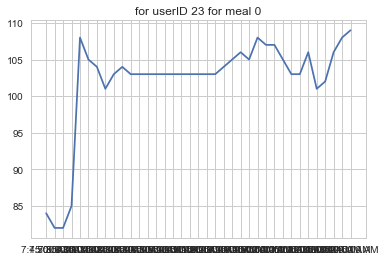

[ 84  82  82  85 108 105 104 101 103 104 103 103 103 103 103 103 103 103
 103 103 103 104 105 106 105 108 107 107 105 103 103 106 101 102 106 108
 109]
               0
7:45:00 AM    84
7:50:00 AM    82
7:55:00 AM    82
8:00:00 AM    85
8:05:00 AM   108
8:10:00 AM   105
8:15:00 AM   104
8:20:00 AM   101
8:25:00 AM   103
8:30:00 AM   104
8:35:00 AM   103
8:40:00 AM   103
8:45:00 AM   103
8:50:00 AM   103
8:55:00 AM   103
9:00:00 AM   103
9:05:00 AM   103
9:10:00 AM   103
9:15:00 AM   103
9:20:00 AM   103
9:25:00 AM   103
9:30:00 AM   104
9:35:00 AM   105
9:40:00 AM   106
9:45:00 AM   105
9:50:00 AM   108
9:55:00 AM   107
10:00:00 AM  107
10:05:00 AM  105
10:10:00 AM  103
10:15:00 AM  103
10:20:00 AM  106
10:25:00 AM  101
10:30:00 AM  102
10:35:00 AM  106
10:40:00 AM  108
10:45:00 AM  109
2133-035 PB 1


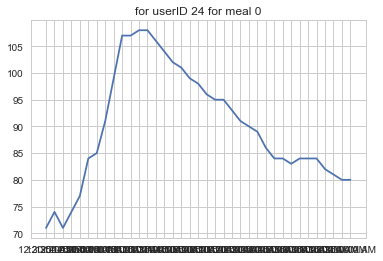

[ 71  74  71  74  77  84  85  91  99 107 107 108 108 106 104 102 101  99
  98  96  95  95  93  91  90  89  86  84  84  83  84  84  84  82  81  80
  80]
               0
12:30:00 AM   71
12:35:00 AM   74
12:40:00 AM   71
12:45:00 AM   74
12:50:00 AM   77
12:55:00 AM   84
1:00:00 AM    85
1:05:00 AM    91
1:10:00 AM    99
1:15:00 AM   107
1:20:00 AM   107
1:25:00 AM   108
1:30:00 AM   108
1:35:00 AM   106
1:40:00 AM   104
1:45:00 AM   102
1:50:00 AM   101
1:55:00 AM    99
2:00:00 AM    98
2:05:00 AM    96
2:10:00 AM    95
2:15:00 AM    95
2:20:00 AM    93
2:25:00 AM    91
2:30:00 AM    90
2:35:00 AM    89
2:40:00 AM    86
2:45:00 AM    84
2:50:00 AM    84
2:55:00 AM    83
3:00:00 AM    84
3:05:00 AM    84
3:10:00 AM    84
3:15:00 AM    82
3:20:00 AM    81
3:25:00 AM    80
3:30:00 AM    80
2133-036 PB 1


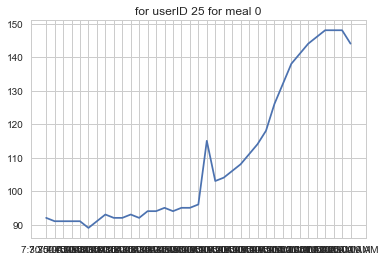

[ 92  91  91  91  91  89  91  93  92  92  93  92  94  94  95  94  95  95
  96 115 103 104 106 108 111 114 118 126 132 138 141 144 146 148 148 148
 144]
               0
7:30:00 AM    92
7:35:00 AM    91
7:40:00 AM    91
7:45:00 AM    91
7:50:00 AM    91
7:55:00 AM    89
8:00:00 AM    91
8:05:00 AM    93
8:10:00 AM    92
8:15:00 AM    92
8:20:00 AM    93
8:25:00 AM    92
8:30:00 AM    94
8:35:00 AM    94
8:40:00 AM    95
8:45:00 AM    94
8:50:00 AM    95
8:55:00 AM    95
9:00:00 AM    96
9:05:00 AM   115
9:10:00 AM   103
9:15:00 AM   104
9:20:00 AM   106
9:25:00 AM   108
9:30:00 AM   111
9:35:00 AM   114
9:40:00 AM   118
9:45:00 AM   126
9:50:00 AM   132
9:55:00 AM   138
10:00:00 AM  141
10:05:00 AM  144
10:10:00 AM  146
10:15:00 AM  148
10:20:00 AM  148
10:25:00 AM  148
10:30:00 AM  144
2133-037 PB 1


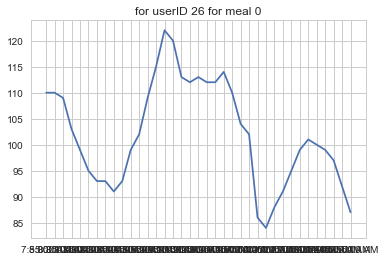

[110 110 109 103  99  95  93  93  91  93  99 102 109 115 122 120 113 112
 113 112 112 114 110 104 102  86  84  88  91  95  99 101 100  99  97  92
  87]
               0
7:55:00 AM   110
8:00:00 AM   110
8:05:00 AM   109
8:10:00 AM   103
8:15:00 AM    99
8:20:00 AM    95
8:25:00 AM    93
8:30:00 AM    93
8:35:00 AM    91
8:40:00 AM    93
8:45:00 AM    99
8:50:00 AM   102
8:55:00 AM   109
9:00:00 AM   115
9:05:00 AM   122
9:10:00 AM   120
9:15:00 AM   113
9:20:00 AM   112
9:25:00 AM   113
9:30:00 AM   112
9:35:00 AM   112
9:40:00 AM   114
9:45:00 AM   110
9:50:00 AM   104
9:55:00 AM   102
10:00:00 AM   86
10:05:00 AM   84
10:10:00 AM   88
10:15:00 AM   91
10:20:00 AM   95
10:25:00 AM   99
10:30:00 AM  101
10:35:00 AM  100
10:40:00 AM   99
10:45:00 AM   97
10:50:00 AM   92
10:55:00 AM   87
2133-039 PB 1


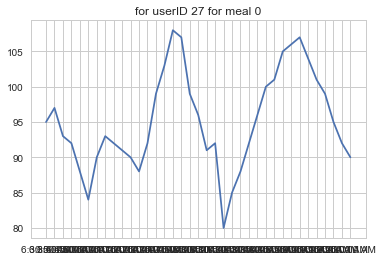

[ 95  97  93  92  88  84  90  93  92  91  90  88  92  99 103 108 107  99
  96  91  92  80  85  88  92  96 100 101 105 106 107 104 101  99  95  92
  90]
              0
6:30:00 AM   95
6:35:00 AM   97
6:40:00 AM   93
6:45:00 AM   92
6:50:00 AM   88
6:55:00 AM   84
7:00:00 AM   90
7:05:00 AM   93
7:10:00 AM   92
7:15:00 AM   91
7:20:00 AM   90
7:25:00 AM   88
7:30:00 AM   92
7:35:00 AM   99
7:40:00 AM  103
7:45:00 AM  108
7:50:00 AM  107
7:55:00 AM   99
8:00:00 AM   96
8:05:00 AM   91
8:10:00 AM   92
8:15:00 AM   80
8:20:00 AM   85
8:25:00 AM   88
8:30:00 AM   92
8:35:00 AM   96
8:40:00 AM  100
8:45:00 AM  101
8:50:00 AM  105
8:55:00 AM  106
9:00:00 AM  107
9:05:00 AM  104
9:10:00 AM  101
9:15:00 AM   99
9:20:00 AM   95
9:25:00 AM   92
9:30:00 AM   90
2133-040 PB 1


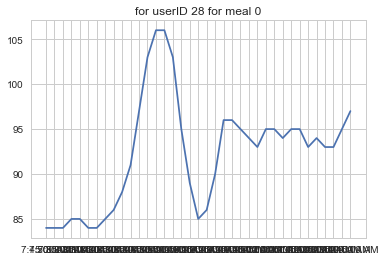

[ 84  84  84  85  85  84  84  85  86  88  91  97 103 106 106 103  95  89
  85  86  90  96  96  95  94  93  95  95  94  95  95  93  94  93  93  95
  97]
               0
7:45:00 AM    84
7:50:00 AM    84
7:55:00 AM    84
8:00:00 AM    85
8:05:00 AM    85
8:10:00 AM    84
8:15:00 AM    84
8:20:00 AM    85
8:25:00 AM    86
8:30:00 AM    88
8:35:00 AM    91
8:40:00 AM    97
8:45:00 AM   103
8:50:00 AM   106
8:55:00 AM   106
9:00:00 AM   103
9:05:00 AM    95
9:10:00 AM    89
9:15:00 AM    85
9:20:00 AM    86
9:25:00 AM    90
9:30:00 AM    96
9:35:00 AM    96
9:40:00 AM    95
9:45:00 AM    94
9:50:00 AM    93
9:55:00 AM    95
10:00:00 AM   95
10:05:00 AM   94
10:10:00 AM   95
10:15:00 AM   95
10:20:00 AM   93
10:25:00 AM   94
10:30:00 AM   93
10:35:00 AM   93
10:40:00 AM   95
10:45:00 AM   97
2133-041 PB 1


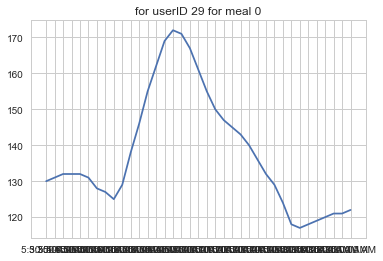

[130 131 132 132 132 131 128 127 125 129 138 146 155 162 169 172 171 167
 161 155 150 147 145 143 140 136 132 129 124 118 117 118 119 120 121 121
 122]
              0
5:30:00 AM  130
5:35:00 AM  131
5:40:00 AM  132
5:45:00 AM  132
5:50:00 AM  132
5:55:00 AM  131
6:00:00 AM  128
6:05:00 AM  127
6:10:00 AM  125
6:15:00 AM  129
6:20:00 AM  138
6:25:00 AM  146
6:30:00 AM  155
6:35:00 AM  162
6:40:00 AM  169
6:45:00 AM  172
6:50:00 AM  171
6:55:00 AM  167
7:00:00 AM  161
7:05:00 AM  155
7:10:00 AM  150
7:15:00 AM  147
7:20:00 AM  145
7:25:00 AM  143
7:30:00 AM  140
7:35:00 AM  136
7:40:00 AM  132
7:45:00 AM  129
7:50:00 AM  124
7:55:00 AM  118
8:00:00 AM  117
8:05:00 AM  118
8:10:00 AM  119
8:15:00 AM  120
8:20:00 AM  121
8:25:00 AM  121
8:30:00 AM  122
2133-001 PB 2


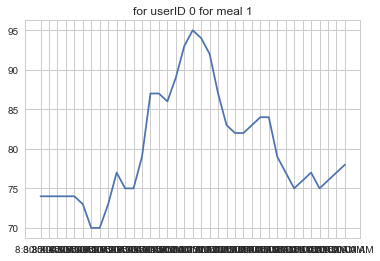

[74 74 74 74 74 73 70 70 73 77 75 75 79 87 87 86 89 93 95 94 92 87 83 82
 82 83 84 84 79 77 75 76 77 75 76 77 78]
              0
8:30:00 AM   74
8:35:00 AM   74
8:40:00 AM   74
8:45:00 AM   74
8:50:00 AM   74
8:55:00 AM   73
9:00:00 AM   70
9:05:00 AM   70
9:10:00 AM   73
9:15:00 AM   77
9:20:00 AM   75
9:25:00 AM   75
9:30:00 AM   79
9:35:00 AM   87
9:40:00 AM   87
9:45:00 AM   86
9:50:00 AM   89
9:55:00 AM   93
10:00:00 AM  95
10:05:00 AM  94
10:10:00 AM  92
10:15:00 AM  87
10:20:00 AM  83
10:25:00 AM  82
10:30:00 AM  82
10:35:00 AM  83
10:40:00 AM  84
10:45:00 AM  84
10:50:00 AM  79
10:55:00 AM  77
11:00:00 AM  75
11:05:00 AM  76
11:10:00 AM  77
11:15:00 AM  75
11:20:00 AM  76
11:25:00 AM  77
11:30:00 AM  78
2133-002 PB 2


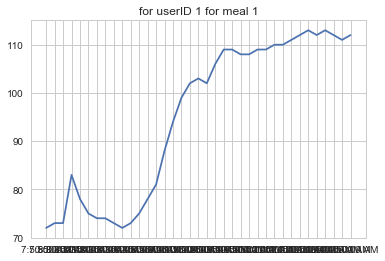

[ 72  73  73  83  78  75  74  74  73  72  73  75  78  81  88  94  99 102
 103 102 106 109 109 108 108 109 109 110 110 111 112 113 112 113 112 111
 112]
               0
7:50:00 AM    72
7:55:00 AM    73
8:00:00 AM    73
8:05:00 AM    83
8:10:00 AM    78
8:15:00 AM    75
8:20:00 AM    74
8:25:00 AM    74
8:30:00 AM    73
8:35:00 AM    72
8:40:00 AM    73
8:45:00 AM    75
8:50:00 AM    78
8:55:00 AM    81
9:00:00 AM    88
9:05:00 AM    94
9:10:00 AM    99
9:15:00 AM   102
9:20:00 AM   103
9:25:00 AM   102
9:30:00 AM   106
9:35:00 AM   109
9:40:00 AM   109
9:45:00 AM   108
9:50:00 AM   108
9:55:00 AM   109
10:00:00 AM  109
10:05:00 AM  110
10:10:00 AM  110
10:15:00 AM  111
10:20:00 AM  112
10:25:00 AM  113
10:30:00 AM  112
10:35:00 AM  113
10:40:00 AM  112
10:45:00 AM  111
10:50:00 AM  112
2133-004 PB 2


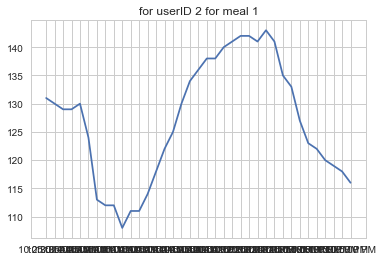

[131 130 129 129 130 124 113 112 112 108 111 111 114 118 122 125 130 134
 136 138 138 140 141 142 142 141 143 141 135 133 127 123 122 120 119 118
 116]
               0
10:25:00 AM  131
10:30:00 AM  130
10:35:00 AM  129
10:40:00 AM  129
10:45:00 AM  130
10:50:00 AM  124
10:55:00 AM  113
11:00:00 AM  112
11:05:00 AM  112
11:10:00 AM  108
11:15:00 AM  111
11:20:00 AM  111
11:25:00 AM  114
11:30:00 AM  118
11:35:00 AM  122
11:40:00 AM  125
11:45:00 AM  130
11:50:00 AM  134
11:55:00 AM  136
12:00:00 PM  138
12:05:00 PM  138
12:10:00 PM  140
12:15:00 PM  141
12:20:00 PM  142
12:25:00 PM  142
12:30:00 PM  141
12:35:00 PM  143
12:40:00 PM  141
12:45:00 PM  135
12:50:00 PM  133
12:55:00 PM  127
1:00:00 PM   123
1:05:00 PM   122
1:10:00 PM   120
1:15:00 PM   119
1:20:00 PM   118
1:25:00 PM   116
2133-006 PB 2


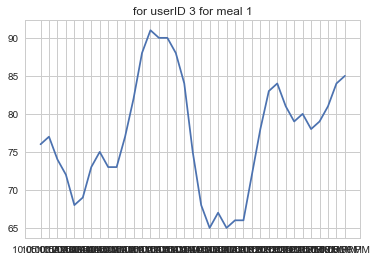

[76 77 74 72 68 69 73 75 73 73 77 82 88 91 90 90 88 84 75 68 65 67 65 66
 66 72 78 83 84 81 79 80 78 79 81 84 85]
              0
10:05:00 AM  76
10:10:00 AM  77
10:15:00 AM  74
10:20:00 AM  72
10:25:00 AM  68
10:30:00 AM  69
10:35:00 AM  73
10:40:00 AM  75
10:45:00 AM  73
10:50:00 AM  73
10:55:00 AM  77
11:00:00 AM  82
11:05:00 AM  88
11:10:00 AM  91
11:15:00 AM  90
11:20:00 AM  90
11:25:00 AM  88
11:30:00 AM  84
11:35:00 AM  75
11:40:00 AM  68
11:45:00 AM  65
11:50:00 AM  67
11:55:00 AM  65
12:00:00 PM  66
12:05:00 PM  66
12:10:00 PM  72
12:15:00 PM  78
12:20:00 PM  83
12:25:00 PM  84
12:30:00 PM  81
12:35:00 PM  79
12:40:00 PM  80
12:45:00 PM  78
12:50:00 PM  79
12:55:00 PM  81
1:00:00 PM   84
1:05:00 PM   85
2133-008 PB 2


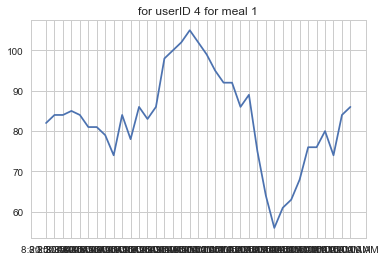

[ 82  84  84  85  84  81  81  79  74  84  78  86  83  86  98 100 102 105
 102  99  95  92  92  86  89  75  64  56  61  63  68  76  76  80  74  84
  86]
               0
8:20:00 AM    82
8:25:00 AM    84
8:30:00 AM    84
8:35:00 AM    85
8:40:00 AM    84
8:45:00 AM    81
8:50:00 AM    81
8:55:00 AM    79
9:00:00 AM    74
9:05:00 AM    84
9:10:00 AM    78
9:15:00 AM    86
9:20:00 AM    83
9:25:00 AM    86
9:30:00 AM    98
9:35:00 AM   100
9:40:00 AM   102
9:45:00 AM   105
9:50:00 AM   102
9:55:00 AM    99
10:00:00 AM   95
10:05:00 AM   92
10:10:00 AM   92
10:15:00 AM   86
10:20:00 AM   89
10:25:00 AM   75
10:30:00 AM   64
10:35:00 AM   56
10:40:00 AM   61
10:45:00 AM   63
10:50:00 AM   68
10:55:00 AM   76
11:00:00 AM   76
11:05:00 AM   80
11:10:00 AM   74
11:15:00 AM   84
11:20:00 AM   86
2133-009 PB 2


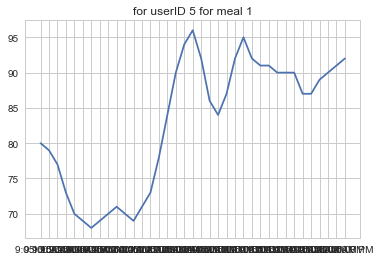

[80 79 77 73 70 69 68 69 70 71 70 69 71 73 78 84 90 94 96 92 86 84 87 92
 95 92 91 91 90 90 90 87 87 89 90 91 92]
              0
9:05:00 AM   80
9:10:00 AM   79
9:15:00 AM   77
9:20:00 AM   73
9:25:00 AM   70
9:30:00 AM   69
9:35:00 AM   68
9:40:00 AM   69
9:45:00 AM   70
9:50:00 AM   71
9:55:00 AM   70
10:00:00 AM  69
10:05:00 AM  71
10:10:00 AM  73
10:15:00 AM  78
10:20:00 AM  84
10:25:00 AM  90
10:30:00 AM  94
10:35:00 AM  96
10:40:00 AM  92
10:45:00 AM  86
10:50:00 AM  84
10:55:00 AM  87
11:00:00 AM  92
11:05:00 AM  95
11:10:00 AM  92
11:15:00 AM  91
11:20:00 AM  91
11:25:00 AM  90
11:30:00 AM  90
11:35:00 AM  90
11:40:00 AM  87
11:45:00 AM  87
11:50:00 AM  89
11:55:00 AM  90
12:00:00 PM  91
12:05:00 PM  92
2133-010 PB 2


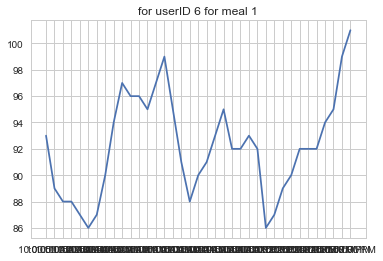

[ 93  89  88  88  87  86  87  90  94  97  96  96  95  97  99  95  91  88
  90  91  93  95  92  92  93  92  86  87  89  90  92  92  92  94  95  99
 101]
               0
10:00:00 AM   93
10:05:00 AM   89
10:10:00 AM   88
10:15:00 AM   88
10:20:00 AM   87
10:25:00 AM   86
10:30:00 AM   87
10:35:00 AM   90
10:40:00 AM   94
10:45:00 AM   97
10:50:00 AM   96
10:55:00 AM   96
11:00:00 AM   95
11:05:00 AM   97
11:10:00 AM   99
11:15:00 AM   95
11:20:00 AM   91
11:25:00 AM   88
11:30:00 AM   90
11:35:00 AM   91
11:40:00 AM   93
11:45:00 AM   95
11:50:00 AM   92
11:55:00 AM   92
12:00:00 PM   93
12:05:00 PM   92
12:10:00 PM   86
12:15:00 PM   87
12:20:00 PM   89
12:25:00 PM   90
12:30:00 PM   92
12:35:00 PM   92
12:40:00 PM   92
12:45:00 PM   94
12:50:00 PM   95
12:55:00 PM   99
1:00:00 PM   101
2133-011 PB 2


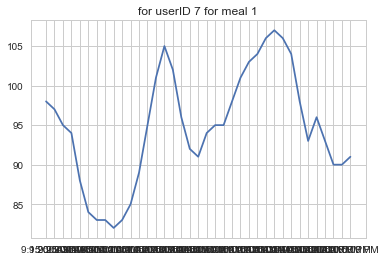

[ 98  97  95  94  88  84  83  83  82  83  85  89  95 101 105 102  96  92
  91  94  95  95  98 101 103 104 106 107 106 104  98  93  96  93  90  90
  91]
               0
9:15:00 AM    98
9:20:00 AM    97
9:25:00 AM    95
9:30:00 AM    94
9:35:00 AM    88
9:40:00 AM    84
9:45:00 AM    83
9:50:00 AM    83
9:55:00 AM    82
10:00:00 AM   83
10:05:00 AM   85
10:10:00 AM   89
10:15:00 AM   95
10:20:00 AM  101
10:25:00 AM  105
10:30:00 AM  102
10:35:00 AM   96
10:40:00 AM   92
10:45:00 AM   91
10:50:00 AM   94
10:55:00 AM   95
11:00:00 AM   95
11:05:00 AM   98
11:10:00 AM  101
11:15:00 AM  103
11:20:00 AM  104
11:25:00 AM  106
11:30:00 AM  107
11:35:00 AM  106
11:40:00 AM  104
11:45:00 AM   98
11:50:00 AM   93
11:55:00 AM   96
12:00:00 PM   93
12:05:00 PM   90
12:10:00 PM   90
12:15:00 PM   91
2133-012 PB 2


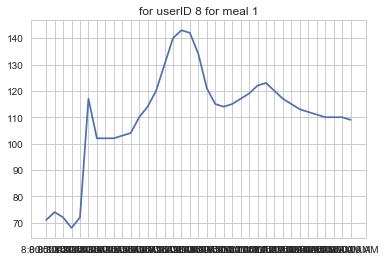

[ 71  74  72  68  72 117 102 102 102 103 104 110 114 120 130 140 143 142
 134 121 115 114 115 117 119 122 123 120 117 115 113 112 111 110 110 110
 109]
               0
8:00:00 AM    71
8:05:00 AM    74
8:10:00 AM    72
8:15:00 AM    68
8:20:00 AM    72
8:25:00 AM   117
8:30:00 AM   102
8:35:00 AM   102
8:40:00 AM   102
8:45:00 AM   103
8:50:00 AM   104
8:55:00 AM   110
9:00:00 AM   114
9:05:00 AM   120
9:10:00 AM   130
9:15:00 AM   140
9:20:00 AM   143
9:25:00 AM   142
9:30:00 AM   134
9:35:00 AM   121
9:40:00 AM   115
9:45:00 AM   114
9:50:00 AM   115
9:55:00 AM   117
10:00:00 AM  119
10:05:00 AM  122
10:10:00 AM  123
10:15:00 AM  120
10:20:00 AM  117
10:25:00 AM  115
10:30:00 AM  113
10:35:00 AM  112
10:40:00 AM  111
10:45:00 AM  110
10:50:00 AM  110
10:55:00 AM  110
11:00:00 AM  109
2133-013 PB 2


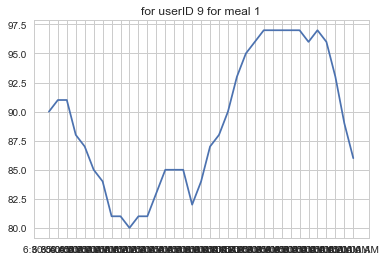

[90 91 91 88 87 85 84 81 81 80 81 81 83 85 85 85 82 84 87 88 90 93 95 96
 97 97 97 97 97 96 97 96 93 89 86]
             0
6:30:00 AM  90
6:35:00 AM  91
6:40:00 AM  91
6:45:00 AM  88
6:50:00 AM  87
6:55:00 AM  85
7:00:00 AM  84
7:05:00 AM  81
7:10:00 AM  81
7:15:00 AM  80
7:20:00 AM  81
7:25:00 AM  81
7:30:00 AM  83
7:35:00 AM  85
7:40:00 AM  85
7:45:00 AM  85
7:50:00 AM  82
7:55:00 AM  84
8:00:00 AM  87
8:05:00 AM  88
8:10:00 AM  90
8:15:00 AM  93
8:20:00 AM  95
8:25:00 AM  96
8:30:00 AM  97
8:35:00 AM  97
8:40:00 AM  97
8:45:00 AM  97
8:50:00 AM  97
8:55:00 AM  96
9:00:00 AM  97
9:05:00 AM  96
9:10:00 AM  93
9:15:00 AM  89
9:20:00 AM  86
2133-015 PB 2


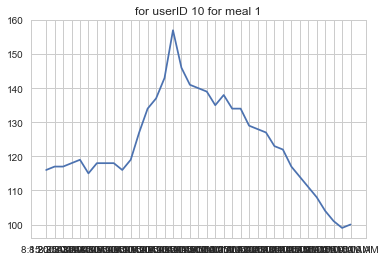

[116 117 117 118 119 115 118 118 118 116 119 127 134 137 143 157 146 141
 140 139 135 138 134 134 129 128 127 123 122 117 114 111 108 104 101  99
 100]
               0
8:15:00 AM   116
8:20:00 AM   117
8:25:00 AM   117
8:30:00 AM   118
8:35:00 AM   119
8:40:00 AM   115
8:45:00 AM   118
8:50:00 AM   118
8:55:00 AM   118
9:00:00 AM   116
9:05:00 AM   119
9:10:00 AM   127
9:15:00 AM   134
9:20:00 AM   137
9:25:00 AM   143
9:30:00 AM   157
9:35:00 AM   146
9:40:00 AM   141
9:45:00 AM   140
9:50:00 AM   139
9:55:00 AM   135
10:00:00 AM  138
10:05:00 AM  134
10:10:00 AM  134
10:15:00 AM  129
10:20:00 AM  128
10:25:00 AM  127
10:30:00 AM  123
10:35:00 AM  122
10:40:00 AM  117
10:45:00 AM  114
10:50:00 AM  111
10:55:00 AM  108
11:00:00 AM  104
11:05:00 AM  101
11:10:00 AM   99
11:15:00 AM  100
2133-017 PB 2


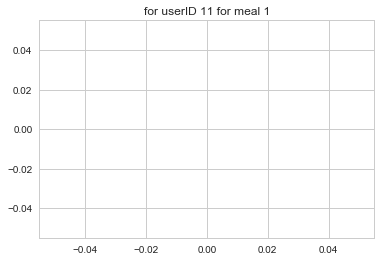

[]
Empty DataFrame
Columns: [0]
Index: []
2133-018 PB 2


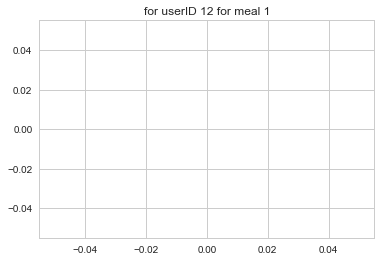

[]
Empty DataFrame
Columns: [0]
Index: []
2133-019 PB 2


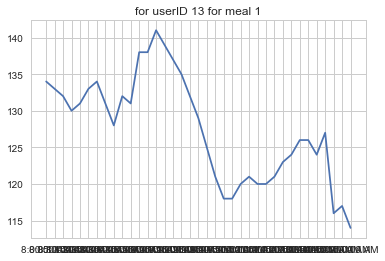

[134 133 132 130 131 133 134 131 128 132 131 138 138 141 139 137 135 132
 129 125 121 118 118 120 121 120 120 121 123 124 126 126 124 127 116 117
 114]
               0
8:00:00 AM   134
8:05:00 AM   133
8:10:00 AM   132
8:15:00 AM   130
8:20:00 AM   131
8:25:00 AM   133
8:30:00 AM   134
8:35:00 AM   131
8:40:00 AM   128
8:45:00 AM   132
8:50:00 AM   131
8:55:00 AM   138
9:00:00 AM   138
9:05:00 AM   141
9:10:00 AM   139
9:15:00 AM   137
9:20:00 AM   135
9:25:00 AM   132
9:30:00 AM   129
9:35:00 AM   125
9:40:00 AM   121
9:45:00 AM   118
9:50:00 AM   118
9:55:00 AM   120
10:00:00 AM  121
10:05:00 AM  120
10:10:00 AM  120
10:15:00 AM  121
10:20:00 AM  123
10:25:00 AM  124
10:30:00 AM  126
10:35:00 AM  126
10:40:00 AM  124
10:45:00 AM  127
10:50:00 AM  116
10:55:00 AM  117
11:00:00 AM  114
2133-020 PB 2


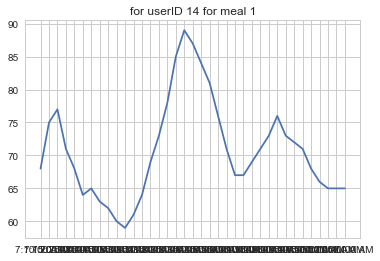

[68 75 77 71 68 64 65 63 62 60 59 61 64 69 73 78 85 89 87 84 81 76 71 67
 67 69 71 73 76 73 72 71 68 66 65 65 65]
              0
7:10:00 AM   68
7:15:00 AM   75
7:20:00 AM   77
7:25:00 AM   71
7:30:00 AM   68
7:35:00 AM   64
7:40:00 AM   65
7:45:00 AM   63
7:50:00 AM   62
7:55:00 AM   60
8:00:00 AM   59
8:05:00 AM   61
8:10:00 AM   64
8:15:00 AM   69
8:20:00 AM   73
8:25:00 AM   78
8:30:00 AM   85
8:35:00 AM   89
8:40:00 AM   87
8:45:00 AM   84
8:50:00 AM   81
8:55:00 AM   76
9:00:00 AM   71
9:05:00 AM   67
9:10:00 AM   67
9:15:00 AM   69
9:20:00 AM   71
9:25:00 AM   73
9:30:00 AM   76
9:35:00 AM   73
9:40:00 AM   72
9:45:00 AM   71
9:50:00 AM   68
9:55:00 AM   66
10:00:00 AM  65
10:05:00 AM  65
10:10:00 AM  65
2133-021 PB 2


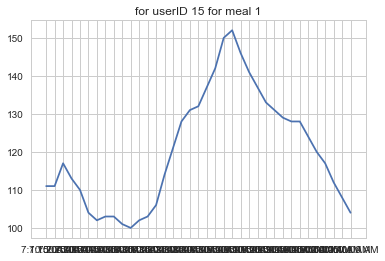

[111 111 117 113 110 104 102 103 103 101 100 102 103 106 114 121 128 131
 132 137 142 150 152 146 141 137 133 131 129 128 128 124 120 117 112 108
 104]
               0
7:10:00 AM   111
7:15:00 AM   111
7:20:00 AM   117
7:25:00 AM   113
7:30:00 AM   110
7:35:00 AM   104
7:40:00 AM   102
7:45:00 AM   103
7:50:00 AM   103
7:55:00 AM   101
8:00:00 AM   100
8:05:00 AM   102
8:10:00 AM   103
8:15:00 AM   106
8:20:00 AM   114
8:25:00 AM   121
8:30:00 AM   128
8:35:00 AM   131
8:40:00 AM   132
8:45:00 AM   137
8:50:00 AM   142
8:55:00 AM   150
9:00:00 AM   152
9:05:00 AM   146
9:10:00 AM   141
9:15:00 AM   137
9:20:00 AM   133
9:25:00 AM   131
9:30:00 AM   129
9:35:00 AM   128
9:40:00 AM   128
9:45:00 AM   124
9:50:00 AM   120
9:55:00 AM   117
10:00:00 AM  112
10:05:00 AM  108
10:10:00 AM  104
2133-022 PB 2


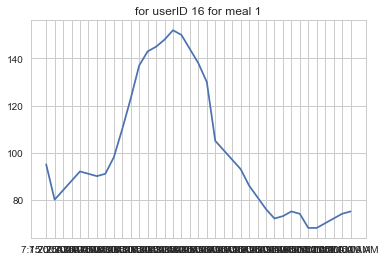

[ 95  80  84  88  92  91  90  91  98 110 123 137 143 145 148 152 150 144
 138 130 105 101  97  93  86  81  76  72  73  75  74  68  68  70  72  74
  75]
               0
7:15:00 AM    95
7:20:00 AM    80
7:25:00 AM    84
7:30:00 AM    88
7:35:00 AM    92
7:40:00 AM    91
7:45:00 AM    90
7:50:00 AM    91
7:55:00 AM    98
8:00:00 AM   110
8:05:00 AM   123
8:10:00 AM   137
8:15:00 AM   143
8:20:00 AM   145
8:25:00 AM   148
8:30:00 AM   152
8:35:00 AM   150
8:40:00 AM   144
8:45:00 AM   138
8:50:00 AM   130
8:55:00 AM   105
9:00:00 AM   101
9:05:00 AM    97
9:10:00 AM    93
9:15:00 AM    86
9:20:00 AM    81
9:25:00 AM    76
9:30:00 AM    72
9:35:00 AM    73
9:40:00 AM    75
9:45:00 AM    74
9:50:00 AM    68
9:55:00 AM    68
10:00:00 AM   70
10:05:00 AM   72
10:10:00 AM   74
10:15:00 AM   75
2133-024 PB 2


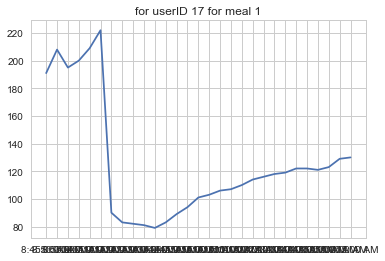

[191 208 195 200 209 222  90  83  82  81  79  83  89  94 101 103 106 107
 110 114 116 118 119 122 122 121 123 129 130]
               0
8:45:00 AM   191
8:50:00 AM   208
8:55:00 AM   195
9:00:00 AM   200
9:05:00 AM   209
9:10:00 AM   222
9:15:00 AM    90
9:20:00 AM    83
9:25:00 AM    82
9:30:00 AM    81
9:35:00 AM    79
9:40:00 AM    83
9:45:00 AM    89
9:50:00 AM    94
9:55:00 AM   101
10:00:00 AM  103
10:05:00 AM  106
10:10:00 AM  107
10:15:00 AM  110
10:20:00 AM  114
10:25:00 AM  116
10:30:00 AM  118
10:35:00 AM  119
10:40:00 AM  122
10:45:00 AM  122
10:50:00 AM  121
10:55:00 AM  123
11:00:00 AM  129
11:05:00 AM  130
2133-025 PB 2


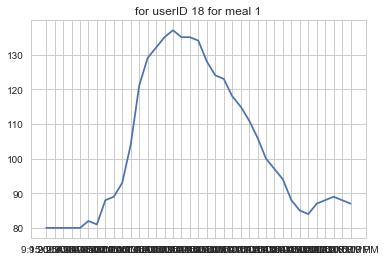

[ 80  80  80  80  80  82  81  88  89  93 104 121 129 132 135 137 135 135
 134 128 124 123 118 115 111 106 100  97  94  88  85  84  87  88  89  88
  87]
               0
9:15:00 AM    80
9:20:00 AM    80
9:25:00 AM    80
9:30:00 AM    80
9:35:00 AM    80
9:40:00 AM    82
9:45:00 AM    81
9:50:00 AM    88
9:55:00 AM    89
10:00:00 AM   93
10:05:00 AM  104
10:10:00 AM  121
10:15:00 AM  129
10:20:00 AM  132
10:25:00 AM  135
10:30:00 AM  137
10:35:00 AM  135
10:40:00 AM  135
10:45:00 AM  134
10:50:00 AM  128
10:55:00 AM  124
11:00:00 AM  123
11:05:00 AM  118
11:10:00 AM  115
11:15:00 AM  111
11:20:00 AM  106
11:25:00 AM  100
11:30:00 AM   97
11:35:00 AM   94
11:40:00 AM   88
11:45:00 AM   85
11:50:00 AM   84
11:55:00 AM   87
12:00:00 PM   88
12:05:00 PM   89
12:10:00 PM   88
12:15:00 PM   87
2133-026 PB 2


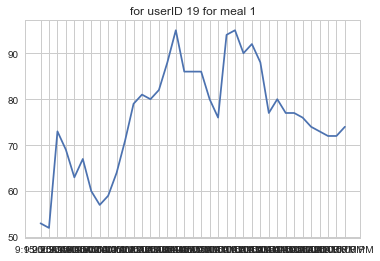

[53 52 73 69 63 67 60 57 59 64 71 79 81 80 82 88 95 86 86 86 80 76 94 95
 90 92 88 77 80 77 77 76 74 73 72 72 74]
              0
9:15:00 AM   53
9:20:00 AM   52
9:25:00 AM   73
9:30:00 AM   69
9:35:00 AM   63
9:40:00 AM   67
9:45:00 AM   60
9:50:00 AM   57
9:55:00 AM   59
10:00:00 AM  64
10:05:00 AM  71
10:10:00 AM  79
10:15:00 AM  81
10:20:00 AM  80
10:25:00 AM  82
10:30:00 AM  88
10:35:00 AM  95
10:40:00 AM  86
10:45:00 AM  86
10:50:00 AM  86
10:55:00 AM  80
11:00:00 AM  76
11:05:00 AM  94
11:10:00 AM  95
11:15:00 AM  90
11:20:00 AM  92
11:25:00 AM  88
11:30:00 AM  77
11:35:00 AM  80
11:40:00 AM  77
11:45:00 AM  77
11:50:00 AM  76
11:55:00 AM  74
12:00:00 PM  73
12:05:00 PM  72
12:10:00 PM  72
12:15:00 PM  74
2133-028 PB 2


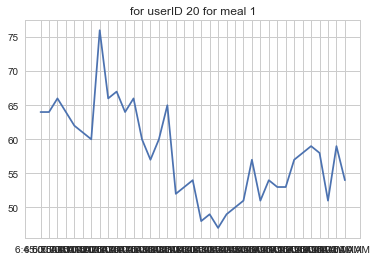

[64 64 66 64 62 61 60 76 66 67 64 66 60 57 60 65 52 53 54 48 49 47 49 50
 51 57 51 54 53 53 57 58 59 58 51 59 54]
             0
6:45:00 AM  64
6:50:00 AM  64
6:55:00 AM  66
7:00:00 AM  64
7:05:00 AM  62
7:10:00 AM  61
7:15:00 AM  60
7:20:00 AM  76
7:25:00 AM  66
7:30:00 AM  67
7:35:00 AM  64
7:40:00 AM  66
7:45:00 AM  60
7:50:00 AM  57
7:55:00 AM  60
8:00:00 AM  65
8:05:00 AM  52
8:10:00 AM  53
8:15:00 AM  54
8:20:00 AM  48
8:25:00 AM  49
8:30:00 AM  47
8:35:00 AM  49
8:40:00 AM  50
8:45:00 AM  51
8:50:00 AM  57
8:55:00 AM  51
9:00:00 AM  54
9:05:00 AM  53
9:10:00 AM  53
9:15:00 AM  57
9:20:00 AM  58
9:25:00 AM  59
9:30:00 AM  58
9:35:00 AM  51
9:40:00 AM  59
9:45:00 AM  54
2133-030 PB 2


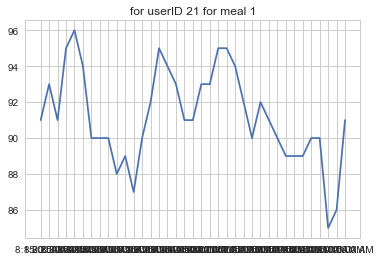

[91 93 91 95 96 94 90 90 90 88 89 87 90 92 95 94 93 91 91 93 93 95 95 94
 92 90 92 91 90 89 89 89 90 90 85 86 91]
              0
8:15:00 AM   91
8:20:00 AM   93
8:25:00 AM   91
8:30:00 AM   95
8:35:00 AM   96
8:40:00 AM   94
8:45:00 AM   90
8:50:00 AM   90
8:55:00 AM   90
9:00:00 AM   88
9:05:00 AM   89
9:10:00 AM   87
9:15:00 AM   90
9:20:00 AM   92
9:25:00 AM   95
9:30:00 AM   94
9:35:00 AM   93
9:40:00 AM   91
9:45:00 AM   91
9:50:00 AM   93
9:55:00 AM   93
10:00:00 AM  95
10:05:00 AM  95
10:10:00 AM  94
10:15:00 AM  92
10:20:00 AM  90
10:25:00 AM  92
10:30:00 AM  91
10:35:00 AM  90
10:40:00 AM  89
10:45:00 AM  89
10:50:00 AM  89
10:55:00 AM  90
11:00:00 AM  90
11:05:00 AM  85
11:10:00 AM  86
11:15:00 AM  91
2133-032 PB 2


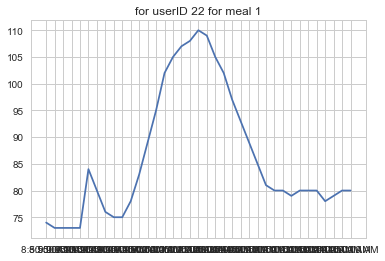

[ 74  73  73  73  73  84  80  76  75  75  78  83  89  95 102 105 107 108
 110 109 105 102  97  93  89  85  81  80  80  79  80  80  80  78  79  80
  80]
               0
8:50:00 AM    74
8:55:00 AM    73
9:00:00 AM    73
9:05:00 AM    73
9:10:00 AM    73
9:15:00 AM    84
9:20:00 AM    80
9:25:00 AM    76
9:30:00 AM    75
9:35:00 AM    75
9:40:00 AM    78
9:45:00 AM    83
9:50:00 AM    89
9:55:00 AM    95
10:00:00 AM  102
10:05:00 AM  105
10:10:00 AM  107
10:15:00 AM  108
10:20:00 AM  110
10:25:00 AM  109
10:30:00 AM  105
10:35:00 AM  102
10:40:00 AM   97
10:45:00 AM   93
10:50:00 AM   89
10:55:00 AM   85
11:00:00 AM   81
11:05:00 AM   80
11:10:00 AM   80
11:15:00 AM   79
11:20:00 AM   80
11:25:00 AM   80
11:30:00 AM   80
11:35:00 AM   78
11:40:00 AM   79
11:45:00 AM   80
11:50:00 AM   80
2133-033 PB 2


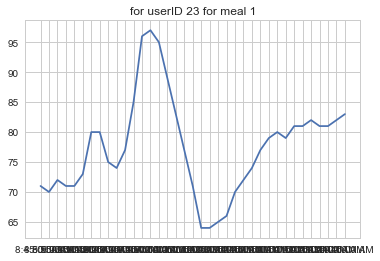

[71 70 72 71 71 73 80 80 75 74 77 85 96 97 95 89 83 77 71 64 64 65 66 70
 72 74 77 79 80 79 81 81 82 81 81 82 83]
              0
8:45:00 AM   71
8:50:00 AM   70
8:55:00 AM   72
9:00:00 AM   71
9:05:00 AM   71
9:10:00 AM   73
9:15:00 AM   80
9:20:00 AM   80
9:25:00 AM   75
9:30:00 AM   74
9:35:00 AM   77
9:40:00 AM   85
9:45:00 AM   96
9:50:00 AM   97
9:55:00 AM   95
10:00:00 AM  89
10:05:00 AM  83
10:10:00 AM  77
10:15:00 AM  71
10:20:00 AM  64
10:25:00 AM  64
10:30:00 AM  65
10:35:00 AM  66
10:40:00 AM  70
10:45:00 AM  72
10:50:00 AM  74
10:55:00 AM  77
11:00:00 AM  79
11:05:00 AM  80
11:10:00 AM  79
11:15:00 AM  81
11:20:00 AM  81
11:25:00 AM  82
11:30:00 AM  81
11:35:00 AM  81
11:40:00 AM  82
11:45:00 AM  83
2133-035 PB 2


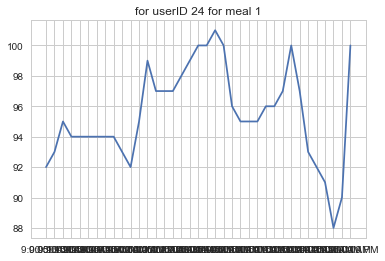

[ 92  93  95  94  94  94  94  94  94  93  92  95  99  97  97  97  98  99
 100 100 101 100  96  95  95  95  96  96  97 100  97  93  92  91  88  90
 100]
               0
9:00:00 AM    92
9:05:00 AM    93
9:10:00 AM    95
9:15:00 AM    94
9:20:00 AM    94
9:25:00 AM    94
9:30:00 AM    94
9:35:00 AM    94
9:40:00 AM    94
9:45:00 AM    93
9:50:00 AM    92
9:55:00 AM    95
10:00:00 AM   99
10:05:00 AM   97
10:10:00 AM   97
10:15:00 AM   97
10:20:00 AM   98
10:25:00 AM   99
10:30:00 AM  100
10:35:00 AM  100
10:40:00 AM  101
10:45:00 AM  100
10:50:00 AM   96
10:55:00 AM   95
11:00:00 AM   95
11:05:00 AM   95
11:10:00 AM   96
11:15:00 AM   96
11:20:00 AM   97
11:25:00 AM  100
11:30:00 AM   97
11:35:00 AM   93
11:40:00 AM   92
11:45:00 AM   91
11:50:00 AM   88
11:55:00 AM   90
12:00:00 PM  100
2133-036 PB 2


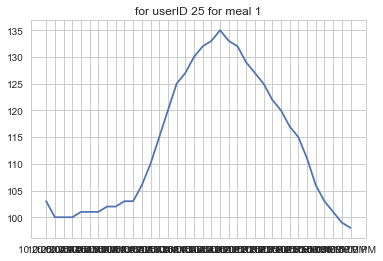

[103 100 100 100 101 101 101 102 102 103 103 106 110 115 120 125 127 130
 132 133 135 133 132 129 127 125 122 120 117 115 111 106 103 101  99  98]
               0
10:20:00 AM  103
10:25:00 AM  100
10:30:00 AM  100
10:35:00 AM  100
10:40:00 AM  101
10:45:00 AM  101
10:50:00 AM  101
10:55:00 AM  102
11:00:00 AM  102
11:05:00 AM  103
11:10:00 AM  103
11:15:00 AM  106
11:20:00 AM  110
11:25:00 AM  115
11:30:00 AM  120
11:35:00 AM  125
11:40:00 AM  127
11:45:00 AM  130
11:50:00 AM  132
11:55:00 AM  133
12:00:00 PM  135
12:05:00 PM  133
12:10:00 PM  132
12:15:00 PM  129
12:20:00 PM  127
12:25:00 PM  125
12:30:00 PM  122
12:35:00 PM  120
12:40:00 PM  117
12:45:00 PM  115
12:50:00 PM  111
12:55:00 PM  106
1:00:00 PM   103
1:05:00 PM   101
1:10:00 PM    99
1:15:00 PM    98
2133-037 PB 2


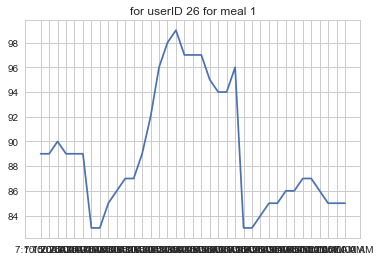

[89 89 90 89 89 89 83 83 85 86 87 87 89 92 96 98 99 97 97 97 95 94 94 96
 83 83 84 85 85 86 86 87 87 86 85 85 85]
              0
7:10:00 AM   89
7:15:00 AM   89
7:20:00 AM   90
7:25:00 AM   89
7:30:00 AM   89
7:35:00 AM   89
7:40:00 AM   83
7:45:00 AM   83
7:50:00 AM   85
7:55:00 AM   86
8:00:00 AM   87
8:05:00 AM   87
8:10:00 AM   89
8:15:00 AM   92
8:20:00 AM   96
8:25:00 AM   98
8:30:00 AM   99
8:35:00 AM   97
8:40:00 AM   97
8:45:00 AM   97
8:50:00 AM   95
8:55:00 AM   94
9:00:00 AM   94
9:05:00 AM   96
9:10:00 AM   83
9:15:00 AM   83
9:20:00 AM   84
9:25:00 AM   85
9:30:00 AM   85
9:35:00 AM   86
9:40:00 AM   86
9:45:00 AM   87
9:50:00 AM   87
9:55:00 AM   86
10:00:00 AM  85
10:05:00 AM  85
10:10:00 AM  85
2133-039 PB 2


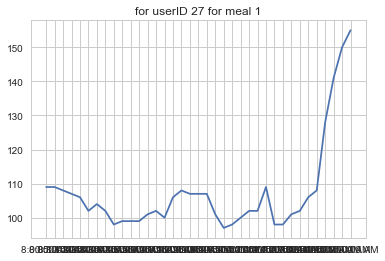

[109 109 108 107 106 102 104 102  98  99  99  99 101 102 100 106 108 107
 107 107 101  97  98 100 102 102 109  98  98 101 102 106 108 128 141 150
 155]
               0
8:00:00 AM   109
8:05:00 AM   109
8:10:00 AM   108
8:15:00 AM   107
8:20:00 AM   106
8:25:00 AM   102
8:30:00 AM   104
8:35:00 AM   102
8:40:00 AM    98
8:45:00 AM    99
8:50:00 AM    99
8:55:00 AM    99
9:00:00 AM   101
9:05:00 AM   102
9:10:00 AM   100
9:15:00 AM   106
9:20:00 AM   108
9:25:00 AM   107
9:30:00 AM   107
9:35:00 AM   107
9:40:00 AM   101
9:45:00 AM    97
9:50:00 AM    98
9:55:00 AM   100
10:00:00 AM  102
10:05:00 AM  102
10:10:00 AM  109
10:15:00 AM   98
10:20:00 AM   98
10:25:00 AM  101
10:30:00 AM  102
10:35:00 AM  106
10:40:00 AM  108
10:45:00 AM  128
10:50:00 AM  141
10:55:00 AM  150
11:00:00 AM  155
2133-040 PB 2


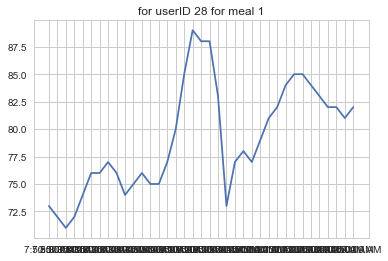

[73 72 71 72 74 76 76 77 76 74 75 76 75 75 77 80 85 89 88 88 83 73 77 78
 77 79 81 82 84 85 85 84 83 82 82 81 82]
              0
7:50:00 AM   73
7:55:00 AM   72
8:00:00 AM   71
8:05:00 AM   72
8:10:00 AM   74
8:15:00 AM   76
8:20:00 AM   76
8:25:00 AM   77
8:30:00 AM   76
8:35:00 AM   74
8:40:00 AM   75
8:45:00 AM   76
8:50:00 AM   75
8:55:00 AM   75
9:00:00 AM   77
9:05:00 AM   80
9:10:00 AM   85
9:15:00 AM   89
9:20:00 AM   88
9:25:00 AM   88
9:30:00 AM   83
9:35:00 AM   73
9:40:00 AM   77
9:45:00 AM   78
9:50:00 AM   77
9:55:00 AM   79
10:00:00 AM  81
10:05:00 AM  82
10:10:00 AM  84
10:15:00 AM  85
10:20:00 AM  85
10:25:00 AM  84
10:30:00 AM  83
10:35:00 AM  82
10:40:00 AM  82
10:45:00 AM  81
10:50:00 AM  82
2133-041 PB 2


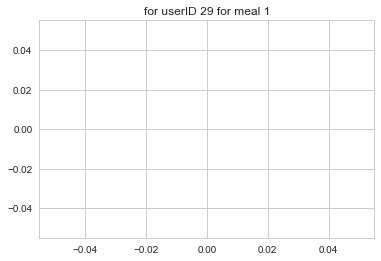

[]
Empty DataFrame
Columns: [0]
Index: []
2133-001 CF 1


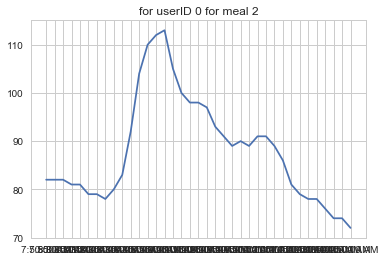

[ 82  82  82  81  81  79  79  78  80  83  92 104 110 112 113 105 100  98
  98  97  93  91  89  90  89  91  91  89  86  81  79  78  78  76  74  74
  72]
               0
7:50:00 AM    82
7:55:00 AM    82
8:00:00 AM    82
8:05:00 AM    81
8:10:00 AM    81
8:15:00 AM    79
8:20:00 AM    79
8:25:00 AM    78
8:30:00 AM    80
8:35:00 AM    83
8:40:00 AM    92
8:45:00 AM   104
8:50:00 AM   110
8:55:00 AM   112
9:00:00 AM   113
9:05:00 AM   105
9:10:00 AM   100
9:15:00 AM    98
9:20:00 AM    98
9:25:00 AM    97
9:30:00 AM    93
9:35:00 AM    91
9:40:00 AM    89
9:45:00 AM    90
9:50:00 AM    89
9:55:00 AM    91
10:00:00 AM   91
10:05:00 AM   89
10:10:00 AM   86
10:15:00 AM   81
10:20:00 AM   79
10:25:00 AM   78
10:30:00 AM   78
10:35:00 AM   76
10:40:00 AM   74
10:45:00 AM   74
10:50:00 AM   72
2133-002 CF 1


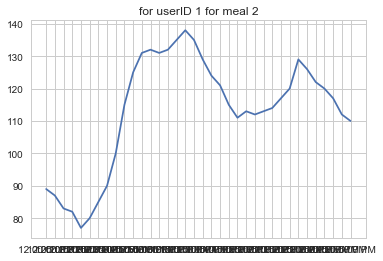

[ 89  87  83  82  77  80  85  90 100 115 125 131 132 131 132 135 138 135
 129 124 121 115 111 113 112 113 114 117 120 129 126 122 120 117 112 110]
               0
12:00:00 PM   89
12:05:00 PM   87
12:10:00 PM   83
12:15:00 PM   82
12:20:00 PM   77
12:25:00 PM   80
12:30:00 PM   85
12:35:00 PM   90
12:40:00 PM  100
12:45:00 PM  115
12:50:00 PM  125
12:55:00 PM  131
1:00:00 PM   132
1:05:00 PM   131
1:10:00 PM   132
1:15:00 PM   135
1:20:00 PM   138
1:25:00 PM   135
1:30:00 PM   129
1:35:00 PM   124
1:40:00 PM   121
1:45:00 PM   115
1:50:00 PM   111
1:55:00 PM   113
2:00:00 PM   112
2:05:00 PM   113
2:10:00 PM   114
2:15:00 PM   117
2:20:00 PM   120
2:25:00 PM   129
2:30:00 PM   126
2:35:00 PM   122
2:40:00 PM   120
2:45:00 PM   117
2:50:00 PM   112
2:55:00 PM   110
2133-004 CF 1


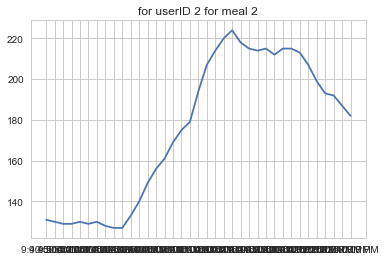

[131 130 129 129 130 129 130 128 127 127 133 140 149 156 161 169 175 179
 194 207 214 220 224 218 215 214 215 212 215 215 213 207 199 193 192 187
 182]
               0
9:40:00 AM   131
9:45:00 AM   130
9:50:00 AM   129
9:55:00 AM   129
10:00:00 AM  130
10:05:00 AM  129
10:10:00 AM  130
10:15:00 AM  128
10:20:00 AM  127
10:25:00 AM  127
10:30:00 AM  133
10:35:00 AM  140
10:40:00 AM  149
10:45:00 AM  156
10:50:00 AM  161
10:55:00 AM  169
11:00:00 AM  175
11:05:00 AM  179
11:10:00 AM  194
11:15:00 AM  207
11:20:00 AM  214
11:25:00 AM  220
11:30:00 AM  224
11:35:00 AM  218
11:40:00 AM  215
11:45:00 AM  214
11:50:00 AM  215
11:55:00 AM  212
12:00:00 PM  215
12:05:00 PM  215
12:10:00 PM  213
12:15:00 PM  207
12:20:00 PM  199
12:25:00 PM  193
12:30:00 PM  192
12:35:00 PM  187
12:40:00 PM  182
2133-006 CF 1


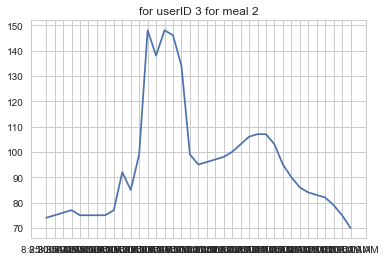

[ 74  75  76  77  75  75  75  75  77  92  85  99 148 138 148 146 134  99
  95  96  97  98 100 103 106 107 107 103  95  90  86  84  83  82  79  75
  70]
               0
8:25:00 AM    74
8:30:00 AM    75
8:35:00 AM    76
8:40:00 AM    77
8:45:00 AM    75
8:50:00 AM    75
8:55:00 AM    75
9:00:00 AM    75
9:05:00 AM    77
9:10:00 AM    92
9:15:00 AM    85
9:20:00 AM    99
9:25:00 AM   148
9:30:00 AM   138
9:35:00 AM   148
9:40:00 AM   146
9:45:00 AM   134
9:50:00 AM    99
9:55:00 AM    95
10:00:00 AM   96
10:05:00 AM   97
10:10:00 AM   98
10:15:00 AM  100
10:20:00 AM  103
10:25:00 AM  106
10:30:00 AM  107
10:35:00 AM  107
10:40:00 AM  103
10:45:00 AM   95
10:50:00 AM   90
10:55:00 AM   86
11:00:00 AM   84
11:05:00 AM   83
11:10:00 AM   82
11:15:00 AM   79
11:20:00 AM   75
11:25:00 AM   70
2133-008 CF 1


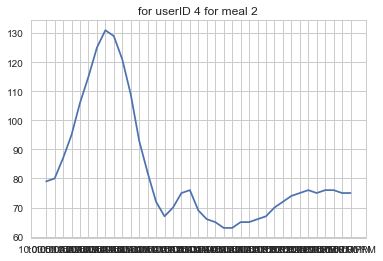

[ 79  80  87  95 106 115 125 131 129 121 109  93  82  72  67  70  75  76
  69  66  65  63  63  65  65  66  67  70  72  74  75  76  75  76  76  75
  75]
               0
10:00:00 AM   79
10:05:00 AM   80
10:10:00 AM   87
10:15:00 AM   95
10:20:00 AM  106
10:25:00 AM  115
10:30:00 AM  125
10:35:00 AM  131
10:40:00 AM  129
10:45:00 AM  121
10:50:00 AM  109
10:55:00 AM   93
11:00:00 AM   82
11:05:00 AM   72
11:10:00 AM   67
11:15:00 AM   70
11:20:00 AM   75
11:25:00 AM   76
11:30:00 AM   69
11:35:00 AM   66
11:40:00 AM   65
11:45:00 AM   63
11:50:00 AM   63
11:55:00 AM   65
12:00:00 PM   65
12:05:00 PM   66
12:10:00 PM   67
12:15:00 PM   70
12:20:00 PM   72
12:25:00 PM   74
12:30:00 PM   75
12:35:00 PM   76
12:40:00 PM   75
12:45:00 PM   76
12:50:00 PM   76
12:55:00 PM   75
1:00:00 PM    75
2133-009 CF 1


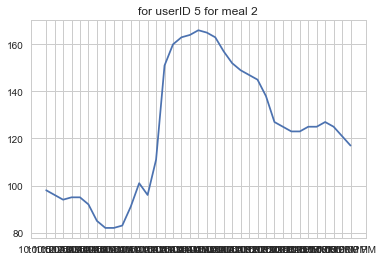

[ 98  96  94  95  95  92  85  82  82  83  91 101  96 111 151 160 163 164
 166 165 163 157 152 149 147 145 138 127 125 123 123 125 125 127 125 121
 117]
               0
10:10:00 AM   98
10:15:00 AM   96
10:20:00 AM   94
10:25:00 AM   95
10:30:00 AM   95
10:35:00 AM   92
10:40:00 AM   85
10:45:00 AM   82
10:50:00 AM   82
10:55:00 AM   83
11:00:00 AM   91
11:05:00 AM  101
11:10:00 AM   96
11:15:00 AM  111
11:20:00 AM  151
11:25:00 AM  160
11:30:00 AM  163
11:35:00 AM  164
11:40:00 AM  166
11:45:00 AM  165
11:50:00 AM  163
11:55:00 AM  157
12:00:00 PM  152
12:05:00 PM  149
12:10:00 PM  147
12:15:00 PM  145
12:20:00 PM  138
12:25:00 PM  127
12:30:00 PM  125
12:35:00 PM  123
12:40:00 PM  123
12:45:00 PM  125
12:50:00 PM  125
12:55:00 PM  127
1:00:00 PM   125
1:05:00 PM   121
1:10:00 PM   117
2133-010 CF 1


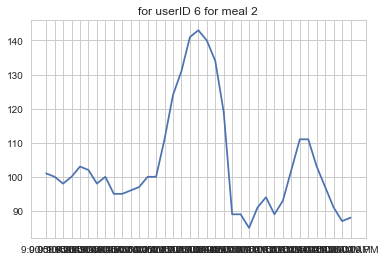

[101 100  98 100 103 102  98 100  95  95  96  97 100 100 111 124 131 141
 143 140 134 119  89  89  85  91  94  89  93 102 111 111 103  97  91  87
  88]
               0
9:00:00 AM   101
9:05:00 AM   100
9:10:00 AM    98
9:15:00 AM   100
9:20:00 AM   103
9:25:00 AM   102
9:30:00 AM    98
9:35:00 AM   100
9:40:00 AM    95
9:45:00 AM    95
9:50:00 AM    96
9:55:00 AM    97
10:00:00 AM  100
10:05:00 AM  100
10:10:00 AM  111
10:15:00 AM  124
10:20:00 AM  131
10:25:00 AM  141
10:30:00 AM  143
10:35:00 AM  140
10:40:00 AM  134
10:45:00 AM  119
10:50:00 AM   89
10:55:00 AM   89
11:00:00 AM   85
11:05:00 AM   91
11:10:00 AM   94
11:15:00 AM   89
11:20:00 AM   93
11:25:00 AM  102
11:30:00 AM  111
11:35:00 AM  111
11:40:00 AM  103
11:45:00 AM   97
11:50:00 AM   91
11:55:00 AM   87
12:00:00 PM   88
2133-011 CF 1


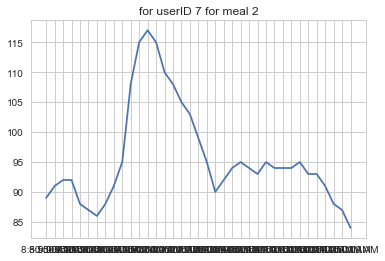

[ 89  91  92  92  88  87  86  88  91  95 108 115 117 115 110 108 105 103
  99  95  90  92  94  95  94  93  95  94  94  94  95  93  93  91  88  87
  84]
               0
8:50:00 AM    89
8:55:00 AM    91
9:00:00 AM    92
9:05:00 AM    92
9:10:00 AM    88
9:15:00 AM    87
9:20:00 AM    86
9:25:00 AM    88
9:30:00 AM    91
9:35:00 AM    95
9:40:00 AM   108
9:45:00 AM   115
9:50:00 AM   117
9:55:00 AM   115
10:00:00 AM  110
10:05:00 AM  108
10:10:00 AM  105
10:15:00 AM  103
10:20:00 AM   99
10:25:00 AM   95
10:30:00 AM   90
10:35:00 AM   92
10:40:00 AM   94
10:45:00 AM   95
10:50:00 AM   94
10:55:00 AM   93
11:00:00 AM   95
11:05:00 AM   94
11:10:00 AM   94
11:15:00 AM   94
11:20:00 AM   95
11:25:00 AM   93
11:30:00 AM   93
11:35:00 AM   91
11:40:00 AM   88
11:45:00 AM   87
11:50:00 AM   84
2133-012 CF 1


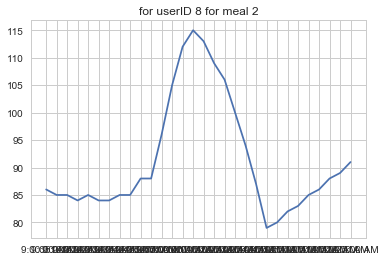

[ 86  85  85  84  85  84  84  85  85  88  88  96 105 112 115 113 109 106
 100  94  87  79  80  82  83  85  86  88  89  91]
               0
9:00:00 AM    86
9:05:00 AM    85
9:10:00 AM    85
9:15:00 AM    84
9:20:00 AM    85
9:25:00 AM    84
9:30:00 AM    84
9:35:00 AM    85
9:40:00 AM    85
9:45:00 AM    88
9:50:00 AM    88
9:55:00 AM    96
10:00:00 AM  105
10:05:00 AM  112
10:10:00 AM  115
10:15:00 AM  113
10:20:00 AM  109
10:25:00 AM  106
10:30:00 AM  100
10:35:00 AM   94
10:40:00 AM   87
10:45:00 AM   79
10:50:00 AM   80
10:55:00 AM   82
11:00:00 AM   83
11:05:00 AM   85
11:10:00 AM   86
11:15:00 AM   88
11:20:00 AM   89
11:25:00 AM   91
2133-013 CF 1


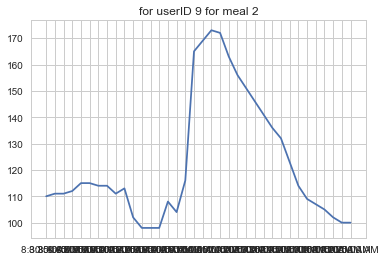

[110 111 111 112 115 115 114 114 111 113 102  98  98  98 108 104 116 165
 169 173 172 163 156 151 146 141 136 132 123 114 109 107 105 102 100 100]
               0
8:30:00 AM   110
8:35:00 AM   111
8:40:00 AM   111
8:45:00 AM   112
8:50:00 AM   115
8:55:00 AM   115
9:00:00 AM   114
9:05:00 AM   114
9:10:00 AM   111
9:15:00 AM   113
9:20:00 AM   102
9:25:00 AM    98
9:30:00 AM    98
9:35:00 AM    98
9:40:00 AM   108
9:45:00 AM   104
9:50:00 AM   116
9:55:00 AM   165
10:00:00 AM  169
10:05:00 AM  173
10:10:00 AM  172
10:15:00 AM  163
10:20:00 AM  156
10:25:00 AM  151
10:30:00 AM  146
10:35:00 AM  141
10:40:00 AM  136
10:45:00 AM  132
10:50:00 AM  123
10:55:00 AM  114
11:00:00 AM  109
11:05:00 AM  107
11:10:00 AM  105
11:15:00 AM  102
11:20:00 AM  100
11:25:00 AM  100
2133-015 CF 1


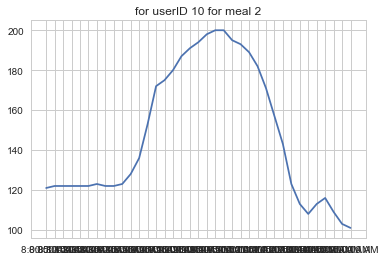

[121 122 122 122 122 122 123 122 122 123 128 136 153 172 175 180 187 191
 194 198 200 200 195 193 189 182 171 157 143 123 113 108 113 116 109 103
 101]
               0
8:00:00 AM   121
8:05:00 AM   122
8:10:00 AM   122
8:15:00 AM   122
8:20:00 AM   122
8:25:00 AM   122
8:30:00 AM   123
8:35:00 AM   122
8:40:00 AM   122
8:45:00 AM   123
8:50:00 AM   128
8:55:00 AM   136
9:00:00 AM   153
9:05:00 AM   172
9:10:00 AM   175
9:15:00 AM   180
9:20:00 AM   187
9:25:00 AM   191
9:30:00 AM   194
9:35:00 AM   198
9:40:00 AM   200
9:45:00 AM   200
9:50:00 AM   195
9:55:00 AM   193
10:00:00 AM  189
10:05:00 AM  182
10:10:00 AM  171
10:15:00 AM  157
10:20:00 AM  143
10:25:00 AM  123
10:30:00 AM  113
10:35:00 AM  108
10:40:00 AM  113
10:45:00 AM  116
10:50:00 AM  109
10:55:00 AM  103
11:00:00 AM  101
2133-017 CF 1


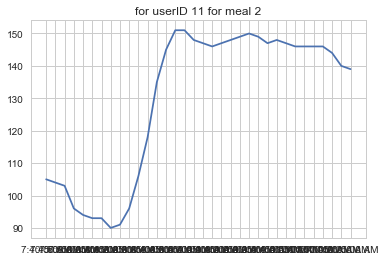

[105 104 103  96  94  93  93  90  91  96 106 118 135 145 151 151 148 147
 146 147 148 149 150 149 147 148 147 146 146 146 146 144 140 139]
               0
7:40:00 AM   105
7:45:00 AM   104
7:50:00 AM   103
7:55:00 AM    96
8:00:00 AM    94
8:05:00 AM    93
8:10:00 AM    93
8:15:00 AM    90
8:20:00 AM    91
8:25:00 AM    96
8:30:00 AM   106
8:35:00 AM   118
8:40:00 AM   135
8:45:00 AM   145
8:50:00 AM   151
8:55:00 AM   151
9:00:00 AM   148
9:05:00 AM   147
9:10:00 AM   146
9:15:00 AM   147
9:20:00 AM   148
9:25:00 AM   149
9:30:00 AM   150
9:35:00 AM   149
9:40:00 AM   147
9:45:00 AM   148
9:50:00 AM   147
9:55:00 AM   146
10:00:00 AM  146
10:05:00 AM  146
10:10:00 AM  146
10:15:00 AM  144
10:20:00 AM  140
10:25:00 AM  139
2133-018 CF 1


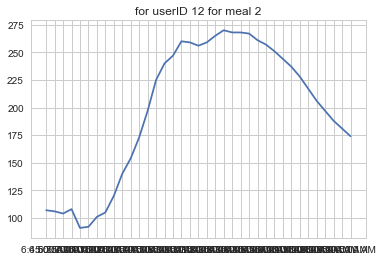

[107 106 104 108  91  92 101 105 120 140 154 173 197 225 240 247 260 259
 256 259 265 270 268 268 267 261 257 251 244 237 228 217 206 197 188 181
 174]
              0
6:45:00 AM  107
6:50:00 AM  106
6:55:00 AM  104
7:00:00 AM  108
7:05:00 AM   91
7:10:00 AM   92
7:15:00 AM  101
7:20:00 AM  105
7:25:00 AM  120
7:30:00 AM  140
7:35:00 AM  154
7:40:00 AM  173
7:45:00 AM  197
7:50:00 AM  225
7:55:00 AM  240
8:00:00 AM  247
8:05:00 AM  260
8:10:00 AM  259
8:15:00 AM  256
8:20:00 AM  259
8:25:00 AM  265
8:30:00 AM  270
8:35:00 AM  268
8:40:00 AM  268
8:45:00 AM  267
8:50:00 AM  261
8:55:00 AM  257
9:00:00 AM  251
9:05:00 AM  244
9:10:00 AM  237
9:15:00 AM  228
9:20:00 AM  217
9:25:00 AM  206
9:30:00 AM  197
9:35:00 AM  188
9:40:00 AM  181
9:45:00 AM  174
2133-019 CF 1


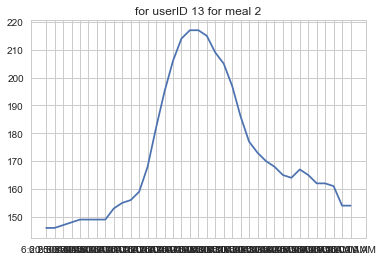

[146 146 147 148 149 149 149 149 153 155 156 159 168 182 195 206 214 217
 217 215 209 205 197 186 177 173 170 168 165 164 167 165 162 162 161 154
 154]
              0
6:20:00 AM  146
6:25:00 AM  146
6:30:00 AM  147
6:35:00 AM  148
6:40:00 AM  149
6:45:00 AM  149
6:50:00 AM  149
6:55:00 AM  149
7:00:00 AM  153
7:05:00 AM  155
7:10:00 AM  156
7:15:00 AM  159
7:20:00 AM  168
7:25:00 AM  182
7:30:00 AM  195
7:35:00 AM  206
7:40:00 AM  214
7:45:00 AM  217
7:50:00 AM  217
7:55:00 AM  215
8:00:00 AM  209
8:05:00 AM  205
8:10:00 AM  197
8:15:00 AM  186
8:20:00 AM  177
8:25:00 AM  173
8:30:00 AM  170
8:35:00 AM  168
8:40:00 AM  165
8:45:00 AM  164
8:50:00 AM  167
8:55:00 AM  165
9:00:00 AM  162
9:05:00 AM  162
9:10:00 AM  161
9:15:00 AM  154
9:20:00 AM  154
2133-020 CF 1


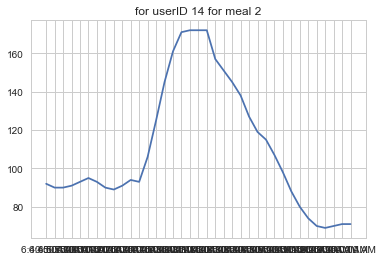

[ 92  90  90  91  93  95  93  90  89  91  94  93 106 125 145 161 171 172
 172 172 157 151 145 138 127 119 115 107  98  88  80  74  70  69  70  71
  71]
              0
6:40:00 AM   92
6:45:00 AM   90
6:50:00 AM   90
6:55:00 AM   91
7:00:00 AM   93
7:05:00 AM   95
7:10:00 AM   93
7:15:00 AM   90
7:20:00 AM   89
7:25:00 AM   91
7:30:00 AM   94
7:35:00 AM   93
7:40:00 AM  106
7:45:00 AM  125
7:50:00 AM  145
7:55:00 AM  161
8:00:00 AM  171
8:05:00 AM  172
8:10:00 AM  172
8:15:00 AM  172
8:20:00 AM  157
8:25:00 AM  151
8:30:00 AM  145
8:35:00 AM  138
8:40:00 AM  127
8:45:00 AM  119
8:50:00 AM  115
8:55:00 AM  107
9:00:00 AM   98
9:05:00 AM   88
9:10:00 AM   80
9:15:00 AM   74
9:20:00 AM   70
9:25:00 AM   69
9:30:00 AM   70
9:35:00 AM   71
9:40:00 AM   71
2133-021 CF 1


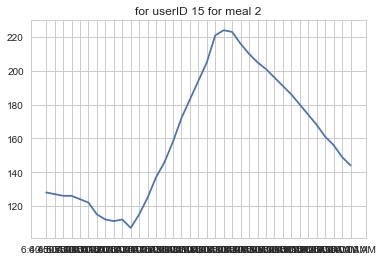

[128 127 126 126 124 122 115 112 111 112 107 115 125 137 146 158 172 183
 194 205 221 224 223 216 210 205 201 196 191 186 180 174 168 161 156 149
 144]
              0
6:40:00 AM  128
6:45:00 AM  127
6:50:00 AM  126
6:55:00 AM  126
7:00:00 AM  124
7:05:00 AM  122
7:10:00 AM  115
7:15:00 AM  112
7:20:00 AM  111
7:25:00 AM  112
7:30:00 AM  107
7:35:00 AM  115
7:40:00 AM  125
7:45:00 AM  137
7:50:00 AM  146
7:55:00 AM  158
8:00:00 AM  172
8:05:00 AM  183
8:10:00 AM  194
8:15:00 AM  205
8:20:00 AM  221
8:25:00 AM  224
8:30:00 AM  223
8:35:00 AM  216
8:40:00 AM  210
8:45:00 AM  205
8:50:00 AM  201
8:55:00 AM  196
9:00:00 AM  191
9:05:00 AM  186
9:10:00 AM  180
9:15:00 AM  174
9:20:00 AM  168
9:25:00 AM  161
9:30:00 AM  156
9:35:00 AM  149
9:40:00 AM  144
2133-022 CF 1


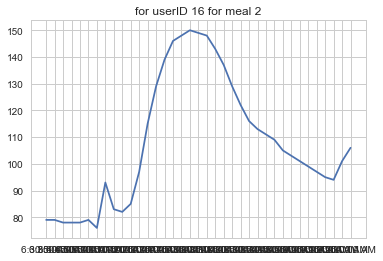

[ 79  79  78  78  78  79  76  93  83  82  85  97 115 129 139 146 148 150
 149 148 143 137 129 122 116 113 111 109 105 103 101  99  97  95  94 101
 106]
              0
6:30:00 AM   79
6:35:00 AM   79
6:40:00 AM   78
6:45:00 AM   78
6:50:00 AM   78
6:55:00 AM   79
7:00:00 AM   76
7:05:00 AM   93
7:10:00 AM   83
7:15:00 AM   82
7:20:00 AM   85
7:25:00 AM   97
7:30:00 AM  115
7:35:00 AM  129
7:40:00 AM  139
7:45:00 AM  146
7:50:00 AM  148
7:55:00 AM  150
8:00:00 AM  149
8:05:00 AM  148
8:10:00 AM  143
8:15:00 AM  137
8:20:00 AM  129
8:25:00 AM  122
8:30:00 AM  116
8:35:00 AM  113
8:40:00 AM  111
8:45:00 AM  109
8:50:00 AM  105
8:55:00 AM  103
9:00:00 AM  101
9:05:00 AM   99
9:10:00 AM   97
9:15:00 AM   95
9:20:00 AM   94
9:25:00 AM  101
9:30:00 AM  106
2133-024 CF 1


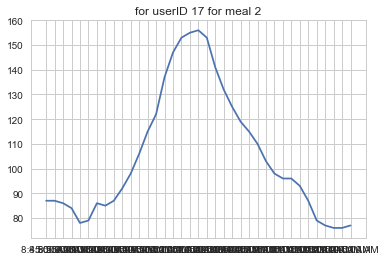

[ 87  87  86  84  78  79  86  85  87  92  98 106 115 122 137 147 153 155
 156 153 141 132 125 119 115 110 103  98  96  96  93  87  79  77  76  76
  77]
               0
8:45:00 AM    87
8:50:00 AM    87
8:55:00 AM    86
9:00:00 AM    84
9:05:00 AM    78
9:10:00 AM    79
9:15:00 AM    86
9:20:00 AM    85
9:25:00 AM    87
9:30:00 AM    92
9:35:00 AM    98
9:40:00 AM   106
9:45:00 AM   115
9:50:00 AM   122
9:55:00 AM   137
10:00:00 AM  147
10:05:00 AM  153
10:10:00 AM  155
10:15:00 AM  156
10:20:00 AM  153
10:25:00 AM  141
10:30:00 AM  132
10:35:00 AM  125
10:40:00 AM  119
10:45:00 AM  115
10:50:00 AM  110
10:55:00 AM  103
11:00:00 AM   98
11:05:00 AM   96
11:10:00 AM   96
11:15:00 AM   93
11:20:00 AM   87
11:25:00 AM   79
11:30:00 AM   77
11:35:00 AM   76
11:40:00 AM   76
11:45:00 AM   77
2133-025 CF 1


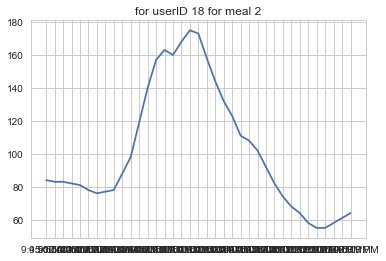

[ 84  83  83  82  81  78  76  77  78  88  98 119 140 157 163 160 168 175
 173 158 144 132 123 111 108 102  92  82  74  68  64  58  55  55  58  61
  64]
               0
9:45:00 AM    84
9:50:00 AM    83
9:55:00 AM    83
10:00:00 AM   82
10:05:00 AM   81
10:10:00 AM   78
10:15:00 AM   76
10:20:00 AM   77
10:25:00 AM   78
10:30:00 AM   88
10:35:00 AM   98
10:40:00 AM  119
10:45:00 AM  140
10:50:00 AM  157
10:55:00 AM  163
11:00:00 AM  160
11:05:00 AM  168
11:10:00 AM  175
11:15:00 AM  173
11:20:00 AM  158
11:25:00 AM  144
11:30:00 AM  132
11:35:00 AM  123
11:40:00 AM  111
11:45:00 AM  108
11:50:00 AM  102
11:55:00 AM   92
12:00:00 PM   82
12:05:00 PM   74
12:10:00 PM   68
12:15:00 PM   64
12:20:00 PM   58
12:25:00 PM   55
12:30:00 PM   55
12:35:00 PM   58
12:40:00 PM   61
12:45:00 PM   64
2133-026 CF 1


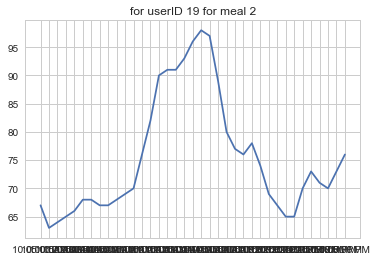

[67 63 64 65 66 68 68 67 67 68 69 70 76 82 90 91 91 93 96 98 97 89 80 77
 76 78 74 69 67 65 65 70 73 71 70 73 76]
              0
10:05:00 AM  67
10:10:00 AM  63
10:15:00 AM  64
10:20:00 AM  65
10:25:00 AM  66
10:30:00 AM  68
10:35:00 AM  68
10:40:00 AM  67
10:45:00 AM  67
10:50:00 AM  68
10:55:00 AM  69
11:00:00 AM  70
11:05:00 AM  76
11:10:00 AM  82
11:15:00 AM  90
11:20:00 AM  91
11:25:00 AM  91
11:30:00 AM  93
11:35:00 AM  96
11:40:00 AM  98
11:45:00 AM  97
11:50:00 AM  89
11:55:00 AM  80
12:00:00 PM  77
12:05:00 PM  76
12:10:00 PM  78
12:15:00 PM  74
12:20:00 PM  69
12:25:00 PM  67
12:30:00 PM  65
12:35:00 PM  65
12:40:00 PM  70
12:45:00 PM  73
12:50:00 PM  71
12:55:00 PM  70
1:00:00 PM   73
1:05:00 PM   76
2133-028 CF 1


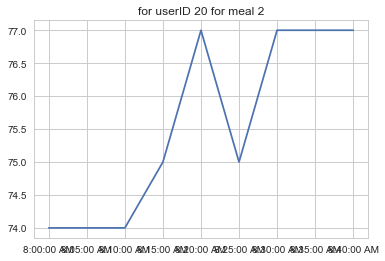

[74 74 74 75 77 75 77 77 77]
             0
8:00:00 AM  74
8:05:00 AM  74
8:10:00 AM  74
8:15:00 AM  75
8:20:00 AM  77
8:25:00 AM  75
8:30:00 AM  77
8:35:00 AM  77
8:40:00 AM  77
2133-030 CF 1


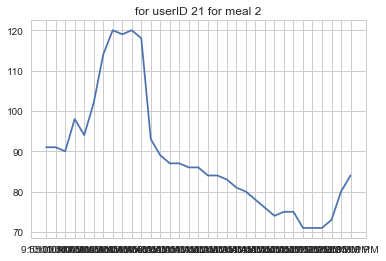

[ 91  91  90  98  94 102 114 120 119 120 118  93  89  87  87  86  86  84
  84  83  81  80  78  76  74  75  75  71  71  71  73  80  84]
               0
9:55:00 AM    91
10:00:00 AM   91
10:05:00 AM   90
10:10:00 AM   98
10:15:00 AM   94
10:20:00 AM  102
10:25:00 AM  114
10:30:00 AM  120
10:35:00 AM  119
10:40:00 AM  120
10:45:00 AM  118
10:50:00 AM   93
10:55:00 AM   89
11:00:00 AM   87
11:05:00 AM   87
11:10:00 AM   86
11:15:00 AM   86
11:20:00 AM   84
11:25:00 AM   84
11:30:00 AM   83
11:35:00 AM   81
11:40:00 AM   80
11:45:00 AM   78
11:50:00 AM   76
11:55:00 AM   74
12:00:00 PM   75
12:05:00 PM   75
12:10:00 PM   71
12:15:00 PM   71
12:20:00 PM   71
12:25:00 PM   73
12:30:00 PM   80
12:35:00 PM   84
2133-032 CF 1


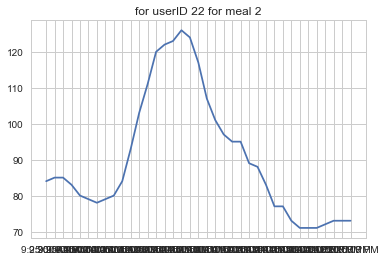

[ 84  85  85  83  80  79  78  79  80  84  93 103 111 120 122 123 126 124
 117 107 101  97  95  95  89  88  83  77  77  73  71  71  71  72  73  73
  73]
               0
9:25:00 AM    84
9:30:00 AM    85
9:35:00 AM    85
9:40:00 AM    83
9:45:00 AM    80
9:50:00 AM    79
9:55:00 AM    78
10:00:00 AM   79
10:05:00 AM   80
10:10:00 AM   84
10:15:00 AM   93
10:20:00 AM  103
10:25:00 AM  111
10:30:00 AM  120
10:35:00 AM  122
10:40:00 AM  123
10:45:00 AM  126
10:50:00 AM  124
10:55:00 AM  117
11:00:00 AM  107
11:05:00 AM  101
11:10:00 AM   97
11:15:00 AM   95
11:20:00 AM   95
11:25:00 AM   89
11:30:00 AM   88
11:35:00 AM   83
11:40:00 AM   77
11:45:00 AM   77
11:50:00 AM   73
11:55:00 AM   71
12:00:00 PM   71
12:05:00 PM   71
12:10:00 PM   72
12:15:00 PM   73
12:20:00 PM   73
12:25:00 PM   73
2133-033 CF 1


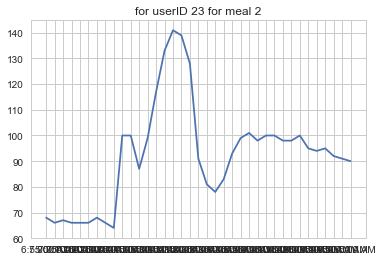

[ 68  66  67  66  66  66  68  66  64 100 100  87  99 117 133 141 139 128
  91  81  78  83  93  99 101  98 100 100  98  98 100  95  94  95  92  91
  90]
              0
6:55:00 AM   68
7:00:00 AM   66
7:05:00 AM   67
7:10:00 AM   66
7:15:00 AM   66
7:20:00 AM   66
7:25:00 AM   68
7:30:00 AM   66
7:35:00 AM   64
7:40:00 AM  100
7:45:00 AM  100
7:50:00 AM   87
7:55:00 AM   99
8:00:00 AM  117
8:05:00 AM  133
8:10:00 AM  141
8:15:00 AM  139
8:20:00 AM  128
8:25:00 AM   91
8:30:00 AM   81
8:35:00 AM   78
8:40:00 AM   83
8:45:00 AM   93
8:50:00 AM   99
8:55:00 AM  101
9:00:00 AM   98
9:05:00 AM  100
9:10:00 AM  100
9:15:00 AM   98
9:20:00 AM   98
9:25:00 AM  100
9:30:00 AM   95
9:35:00 AM   94
9:40:00 AM   95
9:45:00 AM   92
9:50:00 AM   91
9:55:00 AM   90
2133-035 CF 1


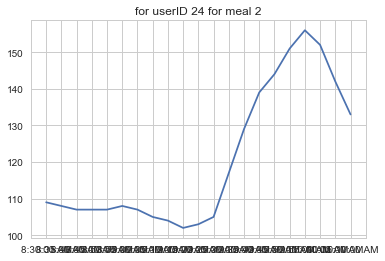

[109 108 107 107 107 108 107 105 104 102 103 105 117 129 139 144 151 156
 152 142 133]
               0
8:30:00 AM   109
8:35:00 AM   108
8:40:00 AM   107
8:45:00 AM   107
8:50:00 AM   107
8:55:00 AM   108
9:00:00 AM   107
9:05:00 AM   105
9:10:00 AM   104
9:15:00 AM   102
9:20:00 AM   103
9:25:00 AM   105
9:30:00 AM   117
9:35:00 AM   129
9:40:00 AM   139
9:45:00 AM   144
9:50:00 AM   151
9:55:00 AM   156
10:00:00 AM  152
10:05:00 AM  142
10:10:00 AM  133
2133-036 CF 1


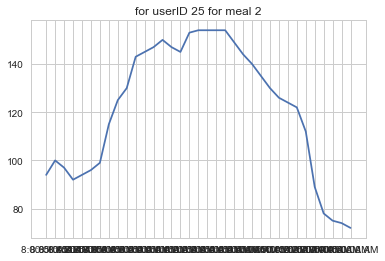

[ 94 100  97  92  94  96  99 115 125 130 143 145 147 150 147 145 153 154
 154 154 154 149 144 140 135 130 126 124 122 112  89  78  75  74  72]
               0
8:00:00 AM    94
8:05:00 AM   100
8:10:00 AM    97
8:15:00 AM    92
8:20:00 AM    94
8:25:00 AM    96
8:30:00 AM    99
8:35:00 AM   115
8:40:00 AM   125
8:45:00 AM   130
8:50:00 AM   143
8:55:00 AM   145
9:00:00 AM   147
9:05:00 AM   150
9:10:00 AM   147
9:15:00 AM   145
9:20:00 AM   153
9:25:00 AM   154
9:30:00 AM   154
9:35:00 AM   154
9:40:00 AM   154
9:45:00 AM   149
9:50:00 AM   144
9:55:00 AM   140
10:00:00 AM  135
10:05:00 AM  130
10:10:00 AM  126
10:15:00 AM  124
10:20:00 AM  122
10:25:00 AM  112
10:30:00 AM   89
10:35:00 AM   78
10:40:00 AM   75
10:45:00 AM   74
10:50:00 AM   72
2133-037 CF 1


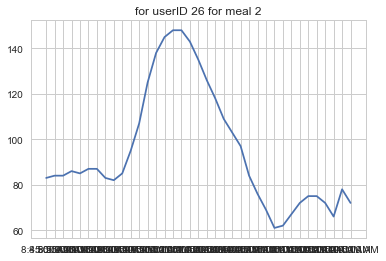

[ 83  84  84  86  85  87  87  83  82  85  95 107 125 138 145 148 148 143
 135 126 118 109 103  97  84  76  69  61  62  67  72  75  75  72  66  78
  72]
               0
8:45:00 AM    83
8:50:00 AM    84
8:55:00 AM    84
9:00:00 AM    86
9:05:00 AM    85
9:10:00 AM    87
9:15:00 AM    87
9:20:00 AM    83
9:25:00 AM    82
9:30:00 AM    85
9:35:00 AM    95
9:40:00 AM   107
9:45:00 AM   125
9:50:00 AM   138
9:55:00 AM   145
10:00:00 AM  148
10:05:00 AM  148
10:10:00 AM  143
10:15:00 AM  135
10:20:00 AM  126
10:25:00 AM  118
10:30:00 AM  109
10:35:00 AM  103
10:40:00 AM   97
10:45:00 AM   84
10:50:00 AM   76
10:55:00 AM   69
11:00:00 AM   61
11:05:00 AM   62
11:10:00 AM   67
11:15:00 AM   72
11:20:00 AM   75
11:25:00 AM   75
11:30:00 AM   72
11:35:00 AM   66
11:40:00 AM   78
11:45:00 AM   72
2133-039 CF 1


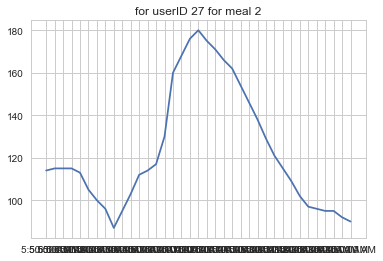

[114 115 115 115 113 105 100  96  87  95 103 112 114 117 130 160 168 176
 180 175 171 166 162 154 146 138 129 121 115 109 102  97  96  95  95  92
  90]
              0
5:50:00 AM  114
5:55:00 AM  115
6:00:00 AM  115
6:05:00 AM  115
6:10:00 AM  113
6:15:00 AM  105
6:20:00 AM  100
6:25:00 AM   96
6:30:00 AM   87
6:35:00 AM   95
6:40:00 AM  103
6:45:00 AM  112
6:50:00 AM  114
6:55:00 AM  117
7:00:00 AM  130
7:05:00 AM  160
7:10:00 AM  168
7:15:00 AM  176
7:20:00 AM  180
7:25:00 AM  175
7:30:00 AM  171
7:35:00 AM  166
7:40:00 AM  162
7:45:00 AM  154
7:50:00 AM  146
7:55:00 AM  138
8:00:00 AM  129
8:05:00 AM  121
8:10:00 AM  115
8:15:00 AM  109
8:20:00 AM  102
8:25:00 AM   97
8:30:00 AM   96
8:35:00 AM   95
8:40:00 AM   95
8:45:00 AM   92
8:50:00 AM   90
2133-040 CF 1


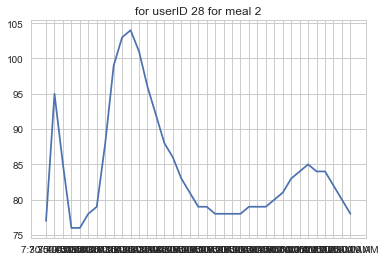

[ 77  95  85  76  76  78  79  88  99 103 104 101  96  92  88  86  83  81
  79  79  78  78  78  78  79  79  79  80  81  83  84  85  84  84  82  80
  78]
               0
7:30:00 AM    77
7:35:00 AM    95
7:40:00 AM    85
7:45:00 AM    76
7:50:00 AM    76
7:55:00 AM    78
8:00:00 AM    79
8:05:00 AM    88
8:10:00 AM    99
8:15:00 AM   103
8:20:00 AM   104
8:25:00 AM   101
8:30:00 AM    96
8:35:00 AM    92
8:40:00 AM    88
8:45:00 AM    86
8:50:00 AM    83
8:55:00 AM    81
9:00:00 AM    79
9:05:00 AM    79
9:10:00 AM    78
9:15:00 AM    78
9:20:00 AM    78
9:25:00 AM    78
9:30:00 AM    79
9:35:00 AM    79
9:40:00 AM    79
9:45:00 AM    80
9:50:00 AM    81
9:55:00 AM    83
10:00:00 AM   84
10:05:00 AM   85
10:10:00 AM   84
10:15:00 AM   84
10:20:00 AM   82
10:25:00 AM   80
10:30:00 AM   78
2133-041 CF 1


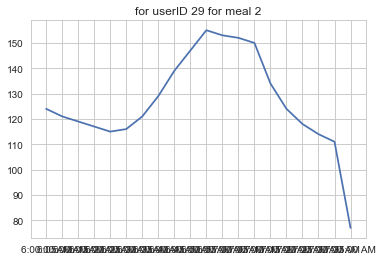

[124 121 119 117 115 116 121 129 139 147 155 153 152 150 134 124 118 114
 111  77]
              0
6:00:00 AM  124
6:05:00 AM  121
6:10:00 AM  119
6:15:00 AM  117
6:20:00 AM  115
6:25:00 AM  116
6:30:00 AM  121
6:35:00 AM  129
6:40:00 AM  139
6:45:00 AM  147
6:50:00 AM  155
6:55:00 AM  153
7:00:00 AM  152
7:05:00 AM  150
7:10:00 AM  134
7:15:00 AM  124
7:20:00 AM  118
7:25:00 AM  114
7:30:00 AM  111
7:35:00 AM   77
2133-001 CF 2


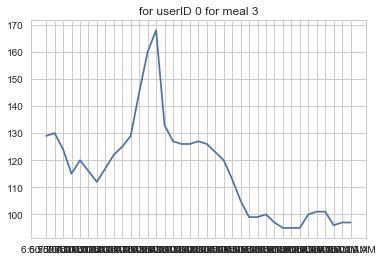

[129 130 124 115 120 116 112 117 122 125 129 145 160 168 133 127 126 126
 127 126 123 120 113 105  99  99 100  97  95  95  95 100 101 101  96  97
  97]
              0
6:50:00 AM  129
6:55:00 AM  130
7:00:00 AM  124
7:05:00 AM  115
7:10:00 AM  120
7:15:00 AM  116
7:20:00 AM  112
7:25:00 AM  117
7:30:00 AM  122
7:35:00 AM  125
7:40:00 AM  129
7:45:00 AM  145
7:50:00 AM  160
7:55:00 AM  168
8:00:00 AM  133
8:05:00 AM  127
8:10:00 AM  126
8:15:00 AM  126
8:20:00 AM  127
8:25:00 AM  126
8:30:00 AM  123
8:35:00 AM  120
8:40:00 AM  113
8:45:00 AM  105
8:50:00 AM   99
8:55:00 AM   99
9:00:00 AM  100
9:05:00 AM   97
9:10:00 AM   95
9:15:00 AM   95
9:20:00 AM   95
9:25:00 AM  100
9:30:00 AM  101
9:35:00 AM  101
9:40:00 AM   96
9:45:00 AM   97
9:50:00 AM   97
2133-002 CF 2


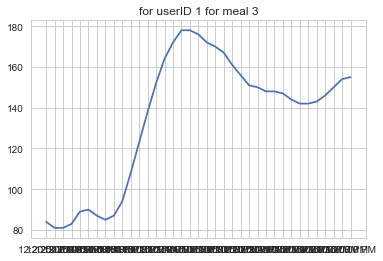

[ 84  81  81  83  89  90  87  85  87  94 108 123 138 152 164 172 178 178
 176 172 170 167 161 156 151 150 148 148 147 144 142 142 143 146 150 154
 155]
               0
12:20:00 PM   84
12:25:00 PM   81
12:30:00 PM   81
12:35:00 PM   83
12:40:00 PM   89
12:45:00 PM   90
12:50:00 PM   87
12:55:00 PM   85
1:00:00 PM    87
1:05:00 PM    94
1:10:00 PM   108
1:15:00 PM   123
1:20:00 PM   138
1:25:00 PM   152
1:30:00 PM   164
1:35:00 PM   172
1:40:00 PM   178
1:45:00 PM   178
1:50:00 PM   176
1:55:00 PM   172
2:00:00 PM   170
2:05:00 PM   167
2:10:00 PM   161
2:15:00 PM   156
2:20:00 PM   151
2:25:00 PM   150
2:30:00 PM   148
2:35:00 PM   148
2:40:00 PM   147
2:45:00 PM   144
2:50:00 PM   142
2:55:00 PM   142
3:00:00 PM   143
3:05:00 PM   146
3:10:00 PM   150
3:15:00 PM   154
3:20:00 PM   155
2133-004 CF 2


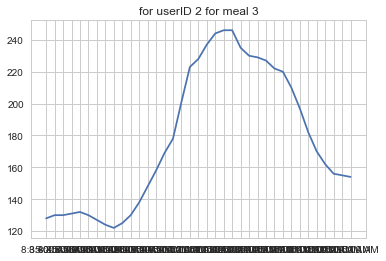

[128 130 130 131 132 130 127 124 122 125 130 138 148 158 169 178 201 223
 228 237 244 246 246 235 230 229 227 222 220 210 197 182 170 162 156 155
 154]
               0
8:35:00 AM   128
8:40:00 AM   130
8:45:00 AM   130
8:50:00 AM   131
8:55:00 AM   132
9:00:00 AM   130
9:05:00 AM   127
9:10:00 AM   124
9:15:00 AM   122
9:20:00 AM   125
9:25:00 AM   130
9:30:00 AM   138
9:35:00 AM   148
9:40:00 AM   158
9:45:00 AM   169
9:50:00 AM   178
9:55:00 AM   201
10:00:00 AM  223
10:05:00 AM  228
10:10:00 AM  237
10:15:00 AM  244
10:20:00 AM  246
10:25:00 AM  246
10:30:00 AM  235
10:35:00 AM  230
10:40:00 AM  229
10:45:00 AM  227
10:50:00 AM  222
10:55:00 AM  220
11:00:00 AM  210
11:05:00 AM  197
11:10:00 AM  182
11:15:00 AM  170
11:20:00 AM  162
11:25:00 AM  156
11:30:00 AM  155
11:35:00 AM  154
2133-006 CF 2


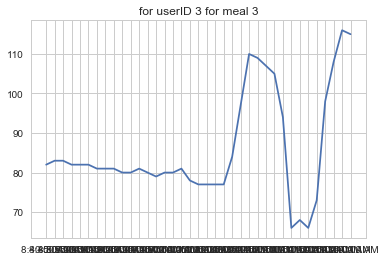

[ 82  83  83  82  82  82  81  81  81  80  80  81  80  79  80  80  81  78
  77  77  77  77  84  97 110 109 107 105  94  66  68  66  73  98 108 116
 115]
               0
8:40:00 AM    82
8:45:00 AM    83
8:50:00 AM    83
8:55:00 AM    82
9:00:00 AM    82
9:05:00 AM    82
9:10:00 AM    81
9:15:00 AM    81
9:20:00 AM    81
9:25:00 AM    80
9:30:00 AM    80
9:35:00 AM    81
9:40:00 AM    80
9:45:00 AM    79
9:50:00 AM    80
9:55:00 AM    80
10:00:00 AM   81
10:05:00 AM   78
10:10:00 AM   77
10:15:00 AM   77
10:20:00 AM   77
10:25:00 AM   77
10:30:00 AM   84
10:35:00 AM   97
10:40:00 AM  110
10:45:00 AM  109
10:50:00 AM  107
10:55:00 AM  105
11:00:00 AM   94
11:05:00 AM   66
11:10:00 AM   68
11:15:00 AM   66
11:20:00 AM   73
11:25:00 AM   98
11:30:00 AM  108
11:35:00 AM  116
11:40:00 AM  115
2133-008 CF 2


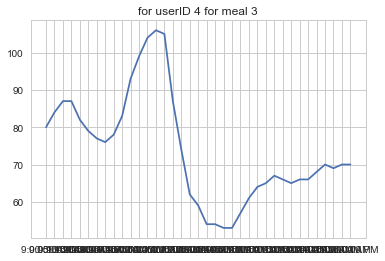

[ 80  84  87  87  82  79  77  76  78  83  93  99 104 106 105  87  74  62
  59  54  54  53  53  57  61  64  65  67  66  65  66  66  68  70  69  70
  70]
               0
9:00:00 AM    80
9:05:00 AM    84
9:10:00 AM    87
9:15:00 AM    87
9:20:00 AM    82
9:25:00 AM    79
9:30:00 AM    77
9:35:00 AM    76
9:40:00 AM    78
9:45:00 AM    83
9:50:00 AM    93
9:55:00 AM    99
10:00:00 AM  104
10:05:00 AM  106
10:10:00 AM  105
10:15:00 AM   87
10:20:00 AM   74
10:25:00 AM   62
10:30:00 AM   59
10:35:00 AM   54
10:40:00 AM   54
10:45:00 AM   53
10:50:00 AM   53
10:55:00 AM   57
11:00:00 AM   61
11:05:00 AM   64
11:10:00 AM   65
11:15:00 AM   67
11:20:00 AM   66
11:25:00 AM   65
11:30:00 AM   66
11:35:00 AM   66
11:40:00 AM   68
11:45:00 AM   70
11:50:00 AM   69
11:55:00 AM   70
12:00:00 PM   70
2133-009 CF 2


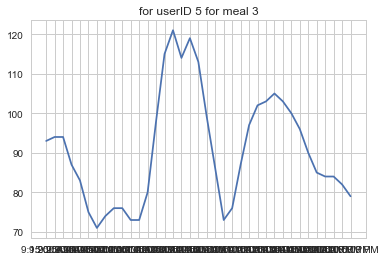

[ 93  94  94  87  83  75  71  74  76  76  73  73  80  98 115 121 114 119
 113  99  86  73  76  87  97 102 103 105 103 100  96  90  85  84  84  82
  79]
               0
9:15:00 AM    93
9:20:00 AM    94
9:25:00 AM    94
9:30:00 AM    87
9:35:00 AM    83
9:40:00 AM    75
9:45:00 AM    71
9:50:00 AM    74
9:55:00 AM    76
10:00:00 AM   76
10:05:00 AM   73
10:10:00 AM   73
10:15:00 AM   80
10:20:00 AM   98
10:25:00 AM  115
10:30:00 AM  121
10:35:00 AM  114
10:40:00 AM  119
10:45:00 AM  113
10:50:00 AM   99
10:55:00 AM   86
11:00:00 AM   73
11:05:00 AM   76
11:10:00 AM   87
11:15:00 AM   97
11:20:00 AM  102
11:25:00 AM  103
11:30:00 AM  105
11:35:00 AM  103
11:40:00 AM  100
11:45:00 AM   96
11:50:00 AM   90
11:55:00 AM   85
12:00:00 PM   84
12:05:00 PM   84
12:10:00 PM   82
12:15:00 PM   79
2133-010 CF 2


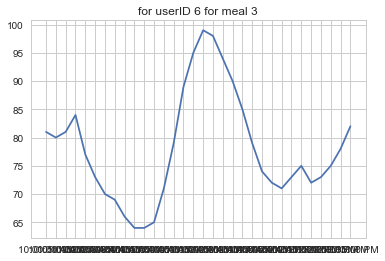

[81 80 81 84 77 73 70 69 66 64 64 65 71 79 89 95 99 98 94 90 85 79 74 72
 71 73 75 72 73 75 78 82]
              0
10:00:00 AM  81
10:05:00 AM  80
10:10:00 AM  81
10:15:00 AM  84
10:20:00 AM  77
10:25:00 AM  73
10:30:00 AM  70
10:35:00 AM  69
10:40:00 AM  66
10:45:00 AM  64
10:50:00 AM  64
10:55:00 AM  65
11:00:00 AM  71
11:05:00 AM  79
11:10:00 AM  89
11:15:00 AM  95
11:20:00 AM  99
11:25:00 AM  98
11:30:00 AM  94
11:35:00 AM  90
11:40:00 AM  85
11:45:00 AM  79
11:50:00 AM  74
11:55:00 AM  72
12:00:00 PM  71
12:05:00 PM  73
12:10:00 PM  75
12:15:00 PM  72
12:20:00 PM  73
12:25:00 PM  75
12:30:00 PM  78
12:35:00 PM  82
2133-011 CF 2


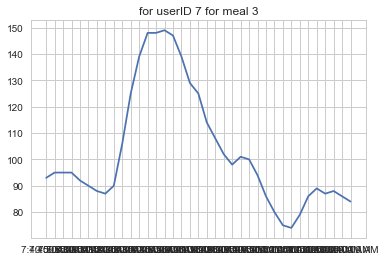

[ 93  95  95  95  92  90  88  87  90 106 125 139 148 148 149 147 139 129
 125 114 108 102  98 101 100  94  86  80  75  74  79  86  89  87  88  86
  84]
               0
7:40:00 AM    93
7:45:00 AM    95
7:50:00 AM    95
7:55:00 AM    95
8:00:00 AM    92
8:05:00 AM    90
8:10:00 AM    88
8:15:00 AM    87
8:20:00 AM    90
8:25:00 AM   106
8:30:00 AM   125
8:35:00 AM   139
8:40:00 AM   148
8:45:00 AM   148
8:50:00 AM   149
8:55:00 AM   147
9:00:00 AM   139
9:05:00 AM   129
9:10:00 AM   125
9:15:00 AM   114
9:20:00 AM   108
9:25:00 AM   102
9:30:00 AM    98
9:35:00 AM   101
9:40:00 AM   100
9:45:00 AM    94
9:50:00 AM    86
9:55:00 AM    80
10:00:00 AM   75
10:05:00 AM   74
10:10:00 AM   79
10:15:00 AM   86
10:20:00 AM   89
10:25:00 AM   87
10:30:00 AM   88
10:35:00 AM   86
10:40:00 AM   84
2133-012 CF 2


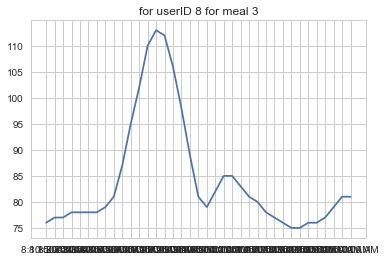

[ 76  77  77  78  78  78  78  79  81  87  95 102 110 113 112 106  98  89
  81  79  82  85  85  83  81  80  78  77  76  75  75  76  76  77  79  81
  81]
               0
8:10:00 AM    76
8:15:00 AM    77
8:20:00 AM    77
8:25:00 AM    78
8:30:00 AM    78
8:35:00 AM    78
8:40:00 AM    78
8:45:00 AM    79
8:50:00 AM    81
8:55:00 AM    87
9:00:00 AM    95
9:05:00 AM   102
9:10:00 AM   110
9:15:00 AM   113
9:20:00 AM   112
9:25:00 AM   106
9:30:00 AM    98
9:35:00 AM    89
9:40:00 AM    81
9:45:00 AM    79
9:50:00 AM    82
9:55:00 AM    85
10:00:00 AM   85
10:05:00 AM   83
10:10:00 AM   81
10:15:00 AM   80
10:20:00 AM   78
10:25:00 AM   77
10:30:00 AM   76
10:35:00 AM   75
10:40:00 AM   75
10:45:00 AM   76
10:50:00 AM   76
10:55:00 AM   77
11:00:00 AM   79
11:05:00 AM   81
11:10:00 AM   81
2133-013 CF 2


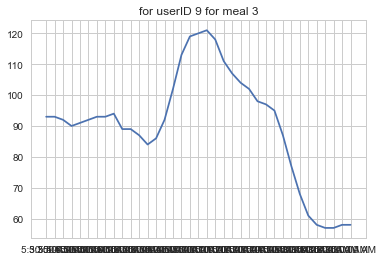

[ 93  93  92  90  91  92  93  93  94  89  89  87  84  86  92 102 113 119
 120 121 118 111 107 104 102  98  97  95  87  77  68  61  58  57  57  58
  58]
              0
5:30:00 AM   93
5:35:00 AM   93
5:40:00 AM   92
5:45:00 AM   90
5:50:00 AM   91
5:55:00 AM   92
6:00:00 AM   93
6:05:00 AM   93
6:10:00 AM   94
6:15:00 AM   89
6:20:00 AM   89
6:25:00 AM   87
6:30:00 AM   84
6:35:00 AM   86
6:40:00 AM   92
6:45:00 AM  102
6:50:00 AM  113
6:55:00 AM  119
7:00:00 AM  120
7:05:00 AM  121
7:10:00 AM  118
7:15:00 AM  111
7:20:00 AM  107
7:25:00 AM  104
7:30:00 AM  102
7:35:00 AM   98
7:40:00 AM   97
7:45:00 AM   95
7:50:00 AM   87
7:55:00 AM   77
8:00:00 AM   68
8:05:00 AM   61
8:10:00 AM   58
8:15:00 AM   57
8:20:00 AM   57
8:25:00 AM   58
8:30:00 AM   58
2133-015 CF 2


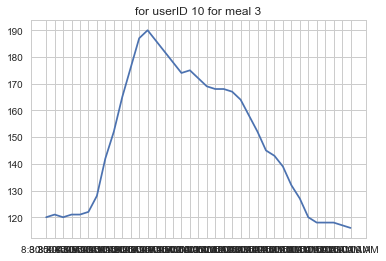

[120 121 120 121 121 122 128 142 152 165 176 187 190 186 182 178 174 175
 172 169 168 168 167 164 158 152 145 143 139 132 127 120 118 118 118 117
 116]
               0
8:30:00 AM   120
8:35:00 AM   121
8:40:00 AM   120
8:45:00 AM   121
8:50:00 AM   121
8:55:00 AM   122
9:00:00 AM   128
9:05:00 AM   142
9:10:00 AM   152
9:15:00 AM   165
9:20:00 AM   176
9:25:00 AM   187
9:30:00 AM   190
9:35:00 AM   186
9:40:00 AM   182
9:45:00 AM   178
9:50:00 AM   174
9:55:00 AM   175
10:00:00 AM  172
10:05:00 AM  169
10:10:00 AM  168
10:15:00 AM  168
10:20:00 AM  167
10:25:00 AM  164
10:30:00 AM  158
10:35:00 AM  152
10:40:00 AM  145
10:45:00 AM  143
10:50:00 AM  139
10:55:00 AM  132
11:00:00 AM  127
11:05:00 AM  120
11:10:00 AM  118
11:15:00 AM  118
11:20:00 AM  118
11:25:00 AM  117
11:30:00 AM  116
2133-017 CF 2


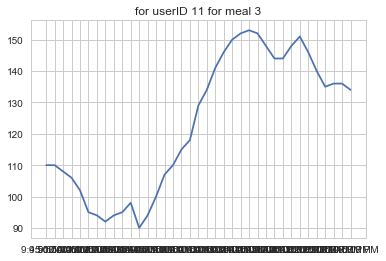

[110 110 108 106 102  95  94  92  94  95  98  90  94 100 107 110 115 118
 129 134 141 146 150 152 153 152 148 144 144 148 151 146 140 135 136 136
 134]
               0
9:45:00 AM   110
9:50:00 AM   110
9:55:00 AM   108
10:00:00 AM  106
10:05:00 AM  102
10:10:00 AM   95
10:15:00 AM   94
10:20:00 AM   92
10:25:00 AM   94
10:30:00 AM   95
10:35:00 AM   98
10:40:00 AM   90
10:45:00 AM   94
10:50:00 AM  100
10:55:00 AM  107
11:00:00 AM  110
11:05:00 AM  115
11:10:00 AM  118
11:15:00 AM  129
11:20:00 AM  134
11:25:00 AM  141
11:30:00 AM  146
11:35:00 AM  150
11:40:00 AM  152
11:45:00 AM  153
11:50:00 AM  152
11:55:00 AM  148
12:00:00 PM  144
12:05:00 PM  144
12:10:00 PM  148
12:15:00 PM  151
12:20:00 PM  146
12:25:00 PM  140
12:30:00 PM  135
12:35:00 PM  136
12:40:00 PM  136
12:45:00 PM  134
2133-018 CF 2


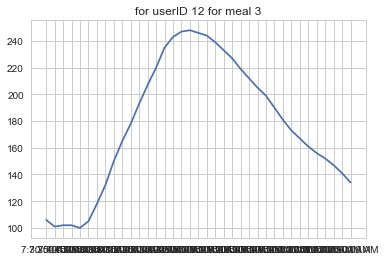

[106 101 102 102 100 105 118 132 150 165 178 193 207 220 235 243 247 248
 246 244 239 233 227 219 212 205 199 190 181 173 167 161 156 152 147 141
 134]
               0
7:30:00 AM   106
7:35:00 AM   101
7:40:00 AM   102
7:45:00 AM   102
7:50:00 AM   100
7:55:00 AM   105
8:00:00 AM   118
8:05:00 AM   132
8:10:00 AM   150
8:15:00 AM   165
8:20:00 AM   178
8:25:00 AM   193
8:30:00 AM   207
8:35:00 AM   220
8:40:00 AM   235
8:45:00 AM   243
8:50:00 AM   247
8:55:00 AM   248
9:00:00 AM   246
9:05:00 AM   244
9:10:00 AM   239
9:15:00 AM   233
9:20:00 AM   227
9:25:00 AM   219
9:30:00 AM   212
9:35:00 AM   205
9:40:00 AM   199
9:45:00 AM   190
9:50:00 AM   181
9:55:00 AM   173
10:00:00 AM  167
10:05:00 AM  161
10:10:00 AM  156
10:15:00 AM  152
10:20:00 AM  147
10:25:00 AM  141
10:30:00 AM  134
2133-019 CF 2


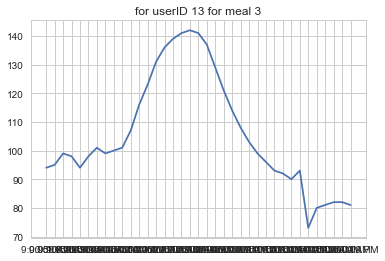

[ 94  95  99  98  94  98 101  99 100 101 107 116 123 131 136 139 141 142
 141 137 129 121 114 108 103  99  96  93  92  90  93  73  80  81  82  82
  81]
               0
9:00:00 AM    94
9:05:00 AM    95
9:10:00 AM    99
9:15:00 AM    98
9:20:00 AM    94
9:25:00 AM    98
9:30:00 AM   101
9:35:00 AM    99
9:40:00 AM   100
9:45:00 AM   101
9:50:00 AM   107
9:55:00 AM   116
10:00:00 AM  123
10:05:00 AM  131
10:10:00 AM  136
10:15:00 AM  139
10:20:00 AM  141
10:25:00 AM  142
10:30:00 AM  141
10:35:00 AM  137
10:40:00 AM  129
10:45:00 AM  121
10:50:00 AM  114
10:55:00 AM  108
11:00:00 AM  103
11:05:00 AM   99
11:10:00 AM   96
11:15:00 AM   93
11:20:00 AM   92
11:25:00 AM   90
11:30:00 AM   93
11:35:00 AM   73
11:40:00 AM   80
11:45:00 AM   81
11:50:00 AM   82
11:55:00 AM   82
12:00:00 PM   81
2133-020 CF 2


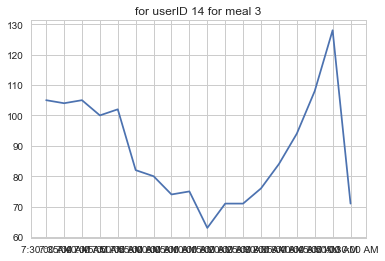

[105 104 105 100 102  82  80  74  75  63  71  71  76  84  94 108 128  71]
               0
7:30:00 AM   105
7:35:00 AM   104
7:40:00 AM   105
7:45:00 AM   100
7:50:00 AM   102
7:55:00 AM    82
8:00:00 AM    80
8:05:00 AM    74
8:10:00 AM    75
8:15:00 AM    63
8:20:00 AM    71
8:25:00 AM    71
8:30:00 AM    76
8:35:00 AM    84
8:40:00 AM    94
8:45:00 AM   108
8:50:00 AM   128
10:30:00 AM   71
2133-021 CF 2


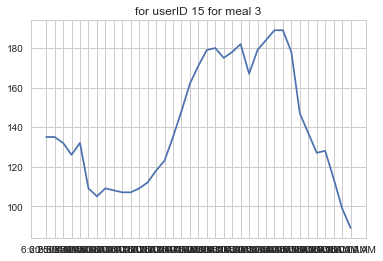

[135 135 132 126 132 109 105 109 108 107 107 109 112 118 123 135 148 162
 171 179 180 175 178 182 167 179 184 189 189 178 147 137 127 128 114  99
  89]
              0
6:20:00 AM  135
6:25:00 AM  135
6:30:00 AM  132
6:35:00 AM  126
6:40:00 AM  132
6:45:00 AM  109
6:50:00 AM  105
6:55:00 AM  109
7:00:00 AM  108
7:05:00 AM  107
7:10:00 AM  107
7:15:00 AM  109
7:20:00 AM  112
7:25:00 AM  118
7:30:00 AM  123
7:35:00 AM  135
7:40:00 AM  148
7:45:00 AM  162
7:50:00 AM  171
7:55:00 AM  179
8:00:00 AM  180
8:05:00 AM  175
8:10:00 AM  178
8:15:00 AM  182
8:20:00 AM  167
8:25:00 AM  179
8:30:00 AM  184
8:35:00 AM  189
8:40:00 AM  189
8:45:00 AM  178
8:50:00 AM  147
8:55:00 AM  137
9:00:00 AM  127
9:05:00 AM  128
9:10:00 AM  114
9:15:00 AM   99
9:20:00 AM   89
2133-022 CF 2


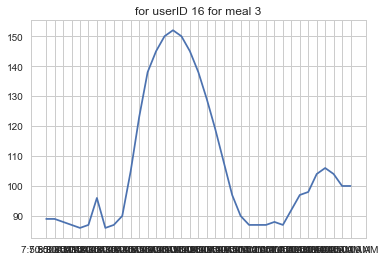

[ 89  89  88  87  86  87  96  86  87  90 105 123 138 145 150 152 150 145
 138 129 119 108  97  90  87  87  87  88  87  92  97  98 104 106 104 100
 100]
               0
7:50:00 AM    89
7:55:00 AM    89
8:00:00 AM    88
8:05:00 AM    87
8:10:00 AM    86
8:15:00 AM    87
8:20:00 AM    96
8:25:00 AM    86
8:30:00 AM    87
8:35:00 AM    90
8:40:00 AM   105
8:45:00 AM   123
8:50:00 AM   138
8:55:00 AM   145
9:00:00 AM   150
9:05:00 AM   152
9:10:00 AM   150
9:15:00 AM   145
9:20:00 AM   138
9:25:00 AM   129
9:30:00 AM   119
9:35:00 AM   108
9:40:00 AM    97
9:45:00 AM    90
9:50:00 AM    87
9:55:00 AM    87
10:00:00 AM   87
10:05:00 AM   88
10:10:00 AM   87
10:15:00 AM   92
10:20:00 AM   97
10:25:00 AM   98
10:30:00 AM  104
10:35:00 AM  106
10:40:00 AM  104
10:45:00 AM  100
10:50:00 AM  100
2133-024 CF 2


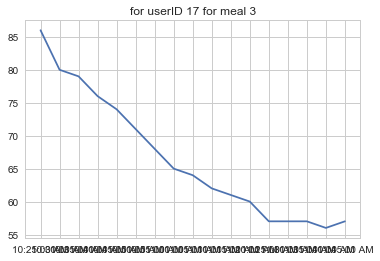

[86 80 79 76 74 71 68 65 64 62 61 60 57 57 57 56 57]
              0
10:25:00 AM  86
10:30:00 AM  80
10:35:00 AM  79
10:40:00 AM  76
10:45:00 AM  74
10:50:00 AM  71
10:55:00 AM  68
11:00:00 AM  65
11:05:00 AM  64
11:10:00 AM  62
11:15:00 AM  61
11:20:00 AM  60
11:25:00 AM  57
11:30:00 AM  57
11:35:00 AM  57
11:40:00 AM  56
11:45:00 AM  57
2133-025 CF 2


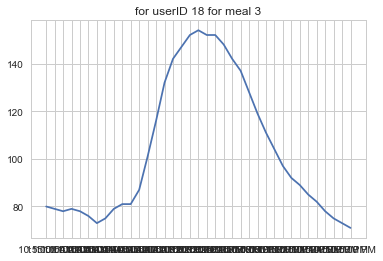

[ 80  79  78  79  78  76  73  75  79  81  81  87 101 116 132 142 147 152
 154 152 152 148 142 137 128 119 111 104  97  92  89  85  82  78  75  73
  71]
               0
10:55:00 AM   80
11:00:00 AM   79
11:05:00 AM   78
11:10:00 AM   79
11:15:00 AM   78
11:20:00 AM   76
11:25:00 AM   73
11:30:00 AM   75
11:35:00 AM   79
11:40:00 AM   81
11:45:00 AM   81
11:50:00 AM   87
11:55:00 AM  101
12:00:00 PM  116
12:05:00 PM  132
12:10:00 PM  142
12:15:00 PM  147
12:20:00 PM  152
12:25:00 PM  154
12:30:00 PM  152
12:35:00 PM  152
12:40:00 PM  148
12:45:00 PM  142
12:50:00 PM  137
12:55:00 PM  128
1:00:00 PM   119
1:05:00 PM   111
1:10:00 PM   104
1:15:00 PM    97
1:20:00 PM    92
1:25:00 PM    89
1:30:00 PM    85
1:35:00 PM    82
1:40:00 PM    78
1:45:00 PM    75
1:50:00 PM    73
1:55:00 PM    71
2133-026 CF 2


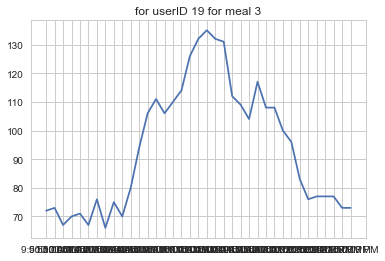

[ 72  73  67  70  71  67  76  66  75  70  80  94 106 111 106 110 114 126
 132 135 132 131 112 109 104 117 108 108 100  96  83  76  77  77  77  73
  73]
               0
9:50:00 AM    72
9:55:00 AM    73
10:00:00 AM   67
10:05:00 AM   70
10:10:00 AM   71
10:15:00 AM   67
10:20:00 AM   76
10:25:00 AM   66
10:30:00 AM   75
10:35:00 AM   70
10:40:00 AM   80
10:45:00 AM   94
10:50:00 AM  106
10:55:00 AM  111
11:00:00 AM  106
11:05:00 AM  110
11:10:00 AM  114
11:15:00 AM  126
11:20:00 AM  132
11:25:00 AM  135
11:30:00 AM  132
11:35:00 AM  131
11:40:00 AM  112
11:45:00 AM  109
11:50:00 AM  104
11:55:00 AM  117
12:00:00 PM  108
12:05:00 PM  108
12:10:00 PM  100
12:15:00 PM   96
12:20:00 PM   83
12:25:00 PM   76
12:30:00 PM   77
12:35:00 PM   77
12:40:00 PM   77
12:45:00 PM   73
12:50:00 PM   73
2133-028 CF 2


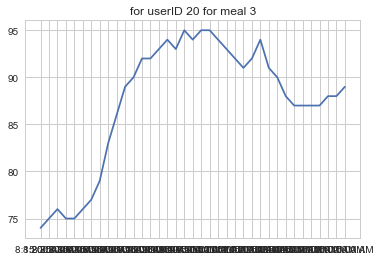

[74 75 76 75 75 76 77 79 83 86 89 90 92 92 93 94 93 95 94 95 95 94 93 92
 91 92 94 91 90 88 87 87 87 87 88 88 89]
              0
8:15:00 AM   74
8:20:00 AM   75
8:25:00 AM   76
8:30:00 AM   75
8:35:00 AM   75
8:40:00 AM   76
8:45:00 AM   77
8:50:00 AM   79
8:55:00 AM   83
9:00:00 AM   86
9:05:00 AM   89
9:10:00 AM   90
9:15:00 AM   92
9:20:00 AM   92
9:25:00 AM   93
9:30:00 AM   94
9:35:00 AM   93
9:40:00 AM   95
9:45:00 AM   94
9:50:00 AM   95
9:55:00 AM   95
10:00:00 AM  94
10:05:00 AM  93
10:10:00 AM  92
10:15:00 AM  91
10:20:00 AM  92
10:25:00 AM  94
10:30:00 AM  91
10:35:00 AM  90
10:40:00 AM  88
10:45:00 AM  87
10:50:00 AM  87
10:55:00 AM  87
11:00:00 AM  87
11:05:00 AM  88
11:10:00 AM  88
11:15:00 AM  89
2133-030 CF 2


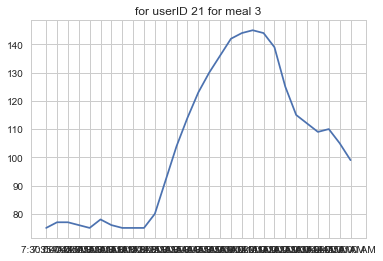

[ 75  77  77  76  75  78  76  75  75  75  80  92 104 114 123 130 136 142
 144 145 144 139 125 115 112 109 110 105  99]
              0
7:30:00 AM   75
7:35:00 AM   77
7:40:00 AM   77
7:45:00 AM   76
7:50:00 AM   75
7:55:00 AM   78
8:00:00 AM   76
8:05:00 AM   75
8:10:00 AM   75
8:15:00 AM   75
8:20:00 AM   80
8:25:00 AM   92
8:30:00 AM  104
8:35:00 AM  114
8:40:00 AM  123
8:45:00 AM  130
8:50:00 AM  136
8:55:00 AM  142
9:00:00 AM  144
9:05:00 AM  145
9:10:00 AM  144
9:15:00 AM  139
9:20:00 AM  125
9:25:00 AM  115
9:30:00 AM  112
9:35:00 AM  109
9:40:00 AM  110
9:45:00 AM  105
9:50:00 AM   99
2133-032 CF 2


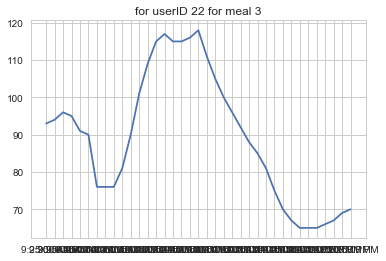

[ 93  94  96  95  91  90  76  76  76  81  90 101 109 115 117 115 115 116
 118 111 105 100  96  92  88  85  81  75  70  67  65  65  65  66  67  69
  70]
               0
9:25:00 AM    93
9:30:00 AM    94
9:35:00 AM    96
9:40:00 AM    95
9:45:00 AM    91
9:50:00 AM    90
9:55:00 AM    76
10:00:00 AM   76
10:05:00 AM   76
10:10:00 AM   81
10:15:00 AM   90
10:20:00 AM  101
10:25:00 AM  109
10:30:00 AM  115
10:35:00 AM  117
10:40:00 AM  115
10:45:00 AM  115
10:50:00 AM  116
10:55:00 AM  118
11:00:00 AM  111
11:05:00 AM  105
11:10:00 AM  100
11:15:00 AM   96
11:20:00 AM   92
11:25:00 AM   88
11:30:00 AM   85
11:35:00 AM   81
11:40:00 AM   75
11:45:00 AM   70
11:50:00 AM   67
11:55:00 AM   65
12:00:00 PM   65
12:05:00 PM   65
12:10:00 PM   66
12:15:00 PM   67
12:20:00 PM   69
12:25:00 PM   70
2133-033 CF 2


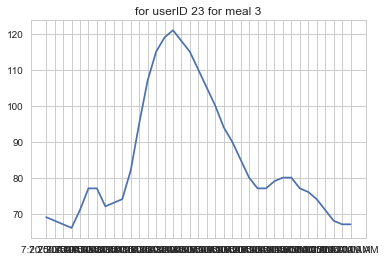

[ 69  68  67  66  71  77  77  72  73  74  82  95 107 115 119 121 118 115
 110 105 100  94  90  85  80  77  77  79  80  80  77  76  74  71  68  67
  67]
               0
7:20:00 AM    69
7:25:00 AM    68
7:30:00 AM    67
7:35:00 AM    66
7:40:00 AM    71
7:45:00 AM    77
7:50:00 AM    77
7:55:00 AM    72
8:00:00 AM    73
8:05:00 AM    74
8:10:00 AM    82
8:15:00 AM    95
8:20:00 AM   107
8:25:00 AM   115
8:30:00 AM   119
8:35:00 AM   121
8:40:00 AM   118
8:45:00 AM   115
8:50:00 AM   110
8:55:00 AM   105
9:00:00 AM   100
9:05:00 AM    94
9:10:00 AM    90
9:15:00 AM    85
9:20:00 AM    80
9:25:00 AM    77
9:30:00 AM    77
9:35:00 AM    79
9:40:00 AM    80
9:45:00 AM    80
9:50:00 AM    77
9:55:00 AM    76
10:00:00 AM   74
10:05:00 AM   71
10:10:00 AM   68
10:15:00 AM   67
10:20:00 AM   67
2133-035 CF 2


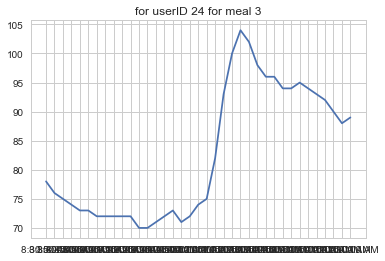

[ 78  76  75  74  73  73  72  72  72  72  72  70  70  71  72  73  71  72
  74  75  82  93 100 104 102  98  96  96  94  94  95  94  93  92  90  88
  89]
               0
8:30:00 AM    78
8:35:00 AM    76
8:40:00 AM    75
8:45:00 AM    74
8:50:00 AM    73
8:55:00 AM    73
9:00:00 AM    72
9:05:00 AM    72
9:10:00 AM    72
9:15:00 AM    72
9:20:00 AM    72
9:25:00 AM    70
9:30:00 AM    70
9:35:00 AM    71
9:40:00 AM    72
9:45:00 AM    73
9:50:00 AM    71
9:55:00 AM    72
10:00:00 AM   74
10:05:00 AM   75
10:10:00 AM   82
10:15:00 AM   93
10:20:00 AM  100
10:25:00 AM  104
10:30:00 AM  102
10:35:00 AM   98
10:40:00 AM   96
10:45:00 AM   96
10:50:00 AM   94
10:55:00 AM   94
11:00:00 AM   95
11:05:00 AM   94
11:10:00 AM   93
11:15:00 AM   92
11:20:00 AM   90
11:25:00 AM   88
11:30:00 AM   89
2133-036 CF 2


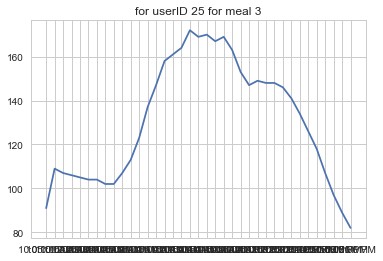

[ 91 109 107 106 105 104 104 102 102 107 113 123 137 147 158 161 164 172
 169 170 167 169 163 153 147 149 148 148 146 141 134 126 118 107  97  89
  82]
               0
10:05:00 AM   91
10:10:00 AM  109
10:15:00 AM  107
10:20:00 AM  106
10:25:00 AM  105
10:30:00 AM  104
10:35:00 AM  104
10:40:00 AM  102
10:45:00 AM  102
10:50:00 AM  107
10:55:00 AM  113
11:00:00 AM  123
11:05:00 AM  137
11:10:00 AM  147
11:15:00 AM  158
11:20:00 AM  161
11:25:00 AM  164
11:30:00 AM  172
11:35:00 AM  169
11:40:00 AM  170
11:45:00 AM  167
11:50:00 AM  169
11:55:00 AM  163
12:00:00 PM  153
12:05:00 PM  147
12:10:00 PM  149
12:15:00 PM  148
12:20:00 PM  148
12:25:00 PM  146
12:30:00 PM  141
12:35:00 PM  134
12:40:00 PM  126
12:45:00 PM  118
12:50:00 PM  107
12:55:00 PM   97
1:00:00 PM    89
1:05:00 PM    82
2133-037 CF 2


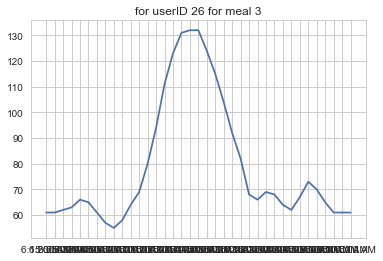

[ 61  61  62  63  66  65  61  57  55  58  64  69  80  94 111 123 131 132
 132 124 115 104  92  82  68  66  69  68  64  62  67  73  70  65  61  61
  61]
              0
6:15:00 AM   61
6:20:00 AM   61
6:25:00 AM   62
6:30:00 AM   63
6:35:00 AM   66
6:40:00 AM   65
6:45:00 AM   61
6:50:00 AM   57
6:55:00 AM   55
7:00:00 AM   58
7:05:00 AM   64
7:10:00 AM   69
7:15:00 AM   80
7:20:00 AM   94
7:25:00 AM  111
7:30:00 AM  123
7:35:00 AM  131
7:40:00 AM  132
7:45:00 AM  132
7:50:00 AM  124
7:55:00 AM  115
8:00:00 AM  104
8:05:00 AM   92
8:10:00 AM   82
8:15:00 AM   68
8:20:00 AM   66
8:25:00 AM   69
8:30:00 AM   68
8:35:00 AM   64
8:40:00 AM   62
8:45:00 AM   67
8:50:00 AM   73
8:55:00 AM   70
9:00:00 AM   65
9:05:00 AM   61
9:10:00 AM   61
9:15:00 AM   61
2133-039 CF 2


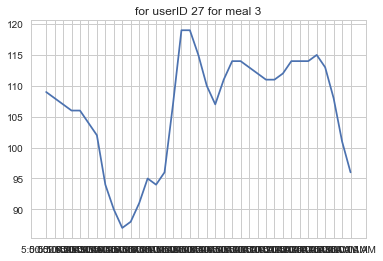

[109 108 107 106 106 104 102  94  90  87  88  91  95  94  96 107 119 119
 115 110 107 111 114 114 113 112 111 111 112 114 114 114 115 113 108 101
  96]
              0
5:00:00 AM  109
5:05:00 AM  108
5:10:00 AM  107
5:15:00 AM  106
5:20:00 AM  106
5:25:00 AM  104
5:30:00 AM  102
5:35:00 AM   94
5:40:00 AM   90
5:45:00 AM   87
5:50:00 AM   88
5:55:00 AM   91
6:00:00 AM   95
6:05:00 AM   94
6:10:00 AM   96
6:15:00 AM  107
6:20:00 AM  119
6:25:00 AM  119
6:30:00 AM  115
6:35:00 AM  110
6:40:00 AM  107
6:45:00 AM  111
6:50:00 AM  114
6:55:00 AM  114
7:00:00 AM  113
7:05:00 AM  112
7:10:00 AM  111
7:15:00 AM  111
7:20:00 AM  112
7:25:00 AM  114
7:30:00 AM  114
7:35:00 AM  114
7:40:00 AM  115
7:45:00 AM  113
7:50:00 AM  108
7:55:00 AM  101
8:00:00 AM   96
2133-040 CF 2


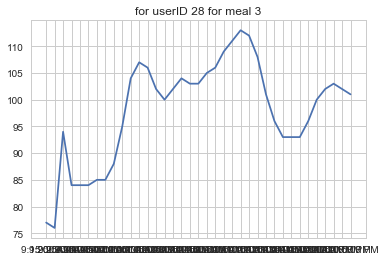

[ 77  76  94  84  84  84  85  85  88  95 104 107 106 102 100 102 104 103
 103 105 106 109 111 113 112 108 101  96  93  93  93  96 100 102 103 102
 101]
               0
9:15:00 AM    77
9:20:00 AM    76
9:25:00 AM    94
9:30:00 AM    84
9:35:00 AM    84
9:40:00 AM    84
9:45:00 AM    85
9:50:00 AM    85
9:55:00 AM    88
10:00:00 AM   95
10:05:00 AM  104
10:10:00 AM  107
10:15:00 AM  106
10:20:00 AM  102
10:25:00 AM  100
10:30:00 AM  102
10:35:00 AM  104
10:40:00 AM  103
10:45:00 AM  103
10:50:00 AM  105
10:55:00 AM  106
11:00:00 AM  109
11:05:00 AM  111
11:10:00 AM  113
11:15:00 AM  112
11:20:00 AM  108
11:25:00 AM  101
11:30:00 AM   96
11:35:00 AM   93
11:40:00 AM   93
11:45:00 AM   93
11:50:00 AM   96
11:55:00 AM  100
12:00:00 PM  102
12:05:00 PM  103
12:10:00 PM  102
12:15:00 PM  101
2133-041 CF 2


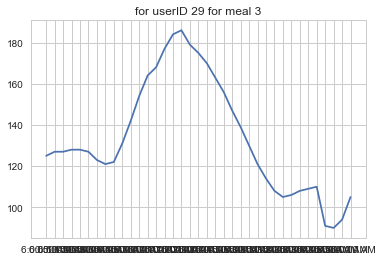

[125 127 127 128 128 127 123 121 122 131 142 154 164 168 177 184 186 179
 175 170 163 156 147 139 130 121 114 108 105 106 108 109 110  91  90  94
 105]
              0
6:00:00 AM  125
6:05:00 AM  127
6:10:00 AM  127
6:15:00 AM  128
6:20:00 AM  128
6:25:00 AM  127
6:30:00 AM  123
6:35:00 AM  121
6:40:00 AM  122
6:45:00 AM  131
6:50:00 AM  142
6:55:00 AM  154
7:00:00 AM  164
7:05:00 AM  168
7:10:00 AM  177
7:15:00 AM  184
7:20:00 AM  186
7:25:00 AM  179
7:30:00 AM  175
7:35:00 AM  170
7:40:00 AM  163
7:45:00 AM  156
7:50:00 AM  147
7:55:00 AM  139
8:00:00 AM  130
8:05:00 AM  121
8:10:00 AM  114
8:15:00 AM  108
8:20:00 AM  105
8:25:00 AM  106
8:30:00 AM  108
8:35:00 AM  109
8:40:00 AM  110
8:45:00 AM   91
8:50:00 AM   90
8:55:00 AM   94
9:00:00 AM  105
2133-001 Bar 1


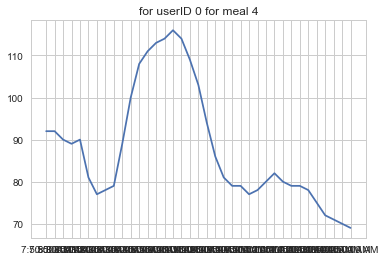

[ 92  92  90  89  90  81  77  78  79  89 100 108 111 113 114 116 114 109
 103  94  86  81  79  79  77  78  80  82  80  79  79  78  75  72  71  70
  69]
               0
7:50:00 AM    92
7:55:00 AM    92
8:00:00 AM    90
8:05:00 AM    89
8:10:00 AM    90
8:15:00 AM    81
8:20:00 AM    77
8:25:00 AM    78
8:30:00 AM    79
8:35:00 AM    89
8:40:00 AM   100
8:45:00 AM   108
8:50:00 AM   111
8:55:00 AM   113
9:00:00 AM   114
9:05:00 AM   116
9:10:00 AM   114
9:15:00 AM   109
9:20:00 AM   103
9:25:00 AM    94
9:30:00 AM    86
9:35:00 AM    81
9:40:00 AM    79
9:45:00 AM    79
9:50:00 AM    77
9:55:00 AM    78
10:00:00 AM   80
10:05:00 AM   82
10:10:00 AM   80
10:15:00 AM   79
10:20:00 AM   79
10:25:00 AM   78
10:30:00 AM   75
10:35:00 AM   72
10:40:00 AM   71
10:45:00 AM   70
10:50:00 AM   69
2133-002 Bar 1


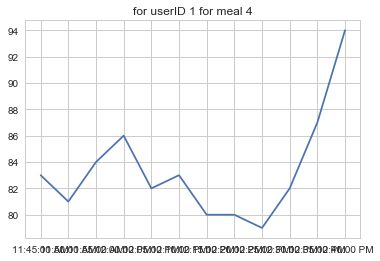

[83 81 84 86 82 83 80 80 79 82 87 94]
              0
11:45:00 AM  83
11:50:00 AM  81
11:55:00 AM  84
12:00:00 PM  86
12:05:00 PM  82
12:10:00 PM  83
12:15:00 PM  80
12:20:00 PM  80
12:25:00 PM  79
12:30:00 PM  82
12:35:00 PM  87
12:40:00 PM  94
2133-004 Bar 1


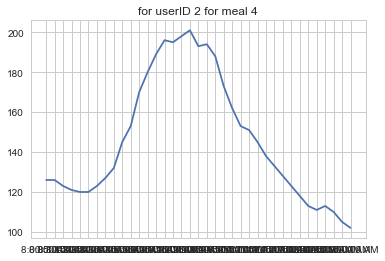

[126 126 123 121 120 120 123 127 132 145 153 170 180 189 196 195 198 201
 193 194 188 173 162 153 151 145 138 133 128 123 118 113 111 113 110 105
 102]
               0
8:00:00 AM   126
8:05:00 AM   126
8:10:00 AM   123
8:15:00 AM   121
8:20:00 AM   120
8:25:00 AM   120
8:30:00 AM   123
8:35:00 AM   127
8:40:00 AM   132
8:45:00 AM   145
8:50:00 AM   153
8:55:00 AM   170
9:00:00 AM   180
9:05:00 AM   189
9:10:00 AM   196
9:15:00 AM   195
9:20:00 AM   198
9:25:00 AM   201
9:30:00 AM   193
9:35:00 AM   194
9:40:00 AM   188
9:45:00 AM   173
9:50:00 AM   162
9:55:00 AM   153
10:00:00 AM  151
10:05:00 AM  145
10:10:00 AM  138
10:15:00 AM  133
10:20:00 AM  128
10:25:00 AM  123
10:30:00 AM  118
10:35:00 AM  113
10:40:00 AM  111
10:45:00 AM  113
10:50:00 AM  110
10:55:00 AM  105
11:00:00 AM  102
2133-006 Bar 1


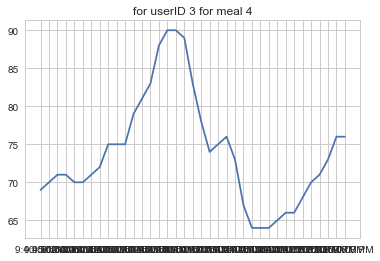

[69 70 71 71 70 70 71 72 75 75 75 79 81 83 88 90 90 89 83 78 74 75 76 73
 67 64 64 64 65 66 66 68 70 71 73 76 76]
              0
9:40:00 AM   69
9:45:00 AM   70
9:50:00 AM   71
9:55:00 AM   71
10:00:00 AM  70
10:05:00 AM  70
10:10:00 AM  71
10:15:00 AM  72
10:20:00 AM  75
10:25:00 AM  75
10:30:00 AM  75
10:35:00 AM  79
10:40:00 AM  81
10:45:00 AM  83
10:50:00 AM  88
10:55:00 AM  90
11:00:00 AM  90
11:05:00 AM  89
11:10:00 AM  83
11:15:00 AM  78
11:20:00 AM  74
11:25:00 AM  75
11:30:00 AM  76
11:35:00 AM  73
11:40:00 AM  67
11:45:00 AM  64
11:50:00 AM  64
11:55:00 AM  64
12:00:00 PM  65
12:05:00 PM  66
12:10:00 PM  66
12:15:00 PM  68
12:20:00 PM  70
12:25:00 PM  71
12:30:00 PM  73
12:35:00 PM  76
12:40:00 PM  76
2133-008 Bar 1


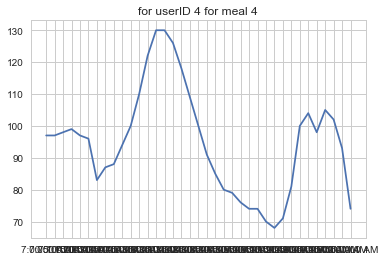

[ 97  97  98  99  97  96  83  87  88  94 100 110 122 130 130 126 118 109
 100  91  85  80  79  76  74  74  70  68  71  81 100 104  98 105 102  93
  74]
               0
7:00:00 AM    97
7:05:00 AM    97
7:10:00 AM    98
7:15:00 AM    99
7:20:00 AM    97
7:25:00 AM    96
7:30:00 AM    83
7:35:00 AM    87
7:40:00 AM    88
7:45:00 AM    94
7:50:00 AM   100
7:55:00 AM   110
8:00:00 AM   122
8:05:00 AM   130
8:10:00 AM   130
8:15:00 AM   126
8:20:00 AM   118
8:25:00 AM   109
8:30:00 AM   100
8:35:00 AM    91
8:40:00 AM    85
8:45:00 AM    80
8:50:00 AM    79
8:55:00 AM    76
9:00:00 AM    74
9:05:00 AM    74
9:10:00 AM    70
9:15:00 AM    68
9:20:00 AM    71
9:25:00 AM    81
9:30:00 AM   100
9:35:00 AM   104
9:40:00 AM    98
9:45:00 AM   105
9:50:00 AM   102
9:55:00 AM    93
10:00:00 AM   74
2133-009 Bar 1


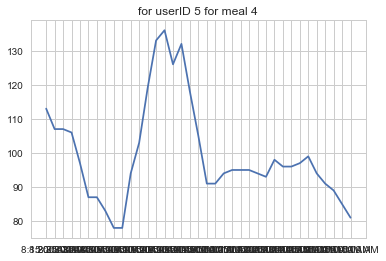

[113 107 107 106  97  87  87  83  78  78  94 103 119 133 136 126 132 118
 105  91  91  94  95  95  95  94  93  98  96  96  97  99  94  91  89  85
  81]
               0
8:15:00 AM   113
8:20:00 AM   107
8:25:00 AM   107
8:30:00 AM   106
8:35:00 AM    97
8:40:00 AM    87
8:45:00 AM    87
8:50:00 AM    83
8:55:00 AM    78
9:00:00 AM    78
9:05:00 AM    94
9:10:00 AM   103
9:15:00 AM   119
9:20:00 AM   133
9:25:00 AM   136
9:30:00 AM   126
9:35:00 AM   132
9:40:00 AM   118
9:45:00 AM   105
9:50:00 AM    91
9:55:00 AM    91
10:00:00 AM   94
10:05:00 AM   95
10:10:00 AM   95
10:15:00 AM   95
10:20:00 AM   94
10:25:00 AM   93
10:30:00 AM   98
10:35:00 AM   96
10:40:00 AM   96
10:45:00 AM   97
10:50:00 AM   99
10:55:00 AM   94
11:00:00 AM   91
11:05:00 AM   89
11:10:00 AM   85
11:15:00 AM   81
2133-010 Bar 1


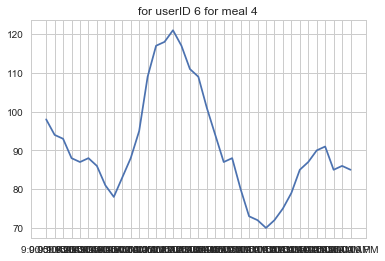

[ 98  94  93  88  87  88  86  81  78  83  88  95 109 117 118 121 117 111
 109 101  94  87  88  80  73  72  70  72  75  79  85  87  90  91  85  86
  85]
               0
9:00:00 AM    98
9:05:00 AM    94
9:10:00 AM    93
9:15:00 AM    88
9:20:00 AM    87
9:25:00 AM    88
9:30:00 AM    86
9:35:00 AM    81
9:40:00 AM    78
9:45:00 AM    83
9:50:00 AM    88
9:55:00 AM    95
10:00:00 AM  109
10:05:00 AM  117
10:10:00 AM  118
10:15:00 AM  121
10:20:00 AM  117
10:25:00 AM  111
10:30:00 AM  109
10:35:00 AM  101
10:40:00 AM   94
10:45:00 AM   87
10:50:00 AM   88
10:55:00 AM   80
11:00:00 AM   73
11:05:00 AM   72
11:10:00 AM   70
11:15:00 AM   72
11:20:00 AM   75
11:25:00 AM   79
11:30:00 AM   85
11:35:00 AM   87
11:40:00 AM   90
11:45:00 AM   91
11:50:00 AM   85
11:55:00 AM   86
12:00:00 PM   85
2133-011 Bar 1


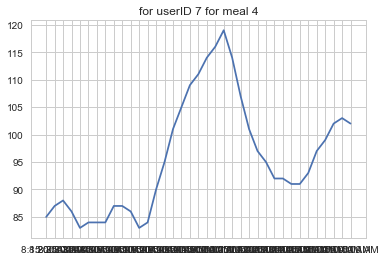

[ 85  87  88  86  83  84  84  84  87  87  86  83  84  90  95 101 105 109
 111 114 116 119 114 107 101  97  95  92  92  91  91  93  97  99 102 103
 102]
               0
8:15:00 AM    85
8:20:00 AM    87
8:25:00 AM    88
8:30:00 AM    86
8:35:00 AM    83
8:40:00 AM    84
8:45:00 AM    84
8:50:00 AM    84
8:55:00 AM    87
9:00:00 AM    87
9:05:00 AM    86
9:10:00 AM    83
9:15:00 AM    84
9:20:00 AM    90
9:25:00 AM    95
9:30:00 AM   101
9:35:00 AM   105
9:40:00 AM   109
9:45:00 AM   111
9:50:00 AM   114
9:55:00 AM   116
10:00:00 AM  119
10:05:00 AM  114
10:10:00 AM  107
10:15:00 AM  101
10:20:00 AM   97
10:25:00 AM   95
10:30:00 AM   92
10:35:00 AM   92
10:40:00 AM   91
10:45:00 AM   91
10:50:00 AM   93
10:55:00 AM   97
11:00:00 AM   99
11:05:00 AM  102
11:10:00 AM  103
11:15:00 AM  102
2133-012 Bar 1


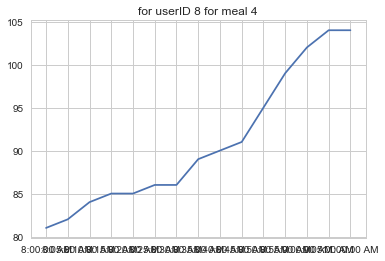

[ 81  82  84  85  85  86  86  89  90  91  95  99 102 104 104]
               0
8:00:00 AM    81
8:05:00 AM    82
8:10:00 AM    84
8:15:00 AM    85
8:20:00 AM    85
8:25:00 AM    86
8:30:00 AM    86
8:35:00 AM    89
8:40:00 AM    90
8:45:00 AM    91
8:50:00 AM    95
8:55:00 AM    99
9:00:00 AM   102
9:05:00 AM   104
11:00:00 AM  104
2133-013 Bar 1


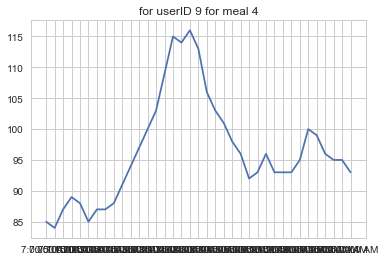

[ 85  84  87  89  88  85  87  87  88  91  94  97 100 103 109 115 114 116
 113 106 103 101  98  96  92  93  96  93  93  93  95 100  99  96  95  95
  93]
               0
7:00:00 AM    85
7:05:00 AM    84
7:10:00 AM    87
7:15:00 AM    89
7:20:00 AM    88
7:25:00 AM    85
7:30:00 AM    87
7:35:00 AM    87
7:40:00 AM    88
7:45:00 AM    91
7:50:00 AM    94
7:55:00 AM    97
8:00:00 AM   100
8:05:00 AM   103
8:10:00 AM   109
8:15:00 AM   115
8:20:00 AM   114
8:25:00 AM   116
8:30:00 AM   113
8:35:00 AM   106
8:40:00 AM   103
8:45:00 AM   101
8:50:00 AM    98
8:55:00 AM    96
9:00:00 AM    92
9:05:00 AM    93
9:10:00 AM    96
9:15:00 AM    93
9:20:00 AM    93
9:25:00 AM    93
9:30:00 AM    95
9:35:00 AM   100
9:40:00 AM    99
9:45:00 AM    96
9:50:00 AM    95
9:55:00 AM    95
10:00:00 AM   93
2133-015 Bar 1


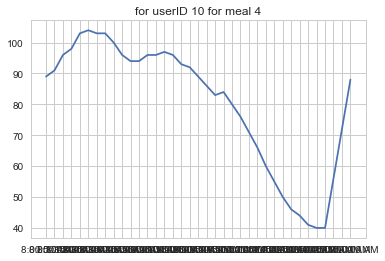

[ 89  91  96  98 103 104 103 103 100  96  94  94  96  96  97  96  93  92
  89  86  83  84  80  76  71  66  60  55  50  46  44  41  40  40  56  72
  88]
               0
8:00:00 AM    89
8:05:00 AM    91
8:10:00 AM    96
8:15:00 AM    98
8:20:00 AM   103
8:25:00 AM   104
8:30:00 AM   103
8:35:00 AM   103
8:40:00 AM   100
8:45:00 AM    96
8:50:00 AM    94
8:55:00 AM    94
9:00:00 AM    96
9:05:00 AM    96
9:10:00 AM    97
9:15:00 AM    96
9:20:00 AM    93
9:25:00 AM    92
9:30:00 AM    89
9:35:00 AM    86
9:40:00 AM    83
9:45:00 AM    84
9:50:00 AM    80
9:55:00 AM    76
10:00:00 AM   71
10:05:00 AM   66
10:10:00 AM   60
10:15:00 AM   55
10:20:00 AM   50
10:25:00 AM   46
10:30:00 AM   44
10:35:00 AM   41
10:40:00 AM   40
10:45:00 AM   40
10:50:00 AM   56
10:55:00 AM   72
11:00:00 AM   88
2133-017 Bar 1


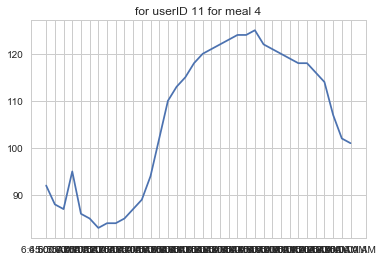

[ 92  88  87  95  86  85  83  84  84  85  87  89  94 102 110 113 115 118
 120 121 122 123 124 124 125 122 121 120 119 118 118 116 114 107 102 101]
              0
6:45:00 AM   92
6:50:00 AM   88
6:55:00 AM   87
7:00:00 AM   95
7:05:00 AM   86
7:10:00 AM   85
7:15:00 AM   83
7:20:00 AM   84
7:25:00 AM   84
7:30:00 AM   85
7:35:00 AM   87
7:40:00 AM   89
7:45:00 AM   94
7:50:00 AM  102
7:55:00 AM  110
8:00:00 AM  113
8:05:00 AM  115
8:10:00 AM  118
8:15:00 AM  120
8:20:00 AM  121
8:25:00 AM  122
8:30:00 AM  123
8:35:00 AM  124
8:40:00 AM  124
8:45:00 AM  125
8:50:00 AM  122
8:55:00 AM  121
9:00:00 AM  120
9:05:00 AM  119
9:10:00 AM  118
9:15:00 AM  118
9:20:00 AM  116
9:25:00 AM  114
9:30:00 AM  107
9:35:00 AM  102
9:40:00 AM  101
2133-018 Bar 1


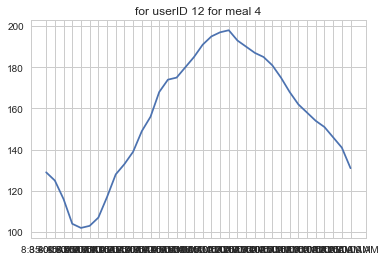

[129 125 116 104 102 103 107 117 128 133 139 149 156 168 174 175 180 185
 191 195 197 198 193 190 187 185 181 175 168 162 158 154 151 146 141 131]
               0
8:35:00 AM   129
8:40:00 AM   125
8:45:00 AM   116
8:50:00 AM   104
8:55:00 AM   102
9:00:00 AM   103
9:05:00 AM   107
9:10:00 AM   117
9:15:00 AM   128
9:20:00 AM   133
9:25:00 AM   139
9:30:00 AM   149
9:35:00 AM   156
9:40:00 AM   168
9:45:00 AM   174
9:50:00 AM   175
9:55:00 AM   180
10:00:00 AM  185
10:05:00 AM  191
10:10:00 AM  195
10:15:00 AM  197
10:20:00 AM  198
10:25:00 AM  193
10:30:00 AM  190
10:35:00 AM  187
10:40:00 AM  185
10:45:00 AM  181
10:50:00 AM  175
10:55:00 AM  168
11:00:00 AM  162
11:05:00 AM  158
11:10:00 AM  154
11:15:00 AM  151
11:20:00 AM  146
11:25:00 AM  141
11:30:00 AM  131
2133-019 Bar 1


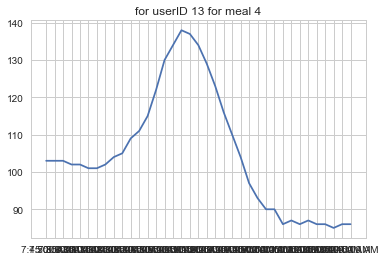

[103 103 103 102 102 101 101 102 104 105 109 111 115 122 130 134 138 137
 134 129 123 116 110 104  97  93  90  90  86  87  86  87  86  86  85  86
  86]
               0
7:45:00 AM   103
7:50:00 AM   103
7:55:00 AM   103
8:00:00 AM   102
8:05:00 AM   102
8:10:00 AM   101
8:15:00 AM   101
8:20:00 AM   102
8:25:00 AM   104
8:30:00 AM   105
8:35:00 AM   109
8:40:00 AM   111
8:45:00 AM   115
8:50:00 AM   122
8:55:00 AM   130
9:00:00 AM   134
9:05:00 AM   138
9:10:00 AM   137
9:15:00 AM   134
9:20:00 AM   129
9:25:00 AM   123
9:30:00 AM   116
9:35:00 AM   110
9:40:00 AM   104
9:45:00 AM    97
9:50:00 AM    93
9:55:00 AM    90
10:00:00 AM   90
10:05:00 AM   86
10:10:00 AM   87
10:15:00 AM   86
10:20:00 AM   87
10:25:00 AM   86
10:30:00 AM   86
10:35:00 AM   85
10:40:00 AM   86
10:45:00 AM   86
2133-020 Bar 1


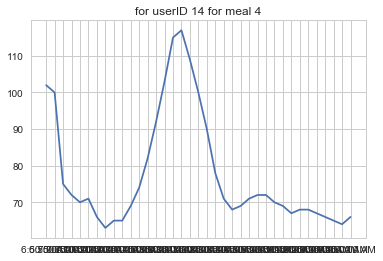

[102 100  75  72  70  71  66  63  65  65  69  74  82  92 103 115 117 109
 100  90  78  71  68  69  71  72  72  70  69  67  68  68  67  66  65  64
  66]
              0
6:50:00 AM  102
6:55:00 AM  100
7:00:00 AM   75
7:05:00 AM   72
7:10:00 AM   70
7:15:00 AM   71
7:20:00 AM   66
7:25:00 AM   63
7:30:00 AM   65
7:35:00 AM   65
7:40:00 AM   69
7:45:00 AM   74
7:50:00 AM   82
7:55:00 AM   92
8:00:00 AM  103
8:05:00 AM  115
8:10:00 AM  117
8:15:00 AM  109
8:20:00 AM  100
8:25:00 AM   90
8:30:00 AM   78
8:35:00 AM   71
8:40:00 AM   68
8:45:00 AM   69
8:50:00 AM   71
8:55:00 AM   72
9:00:00 AM   72
9:05:00 AM   70
9:10:00 AM   69
9:15:00 AM   67
9:20:00 AM   68
9:25:00 AM   68
9:30:00 AM   67
9:35:00 AM   66
9:40:00 AM   65
9:45:00 AM   64
9:50:00 AM   66
2133-021 Bar 1


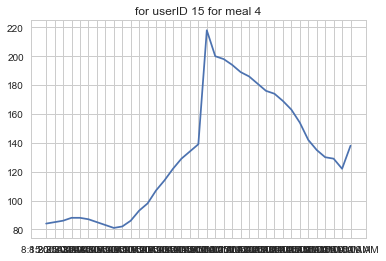

[ 84  85  86  88  88  87  85  83  81  82  86  93  98 107 114 122 129 134
 139 218 200 198 194 189 186 181 176 174 169 163 154 142 135 130 129 122
 138]
               0
8:15:00 AM    84
8:20:00 AM    85
8:25:00 AM    86
8:30:00 AM    88
8:35:00 AM    88
8:40:00 AM    87
8:45:00 AM    85
8:50:00 AM    83
8:55:00 AM    81
9:00:00 AM    82
9:05:00 AM    86
9:10:00 AM    93
9:15:00 AM    98
9:20:00 AM   107
9:25:00 AM   114
9:30:00 AM   122
9:35:00 AM   129
9:40:00 AM   134
9:45:00 AM   139
9:50:00 AM   218
9:55:00 AM   200
10:00:00 AM  198
10:05:00 AM  194
10:10:00 AM  189
10:15:00 AM  186
10:20:00 AM  181
10:25:00 AM  176
10:30:00 AM  174
10:35:00 AM  169
10:40:00 AM  163
10:45:00 AM  154
10:50:00 AM  142
10:55:00 AM  135
11:00:00 AM  130
11:05:00 AM  129
11:10:00 AM  122
11:15:00 AM  138
2133-022 Bar 1


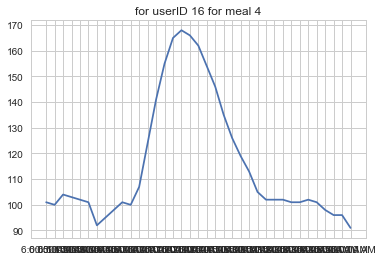

[101 100 104 103 102 101  92  95  98 101 100 107 124 141 155 165 168 166
 162 154 146 135 126 119 113 105 102 102 102 101 101 102 101  98  96  96
  91]
              0
6:00:00 AM  101
6:05:00 AM  100
6:10:00 AM  104
6:15:00 AM  103
6:20:00 AM  102
6:25:00 AM  101
6:30:00 AM   92
6:35:00 AM   95
6:40:00 AM   98
6:45:00 AM  101
6:50:00 AM  100
6:55:00 AM  107
7:00:00 AM  124
7:05:00 AM  141
7:10:00 AM  155
7:15:00 AM  165
7:20:00 AM  168
7:25:00 AM  166
7:30:00 AM  162
7:35:00 AM  154
7:40:00 AM  146
7:45:00 AM  135
7:50:00 AM  126
7:55:00 AM  119
8:00:00 AM  113
8:05:00 AM  105
8:10:00 AM  102
8:15:00 AM  102
8:20:00 AM  102
8:25:00 AM  101
8:30:00 AM  101
8:35:00 AM  102
8:40:00 AM  101
8:45:00 AM   98
8:50:00 AM   96
8:55:00 AM   96
9:00:00 AM   91
2133-024 Bar 1


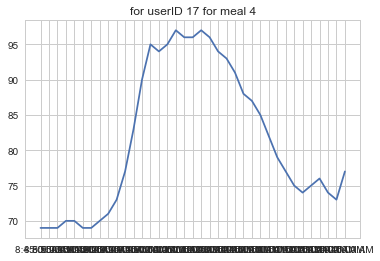

[69 69 69 70 70 69 69 70 71 73 77 83 90 95 94 95 97 96 96 97 96 94 93 91
 88 87 85 82 79 77 75 74 75 76 74 73 77]
              0
8:45:00 AM   69
8:50:00 AM   69
8:55:00 AM   69
9:00:00 AM   70
9:05:00 AM   70
9:10:00 AM   69
9:15:00 AM   69
9:20:00 AM   70
9:25:00 AM   71
9:30:00 AM   73
9:35:00 AM   77
9:40:00 AM   83
9:45:00 AM   90
9:50:00 AM   95
9:55:00 AM   94
10:00:00 AM  95
10:05:00 AM  97
10:10:00 AM  96
10:15:00 AM  96
10:20:00 AM  97
10:25:00 AM  96
10:30:00 AM  94
10:35:00 AM  93
10:40:00 AM  91
10:45:00 AM  88
10:50:00 AM  87
10:55:00 AM  85
11:00:00 AM  82
11:05:00 AM  79
11:10:00 AM  77
11:15:00 AM  75
11:20:00 AM  74
11:25:00 AM  75
11:30:00 AM  76
11:35:00 AM  74
11:40:00 AM  73
11:45:00 AM  77
2133-025 Bar 1


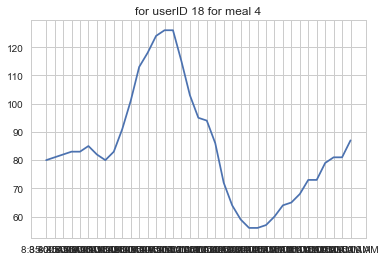

[ 80  81  82  83  83  85  82  80  83  91 101 113 118 124 126 126 115 103
  95  94  86  72  64  59  56  56  57  60  64  65  68  73  73  79  81  81
  87]
               0
8:35:00 AM    80
8:40:00 AM    81
8:45:00 AM    82
8:50:00 AM    83
8:55:00 AM    83
9:00:00 AM    85
9:05:00 AM    82
9:10:00 AM    80
9:15:00 AM    83
9:20:00 AM    91
9:25:00 AM   101
9:30:00 AM   113
9:35:00 AM   118
9:40:00 AM   124
9:45:00 AM   126
9:50:00 AM   126
9:55:00 AM   115
10:00:00 AM  103
10:05:00 AM   95
10:10:00 AM   94
10:15:00 AM   86
10:20:00 AM   72
10:25:00 AM   64
10:30:00 AM   59
10:35:00 AM   56
10:40:00 AM   56
10:45:00 AM   57
10:50:00 AM   60
10:55:00 AM   64
11:00:00 AM   65
11:05:00 AM   68
11:10:00 AM   73
11:15:00 AM   73
11:20:00 AM   79
11:25:00 AM   81
11:30:00 AM   81
11:35:00 AM   87
2133-026 Bar 1


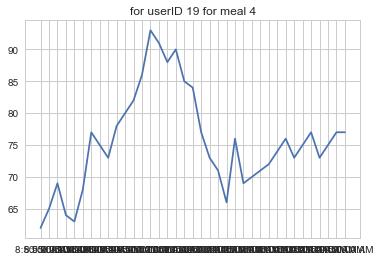

[62 65 69 64 63 68 77 75 73 78 80 82 86 93 91 88 90 85 84 77 73 71 66 76
 69 70 71 72 74 76 73 75 77 73 75 77 77]
              0
8:50:00 AM   62
8:55:00 AM   65
9:00:00 AM   69
9:05:00 AM   64
9:10:00 AM   63
9:15:00 AM   68
9:20:00 AM   77
9:25:00 AM   75
9:30:00 AM   73
9:35:00 AM   78
9:40:00 AM   80
9:45:00 AM   82
9:50:00 AM   86
9:55:00 AM   93
10:00:00 AM  91
10:05:00 AM  88
10:10:00 AM  90
10:15:00 AM  85
10:20:00 AM  84
10:25:00 AM  77
10:30:00 AM  73
10:35:00 AM  71
10:40:00 AM  66
10:45:00 AM  76
10:50:00 AM  69
10:55:00 AM  70
11:00:00 AM  71
11:05:00 AM  72
11:10:00 AM  74
11:15:00 AM  76
11:20:00 AM  73
11:25:00 AM  75
11:30:00 AM  77
11:35:00 AM  73
11:40:00 AM  75
11:45:00 AM  77
11:50:00 AM  77
2133-028 Bar 1


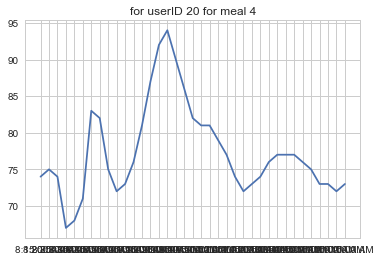

[74 75 74 67 68 71 83 82 75 72 73 76 81 87 92 94 90 86 82 81 81 79 77 74
 72 73 74 76 77 77 77 76 75 73 73 72 73]
              0
8:15:00 AM   74
8:20:00 AM   75
8:25:00 AM   74
8:30:00 AM   67
8:35:00 AM   68
8:40:00 AM   71
8:45:00 AM   83
8:50:00 AM   82
8:55:00 AM   75
9:00:00 AM   72
9:05:00 AM   73
9:10:00 AM   76
9:15:00 AM   81
9:20:00 AM   87
9:25:00 AM   92
9:30:00 AM   94
9:35:00 AM   90
9:40:00 AM   86
9:45:00 AM   82
9:50:00 AM   81
9:55:00 AM   81
10:00:00 AM  79
10:05:00 AM  77
10:10:00 AM  74
10:15:00 AM  72
10:20:00 AM  73
10:25:00 AM  74
10:30:00 AM  76
10:35:00 AM  77
10:40:00 AM  77
10:45:00 AM  77
10:50:00 AM  76
10:55:00 AM  75
11:00:00 AM  73
11:05:00 AM  73
11:10:00 AM  72
11:15:00 AM  73
2133-030 Bar 1


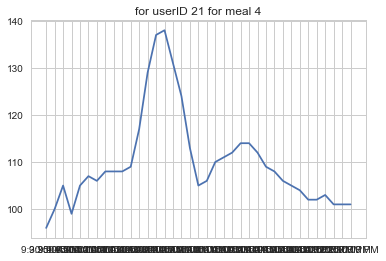

[ 96 100 105  99 105 107 106 108 108 108 109 117 129 137 138 131 124 113
 105 106 110 111 112 114 114 112 109 108 106 105 104 102 102 103 101 101
 101]
               0
9:30:00 AM    96
9:35:00 AM   100
9:40:00 AM   105
9:45:00 AM    99
9:50:00 AM   105
9:55:00 AM   107
10:00:00 AM  106
10:05:00 AM  108
10:10:00 AM  108
10:15:00 AM  108
10:20:00 AM  109
10:25:00 AM  117
10:30:00 AM  129
10:35:00 AM  137
10:40:00 AM  138
10:45:00 AM  131
10:50:00 AM  124
10:55:00 AM  113
11:00:00 AM  105
11:05:00 AM  106
11:10:00 AM  110
11:15:00 AM  111
11:20:00 AM  112
11:25:00 AM  114
11:30:00 AM  114
11:35:00 AM  112
11:40:00 AM  109
11:45:00 AM  108
11:50:00 AM  106
11:55:00 AM  105
12:00:00 PM  104
12:05:00 PM  102
12:10:00 PM  102
12:15:00 PM  103
12:20:00 PM  101
12:25:00 PM  101
12:30:00 PM  101
2133-032 Bar 1


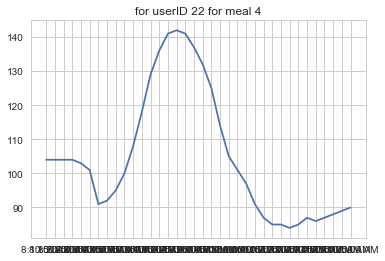

[104 104 104 104 103 101  91  92  95 100 108 118 129 136 141 142 141 137
 132 125 114 105 101  97  91  87  85  85  84  85  87  86  87  88  89  90]
               0
8:10:00 AM   104
8:15:00 AM   104
8:20:00 AM   104
8:25:00 AM   104
8:30:00 AM   103
8:35:00 AM   101
8:40:00 AM    91
8:45:00 AM    92
8:50:00 AM    95
8:55:00 AM   100
9:00:00 AM   108
9:05:00 AM   118
9:10:00 AM   129
9:15:00 AM   136
9:20:00 AM   141
9:25:00 AM   142
9:30:00 AM   141
9:35:00 AM   137
9:40:00 AM   132
9:45:00 AM   125
9:50:00 AM   114
9:55:00 AM   105
10:00:00 AM  101
10:05:00 AM   97
10:10:00 AM   91
10:15:00 AM   87
10:20:00 AM   85
10:25:00 AM   85
10:30:00 AM   84
10:35:00 AM   85
10:40:00 AM   87
10:45:00 AM   86
10:50:00 AM   87
10:55:00 AM   88
11:00:00 AM   89
11:05:00 AM   90
2133-033 Bar 1


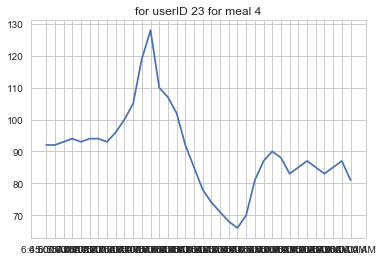

[ 92  92  93  94  93  94  94  93  96 100 105 119 128 110 107 102  92  85
  78  74  71  68  66  70  81  87  90  88  83  85  87  85  83  85  87  81]
              0
6:45:00 AM   92
6:50:00 AM   92
6:55:00 AM   93
7:00:00 AM   94
7:05:00 AM   93
7:10:00 AM   94
7:15:00 AM   94
7:20:00 AM   93
7:25:00 AM   96
7:30:00 AM  100
7:35:00 AM  105
7:40:00 AM  119
7:45:00 AM  128
7:50:00 AM  110
7:55:00 AM  107
8:00:00 AM  102
8:05:00 AM   92
8:10:00 AM   85
8:15:00 AM   78
8:20:00 AM   74
8:25:00 AM   71
8:30:00 AM   68
8:35:00 AM   66
8:40:00 AM   70
8:45:00 AM   81
8:50:00 AM   87
8:55:00 AM   90
9:00:00 AM   88
9:05:00 AM   83
9:10:00 AM   85
9:15:00 AM   87
9:20:00 AM   85
9:25:00 AM   83
9:30:00 AM   85
9:35:00 AM   87
9:40:00 AM   81
2133-035 Bar 1


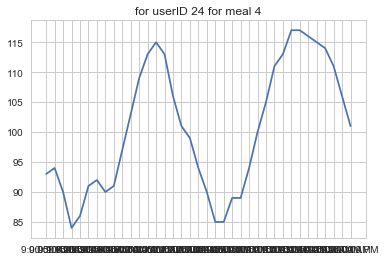

[ 93  94  90  84  86  91  92  90  91  97 103 109 113 115 113 106 101  99
  94  90  85  85  89  89  94 100 105 111 113 117 117 116 115 114 111 106
 101]
               0
9:00:00 AM    93
9:05:00 AM    94
9:10:00 AM    90
9:15:00 AM    84
9:20:00 AM    86
9:25:00 AM    91
9:30:00 AM    92
9:35:00 AM    90
9:40:00 AM    91
9:45:00 AM    97
9:50:00 AM   103
9:55:00 AM   109
10:00:00 AM  113
10:05:00 AM  115
10:10:00 AM  113
10:15:00 AM  106
10:20:00 AM  101
10:25:00 AM   99
10:30:00 AM   94
10:35:00 AM   90
10:40:00 AM   85
10:45:00 AM   85
10:50:00 AM   89
10:55:00 AM   89
11:00:00 AM   94
11:05:00 AM  100
11:10:00 AM  105
11:15:00 AM  111
11:20:00 AM  113
11:25:00 AM  117
11:30:00 AM  117
11:35:00 AM  116
11:40:00 AM  115
11:45:00 AM  114
11:50:00 AM  111
11:55:00 AM  106
12:00:00 PM  101
2133-036 Bar 1


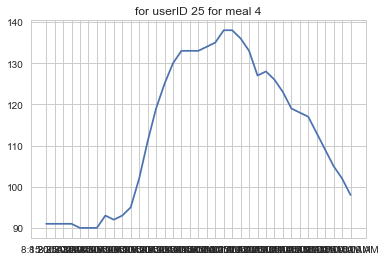

[ 91  91  91  91  90  90  90  93  92  93  95 102 111 119 125 130 133 133
 133 134 135 138 138 136 133 127 128 126 123 119 118 117 113 109 105 102
  98]
               0
8:15:00 AM    91
8:20:00 AM    91
8:25:00 AM    91
8:30:00 AM    91
8:35:00 AM    90
8:40:00 AM    90
8:45:00 AM    90
8:50:00 AM    93
8:55:00 AM    92
9:00:00 AM    93
9:05:00 AM    95
9:10:00 AM   102
9:15:00 AM   111
9:20:00 AM   119
9:25:00 AM   125
9:30:00 AM   130
9:35:00 AM   133
9:40:00 AM   133
9:45:00 AM   133
9:50:00 AM   134
9:55:00 AM   135
10:00:00 AM  138
10:05:00 AM  138
10:10:00 AM  136
10:15:00 AM  133
10:20:00 AM  127
10:25:00 AM  128
10:30:00 AM  126
10:35:00 AM  123
10:40:00 AM  119
10:45:00 AM  118
10:50:00 AM  117
10:55:00 AM  113
11:00:00 AM  109
11:05:00 AM  105
11:10:00 AM  102
11:15:00 AM   98
2133-037 Bar 1


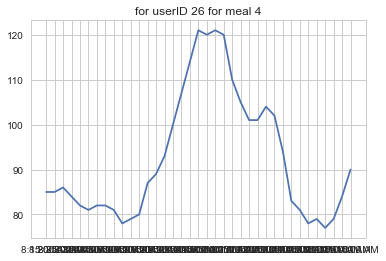

[ 85  85  86  84  82  81  82  82  81  78  79  80  87  89  93 100 107 114
 121 120 121 120 110 105 101 101 104 102  94  83  81  78  79  77  79  84
  90]
               0
8:15:00 AM    85
8:20:00 AM    85
8:25:00 AM    86
8:30:00 AM    84
8:35:00 AM    82
8:40:00 AM    81
8:45:00 AM    82
8:50:00 AM    82
8:55:00 AM    81
9:00:00 AM    78
9:05:00 AM    79
9:10:00 AM    80
9:15:00 AM    87
9:20:00 AM    89
9:25:00 AM    93
9:30:00 AM   100
9:35:00 AM   107
9:40:00 AM   114
9:45:00 AM   121
9:50:00 AM   120
9:55:00 AM   121
10:00:00 AM  120
10:05:00 AM  110
10:10:00 AM  105
10:15:00 AM  101
10:20:00 AM  101
10:25:00 AM  104
10:30:00 AM  102
10:35:00 AM   94
10:40:00 AM   83
10:45:00 AM   81
10:50:00 AM   78
10:55:00 AM   79
11:00:00 AM   77
11:05:00 AM   79
11:10:00 AM   84
11:15:00 AM   90
2133-039 Bar 1


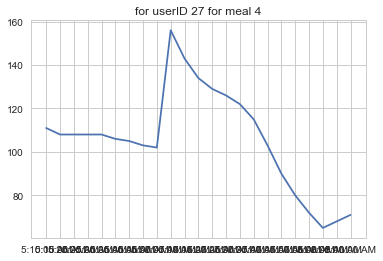

[111 108 108 108 108 106 105 103 102 156 143 134 129 126 122 115 103  90
  80  72  65  68  71]
              0
5:10:00 AM  111
5:15:00 AM  108
5:20:00 AM  108
5:25:00 AM  108
5:30:00 AM  108
5:35:00 AM  106
5:40:00 AM  105
5:45:00 AM  103
5:50:00 AM  102
7:05:00 AM  156
7:10:00 AM  143
7:15:00 AM  134
7:20:00 AM  129
7:25:00 AM  126
7:30:00 AM  122
7:35:00 AM  115
7:40:00 AM  103
7:45:00 AM   90
7:50:00 AM   80
7:55:00 AM   72
8:00:00 AM   65
8:05:00 AM   68
8:10:00 AM   71
2133-040 Bar 1


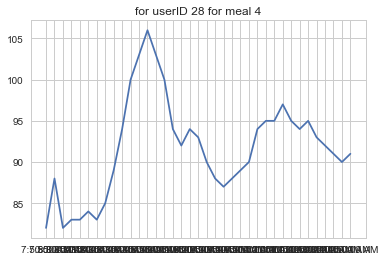

[ 82  88  82  83  83  84  83  85  89  94 100 103 106 103 100  94  92  94
  93  90  88  87  88  89  90  94  95  95  97  95  94  95  93  92  91  90
  91]
               0
7:50:00 AM    82
7:55:00 AM    88
8:00:00 AM    82
8:05:00 AM    83
8:10:00 AM    83
8:15:00 AM    84
8:20:00 AM    83
8:25:00 AM    85
8:30:00 AM    89
8:35:00 AM    94
8:40:00 AM   100
8:45:00 AM   103
8:50:00 AM   106
8:55:00 AM   103
9:00:00 AM   100
9:05:00 AM    94
9:10:00 AM    92
9:15:00 AM    94
9:20:00 AM    93
9:25:00 AM    90
9:30:00 AM    88
9:35:00 AM    87
9:40:00 AM    88
9:45:00 AM    89
9:50:00 AM    90
9:55:00 AM    94
10:00:00 AM   95
10:05:00 AM   95
10:10:00 AM   97
10:15:00 AM   95
10:20:00 AM   94
10:25:00 AM   95
10:30:00 AM   93
10:35:00 AM   92
10:40:00 AM   91
10:45:00 AM   90
10:50:00 AM   91
2133-041 Bar 1


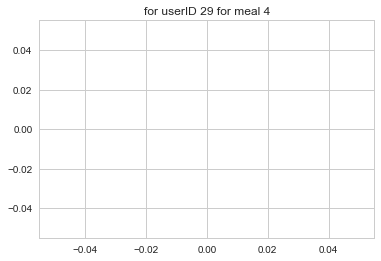

[]
Empty DataFrame
Columns: [0]
Index: []
2133-001 Bar 2


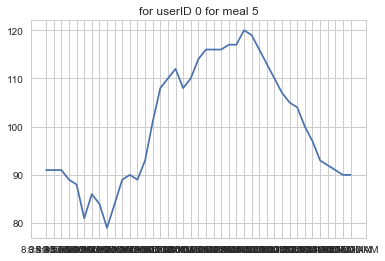

[ 91  91  91  89  88  81  86  84  79  84  89  90  89  93 101 108 110 112
 108 110 114 116 116 116 117 117 120 119 116 113 110 107 105 104 100  97
  93  92  91  90  90]
               0
8:35:00 AM    91
8:40:00 AM    91
8:45:00 AM    91
8:50:00 AM    89
8:55:00 AM    88
9:00:00 AM    81
9:05:00 AM    86
9:10:00 AM    84
9:15:00 AM    79
9:20:00 AM    84
9:25:00 AM    89
9:30:00 AM    90
9:35:00 AM    89
9:40:00 AM    93
9:45:00 AM   101
9:50:00 AM   108
9:55:00 AM   110
10:00:00 AM  112
10:05:00 AM  108
10:10:00 AM  110
10:15:00 AM  114
10:20:00 AM  116
10:25:00 AM  116
10:30:00 AM  116
10:35:00 AM  117
10:40:00 AM  117
10:45:00 AM  120
10:50:00 AM  119
10:55:00 AM  116
11:00:00 AM  113
11:05:00 AM  110
11:10:00 AM  107
11:15:00 AM  105
11:20:00 AM  104
11:25:00 AM  100
11:30:00 AM   97
11:35:00 AM   93
11:40:00 AM   92
11:45:00 AM   91
11:50:00 AM   90
11:55:00 AM   90
2133-002 Bar 2


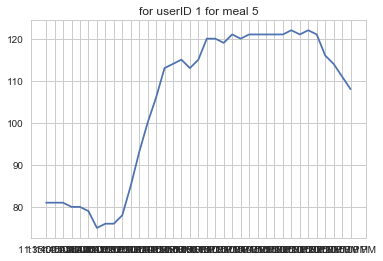

[ 81  81  81  80  80  79  75  76  76  78  85  93 100 106 113 114 115 113
 115 120 120 119 121 120 121 121 121 121 121 122 121 122 121 116 114 111
 108]
               0
11:35:00 AM   81
11:40:00 AM   81
11:45:00 AM   81
11:50:00 AM   80
11:55:00 AM   80
12:00:00 PM   79
12:05:00 PM   75
12:10:00 PM   76
12:15:00 PM   76
12:20:00 PM   78
12:25:00 PM   85
12:30:00 PM   93
12:35:00 PM  100
12:40:00 PM  106
12:45:00 PM  113
12:50:00 PM  114
12:55:00 PM  115
1:00:00 PM   113
1:05:00 PM   115
1:10:00 PM   120
1:15:00 PM   120
1:20:00 PM   119
1:25:00 PM   121
1:30:00 PM   120
1:35:00 PM   121
1:40:00 PM   121
1:45:00 PM   121
1:50:00 PM   121
1:55:00 PM   121
2:00:00 PM   122
2:05:00 PM   121
2:10:00 PM   122
2:15:00 PM   121
2:20:00 PM   116
2:25:00 PM   114
2:30:00 PM   111
2:35:00 PM   108
2133-004 Bar 2


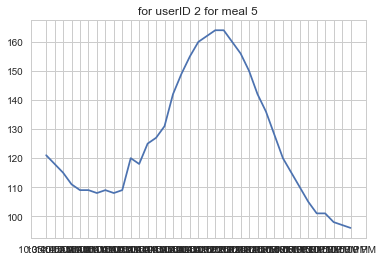

[121 118 115 111 109 109 108 109 108 109 120 118 125 127 131 142 149 155
 160 162 164 164 160 156 150 142 136 128 120 115 110 105 101 101  98  97
  96]
               0
10:35:00 AM  121
10:40:00 AM  118
10:45:00 AM  115
10:50:00 AM  111
10:55:00 AM  109
11:00:00 AM  109
11:05:00 AM  108
11:10:00 AM  109
11:15:00 AM  108
11:20:00 AM  109
11:25:00 AM  120
11:30:00 AM  118
11:35:00 AM  125
11:40:00 AM  127
11:45:00 AM  131
11:50:00 AM  142
11:55:00 AM  149
12:00:00 PM  155
12:05:00 PM  160
12:10:00 PM  162
12:15:00 PM  164
12:20:00 PM  164
12:25:00 PM  160
12:30:00 PM  156
12:35:00 PM  150
12:40:00 PM  142
12:45:00 PM  136
12:50:00 PM  128
12:55:00 PM  120
1:00:00 PM   115
1:05:00 PM   110
1:10:00 PM   105
1:15:00 PM   101
1:20:00 PM   101
1:25:00 PM    98
1:30:00 PM    97
1:35:00 PM    96
2133-006 Bar 2


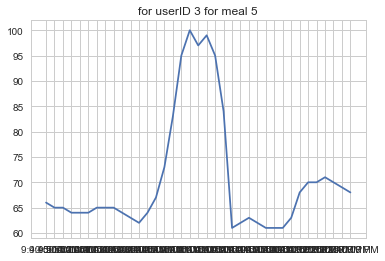

[ 66  65  65  64  64  64  65  65  65  64  63  62  64  67  73  83  95 100
  97  99  95  84  61  62  63  62  61  61  61  63  68  70  70  71  70  69
  68]
               0
9:40:00 AM    66
9:45:00 AM    65
9:50:00 AM    65
9:55:00 AM    64
10:00:00 AM   64
10:05:00 AM   64
10:10:00 AM   65
10:15:00 AM   65
10:20:00 AM   65
10:25:00 AM   64
10:30:00 AM   63
10:35:00 AM   62
10:40:00 AM   64
10:45:00 AM   67
10:50:00 AM   73
10:55:00 AM   83
11:00:00 AM   95
11:05:00 AM  100
11:10:00 AM   97
11:15:00 AM   99
11:20:00 AM   95
11:25:00 AM   84
11:30:00 AM   61
11:35:00 AM   62
11:40:00 AM   63
11:45:00 AM   62
11:50:00 AM   61
11:55:00 AM   61
12:00:00 PM   61
12:05:00 PM   63
12:10:00 PM   68
12:15:00 PM   70
12:20:00 PM   70
12:25:00 PM   71
12:30:00 PM   70
12:35:00 PM   69
12:40:00 PM   68
2133-008 Bar 2


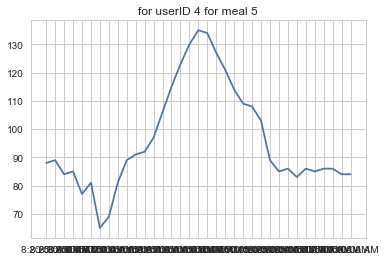

[ 88  89  84  85  77  81  65  69  81  89  91  92  97 106 115 123 130 135
 134 127 121 114 109 108 103  89  85  86  83  86  85  86  86  84  84]
               0
8:20:00 AM    88
8:25:00 AM    89
8:30:00 AM    84
8:35:00 AM    85
8:40:00 AM    77
8:45:00 AM    81
8:50:00 AM    65
8:55:00 AM    69
9:00:00 AM    81
9:05:00 AM    89
9:10:00 AM    91
9:15:00 AM    92
9:20:00 AM    97
9:25:00 AM   106
9:30:00 AM   115
9:35:00 AM   123
9:40:00 AM   130
9:45:00 AM   135
9:50:00 AM   134
9:55:00 AM   127
10:00:00 AM  121
10:05:00 AM  114
10:10:00 AM  109
10:15:00 AM  108
10:20:00 AM  103
10:25:00 AM   89
10:30:00 AM   85
10:35:00 AM   86
10:40:00 AM   83
10:45:00 AM   86
10:50:00 AM   85
10:55:00 AM   86
11:00:00 AM   86
11:05:00 AM   84
11:10:00 AM   84
2133-009 Bar 2


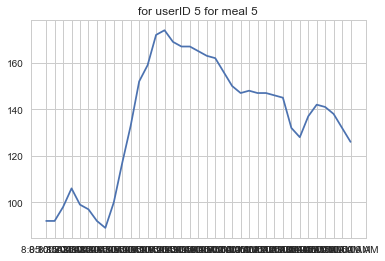

[ 92  92  98 106  99  97  92  89 100 117 133 152 159 172 174 169 167 167
 165 163 162 156 150 147 148 147 147 146 145 132 128 137 142 141 138 132
 126]
               0
8:05:00 AM    92
8:10:00 AM    92
8:15:00 AM    98
8:20:00 AM   106
8:25:00 AM    99
8:30:00 AM    97
8:35:00 AM    92
8:40:00 AM    89
8:45:00 AM   100
8:50:00 AM   117
8:55:00 AM   133
9:00:00 AM   152
9:05:00 AM   159
9:10:00 AM   172
9:15:00 AM   174
9:20:00 AM   169
9:25:00 AM   167
9:30:00 AM   167
9:35:00 AM   165
9:40:00 AM   163
9:45:00 AM   162
9:50:00 AM   156
9:55:00 AM   150
10:00:00 AM  147
10:05:00 AM  148
10:10:00 AM  147
10:15:00 AM  147
10:20:00 AM  146
10:25:00 AM  145
10:30:00 AM  132
10:35:00 AM  128
10:40:00 AM  137
10:45:00 AM  142
10:50:00 AM  141
10:55:00 AM  138
11:00:00 AM  132
11:05:00 AM  126
2133-010 Bar 2


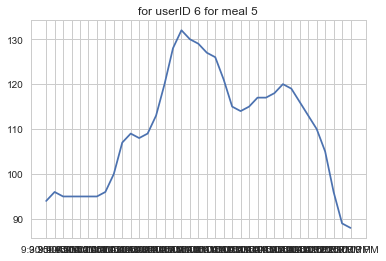

[ 94  96  95  95  95  95  95  96 100 107 109 108 109 113 120 128 132 130
 129 127 126 121 115 114 115 117 117 118 120 119 116 113 110 105  96  89
  88]
               0
9:30:00 AM    94
9:35:00 AM    96
9:40:00 AM    95
9:45:00 AM    95
9:50:00 AM    95
9:55:00 AM    95
10:00:00 AM   95
10:05:00 AM   96
10:10:00 AM  100
10:15:00 AM  107
10:20:00 AM  109
10:25:00 AM  108
10:30:00 AM  109
10:35:00 AM  113
10:40:00 AM  120
10:45:00 AM  128
10:50:00 AM  132
10:55:00 AM  130
11:00:00 AM  129
11:05:00 AM  127
11:10:00 AM  126
11:15:00 AM  121
11:20:00 AM  115
11:25:00 AM  114
11:30:00 AM  115
11:35:00 AM  117
11:40:00 AM  117
11:45:00 AM  118
11:50:00 AM  120
11:55:00 AM  119
12:00:00 PM  116
12:05:00 PM  113
12:10:00 PM  110
12:15:00 PM  105
12:20:00 PM   96
12:25:00 PM   89
12:30:00 PM   88
2133-011 Bar 2


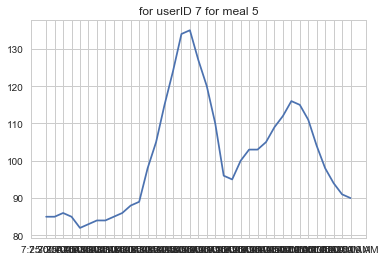

[ 85  85  86  85  82  83  84  84  85  86  88  89  98 105 115 124 134 135
 127 120 110  96  95 100 103 103 105 109 112 116 115 111 104  98  94  91
  90]
               0
7:25:00 AM    85
7:30:00 AM    85
7:35:00 AM    86
7:40:00 AM    85
7:45:00 AM    82
7:50:00 AM    83
7:55:00 AM    84
8:00:00 AM    84
8:05:00 AM    85
8:10:00 AM    86
8:15:00 AM    88
8:20:00 AM    89
8:25:00 AM    98
8:30:00 AM   105
8:35:00 AM   115
8:40:00 AM   124
8:45:00 AM   134
8:50:00 AM   135
8:55:00 AM   127
9:00:00 AM   120
9:05:00 AM   110
9:10:00 AM    96
9:15:00 AM    95
9:20:00 AM   100
9:25:00 AM   103
9:30:00 AM   103
9:35:00 AM   105
9:40:00 AM   109
9:45:00 AM   112
9:50:00 AM   116
9:55:00 AM   115
10:00:00 AM  111
10:05:00 AM  104
10:10:00 AM   98
10:15:00 AM   94
10:20:00 AM   91
10:25:00 AM   90
2133-012 Bar 2


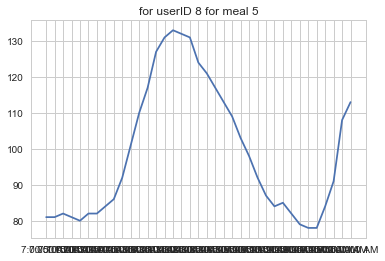

[ 81  81  82  81  80  82  82  84  86  92 101 110 117 127 131 133 132 131
 124 121 117 113 109 103  98  92  87  84  85  82  79  78  78  84  91 108
 113]
               0
7:00:00 AM    81
7:05:00 AM    81
7:10:00 AM    82
7:15:00 AM    81
7:20:00 AM    80
7:25:00 AM    82
7:30:00 AM    82
7:35:00 AM    84
7:40:00 AM    86
7:45:00 AM    92
7:50:00 AM   101
7:55:00 AM   110
8:00:00 AM   117
8:05:00 AM   127
8:10:00 AM   131
8:15:00 AM   133
8:20:00 AM   132
8:25:00 AM   131
8:30:00 AM   124
8:35:00 AM   121
8:40:00 AM   117
8:45:00 AM   113
8:50:00 AM   109
8:55:00 AM   103
9:00:00 AM    98
9:05:00 AM    92
9:10:00 AM    87
9:15:00 AM    84
9:20:00 AM    85
9:25:00 AM    82
9:30:00 AM    79
9:35:00 AM    78
9:40:00 AM    78
9:45:00 AM    84
9:50:00 AM    91
9:55:00 AM   108
10:00:00 AM  113
2133-013 Bar 2


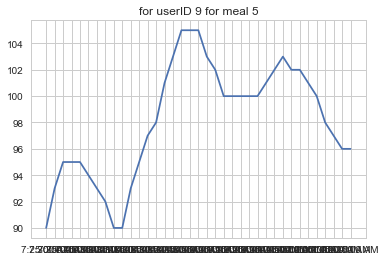

[ 90  93  95  95  95  94  93  92  90  90  93  95  97  98 101 103 105 105
 105 103 102 100 100 100 100 100 101 102 103 102 102 101 100  98  97  96
  96]
               0
7:25:00 AM    90
7:30:00 AM    93
7:35:00 AM    95
7:40:00 AM    95
7:45:00 AM    95
7:50:00 AM    94
7:55:00 AM    93
8:00:00 AM    92
8:05:00 AM    90
8:10:00 AM    90
8:15:00 AM    93
8:20:00 AM    95
8:25:00 AM    97
8:30:00 AM    98
8:35:00 AM   101
8:40:00 AM   103
8:45:00 AM   105
8:50:00 AM   105
8:55:00 AM   105
9:00:00 AM   103
9:05:00 AM   102
9:10:00 AM   100
9:15:00 AM   100
9:20:00 AM   100
9:25:00 AM   100
9:30:00 AM   100
9:35:00 AM   101
9:40:00 AM   102
9:45:00 AM   103
9:50:00 AM   102
9:55:00 AM   102
10:00:00 AM  101
10:05:00 AM  100
10:10:00 AM   98
10:15:00 AM   97
10:20:00 AM   96
10:25:00 AM   96
2133-015 Bar 2


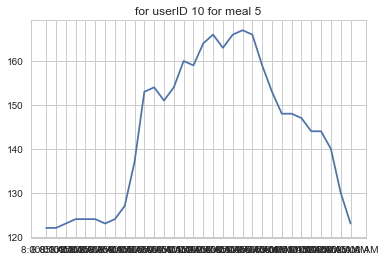

[122 122 123 124 124 124 123 124 127 137 153 154 151 154 160 159 164 166
 163 166 167 166 159 153 148 148 147 144 144 140 130 123]
               0
8:00:00 AM   122
8:05:00 AM   122
8:10:00 AM   123
8:15:00 AM   124
8:20:00 AM   124
8:25:00 AM   124
8:30:00 AM   123
8:35:00 AM   124
8:40:00 AM   127
8:45:00 AM   137
8:50:00 AM   153
8:55:00 AM   154
9:00:00 AM   151
9:05:00 AM   154
9:10:00 AM   160
9:15:00 AM   159
9:20:00 AM   164
9:25:00 AM   166
9:30:00 AM   163
9:35:00 AM   166
9:40:00 AM   167
9:45:00 AM   166
9:50:00 AM   159
9:55:00 AM   153
10:00:00 AM  148
10:05:00 AM  148
10:10:00 AM  147
10:15:00 AM  144
10:20:00 AM  144
10:25:00 AM  140
10:30:00 AM  130
10:35:00 AM  123
2133-017 Bar 2


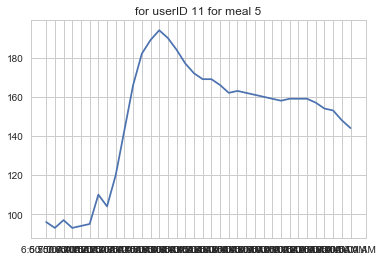

[ 96  93  97  93  94  95 110 104 120 143 166 182 189 194 190 184 177 172
 169 169 166 162 163 162 161 160 159 158 159 159 159 157 154 153 148 144]
              0
6:50:00 AM   96
6:55:00 AM   93
7:00:00 AM   97
7:05:00 AM   93
7:10:00 AM   94
7:15:00 AM   95
7:20:00 AM  110
7:25:00 AM  104
7:30:00 AM  120
7:35:00 AM  143
7:40:00 AM  166
7:45:00 AM  182
7:50:00 AM  189
7:55:00 AM  194
8:00:00 AM  190
8:05:00 AM  184
8:10:00 AM  177
8:15:00 AM  172
8:20:00 AM  169
8:25:00 AM  169
8:30:00 AM  166
8:35:00 AM  162
8:40:00 AM  163
8:45:00 AM  162
8:50:00 AM  161
8:55:00 AM  160
9:00:00 AM  159
9:05:00 AM  158
9:10:00 AM  159
9:15:00 AM  159
9:20:00 AM  159
9:25:00 AM  157
9:30:00 AM  154
9:35:00 AM  153
9:40:00 AM  148
9:45:00 AM  144
2133-018 Bar 2


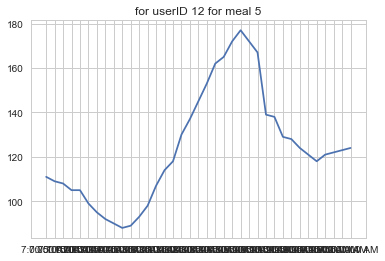

[111 109 108 105 105  99  95  92  90  88  89  93  98 107 114 118 130 137
 145 153 162 165 172 177 172 167 139 138 129 128 124 121 118 121 122 123
 124]
               0
7:00:00 AM   111
7:05:00 AM   109
7:10:00 AM   108
7:15:00 AM   105
7:20:00 AM   105
7:25:00 AM    99
7:30:00 AM    95
7:35:00 AM    92
7:40:00 AM    90
7:45:00 AM    88
7:50:00 AM    89
7:55:00 AM    93
8:00:00 AM    98
8:05:00 AM   107
8:10:00 AM   114
8:15:00 AM   118
8:20:00 AM   130
8:25:00 AM   137
8:30:00 AM   145
8:35:00 AM   153
8:40:00 AM   162
8:45:00 AM   165
8:50:00 AM   172
8:55:00 AM   177
9:00:00 AM   172
9:05:00 AM   167
9:10:00 AM   139
9:15:00 AM   138
9:20:00 AM   129
9:25:00 AM   128
9:30:00 AM   124
9:35:00 AM   121
9:40:00 AM   118
9:45:00 AM   121
9:50:00 AM   122
9:55:00 AM   123
10:00:00 AM  124
2133-019 Bar 2


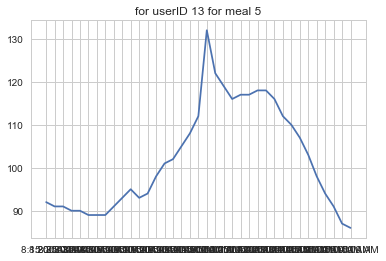

[ 92  91  91  90  90  89  89  89  91  93  95  93  94  98 101 102 105 108
 112 132 122 119 116 117 117 118 118 116 112 110 107 103  98  94  91  87
  86]
               0
8:15:00 AM    92
8:20:00 AM    91
8:25:00 AM    91
8:30:00 AM    90
8:35:00 AM    90
8:40:00 AM    89
8:45:00 AM    89
8:50:00 AM    89
8:55:00 AM    91
9:00:00 AM    93
9:05:00 AM    95
9:10:00 AM    93
9:15:00 AM    94
9:20:00 AM    98
9:25:00 AM   101
9:30:00 AM   102
9:35:00 AM   105
9:40:00 AM   108
9:45:00 AM   112
9:50:00 AM   132
9:55:00 AM   122
10:00:00 AM  119
10:05:00 AM  116
10:10:00 AM  117
10:15:00 AM  117
10:20:00 AM  118
10:25:00 AM  118
10:30:00 AM  116
10:35:00 AM  112
10:40:00 AM  110
10:45:00 AM  107
10:50:00 AM  103
10:55:00 AM   98
11:00:00 AM   94
11:05:00 AM   91
11:10:00 AM   87
11:15:00 AM   86
2133-020 Bar 2


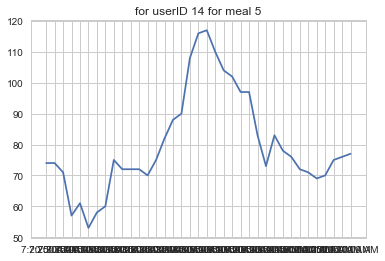

[ 74  74  71  57  61  53  58  60  75  72  72  72  70  75  82  88  90 108
 116 117 110 104 102  97  97  83  73  83  78  76  72  71  69  70  75  76
  77]
               0
7:20:00 AM    74
7:25:00 AM    74
7:30:00 AM    71
7:35:00 AM    57
7:40:00 AM    61
7:45:00 AM    53
7:50:00 AM    58
7:55:00 AM    60
8:00:00 AM    75
8:05:00 AM    72
8:10:00 AM    72
8:15:00 AM    72
8:20:00 AM    70
8:25:00 AM    75
8:30:00 AM    82
8:35:00 AM    88
8:40:00 AM    90
8:45:00 AM   108
8:50:00 AM   116
8:55:00 AM   117
9:00:00 AM   110
9:05:00 AM   104
9:10:00 AM   102
9:15:00 AM    97
9:20:00 AM    97
9:25:00 AM    83
9:30:00 AM    73
9:35:00 AM    83
9:40:00 AM    78
9:45:00 AM    76
9:50:00 AM    72
9:55:00 AM    71
10:00:00 AM   69
10:05:00 AM   70
10:10:00 AM   75
10:15:00 AM   76
10:20:00 AM   77
2133-021 Bar 2


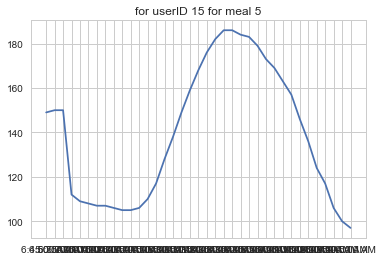

[149 150 150 112 109 108 107 107 106 105 105 106 110 117 128 138 149 159
 168 176 182 186 186 184 183 179 173 169 163 157 146 136 124 117 106 100
  97]
              0
6:45:00 AM  149
6:50:00 AM  150
6:55:00 AM  150
7:00:00 AM  112
7:05:00 AM  109
7:10:00 AM  108
7:15:00 AM  107
7:20:00 AM  107
7:25:00 AM  106
7:30:00 AM  105
7:35:00 AM  105
7:40:00 AM  106
7:45:00 AM  110
7:50:00 AM  117
7:55:00 AM  128
8:00:00 AM  138
8:05:00 AM  149
8:10:00 AM  159
8:15:00 AM  168
8:20:00 AM  176
8:25:00 AM  182
8:30:00 AM  186
8:35:00 AM  186
8:40:00 AM  184
8:45:00 AM  183
8:50:00 AM  179
8:55:00 AM  173
9:00:00 AM  169
9:05:00 AM  163
9:10:00 AM  157
9:15:00 AM  146
9:20:00 AM  136
9:25:00 AM  124
9:30:00 AM  117
9:35:00 AM  106
9:40:00 AM  100
9:45:00 AM   97
2133-022 Bar 2


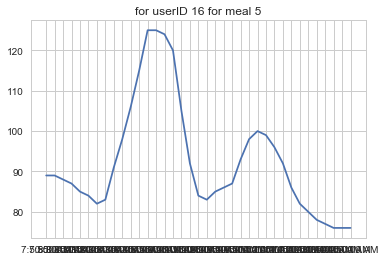

[ 89  89  88  87  85  84  82  83  91  98 106 115 125 125 124 120 105  92
  84  83  85  86  87  93  98 100  99  96  92  86  82  80  78  77  76  76
  76]
               0
7:50:00 AM    89
7:55:00 AM    89
8:00:00 AM    88
8:05:00 AM    87
8:10:00 AM    85
8:15:00 AM    84
8:20:00 AM    82
8:25:00 AM    83
8:30:00 AM    91
8:35:00 AM    98
8:40:00 AM   106
8:45:00 AM   115
8:50:00 AM   125
8:55:00 AM   125
9:00:00 AM   124
9:05:00 AM   120
9:10:00 AM   105
9:15:00 AM    92
9:20:00 AM    84
9:25:00 AM    83
9:30:00 AM    85
9:35:00 AM    86
9:40:00 AM    87
9:45:00 AM    93
9:50:00 AM    98
9:55:00 AM   100
10:00:00 AM   99
10:05:00 AM   96
10:10:00 AM   92
10:15:00 AM   86
10:20:00 AM   82
10:25:00 AM   80
10:30:00 AM   78
10:35:00 AM   77
10:40:00 AM   76
10:45:00 AM   76
10:50:00 AM   76
2133-024 Bar 2


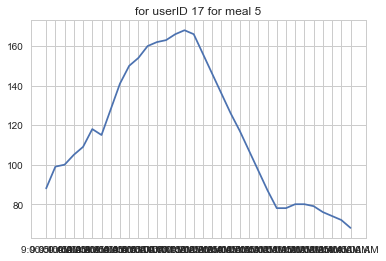

[ 88  99 100 105 109 118 115 128 141 150 154 160 162 163 166 168 166 156
 146 136 126 117 107  97  87  78  78  80  80  79  76  74  72  68]
               0
9:00:00 AM    88
9:05:00 AM    99
9:10:00 AM   100
9:15:00 AM   105
9:20:00 AM   109
9:25:00 AM   118
9:30:00 AM   115
9:35:00 AM   128
9:40:00 AM   141
9:45:00 AM   150
9:50:00 AM   154
9:55:00 AM   160
10:00:00 AM  162
10:05:00 AM  163
10:10:00 AM  166
10:15:00 AM  168
10:20:00 AM  166
10:25:00 AM  156
10:30:00 AM  146
10:35:00 AM  136
10:40:00 AM  126
10:45:00 AM  117
10:50:00 AM  107
10:55:00 AM   97
11:00:00 AM   87
11:05:00 AM   78
11:10:00 AM   78
11:15:00 AM   80
11:20:00 AM   80
11:25:00 AM   79
11:30:00 AM   76
11:35:00 AM   74
11:40:00 AM   72
11:45:00 AM   68
2133-025 Bar 2


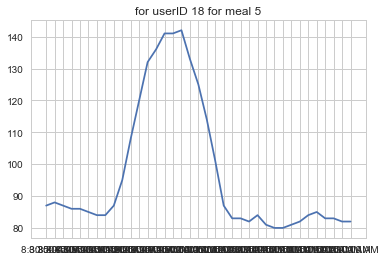

[ 87  88  87  86  86  85  84  84  87  95 108 120 132 136 141 141 142 133
 125 114 101  87  83  83  82  84  81  80  80  81  82  84  85  83  83  82
  82]
               0
8:30:00 AM    87
8:35:00 AM    88
8:40:00 AM    87
8:45:00 AM    86
8:50:00 AM    86
8:55:00 AM    85
9:00:00 AM    84
9:05:00 AM    84
9:10:00 AM    87
9:15:00 AM    95
9:20:00 AM   108
9:25:00 AM   120
9:30:00 AM   132
9:35:00 AM   136
9:40:00 AM   141
9:45:00 AM   141
9:50:00 AM   142
9:55:00 AM   133
10:00:00 AM  125
10:05:00 AM  114
10:10:00 AM  101
10:15:00 AM   87
10:20:00 AM   83
10:25:00 AM   83
10:30:00 AM   82
10:35:00 AM   84
10:40:00 AM   81
10:45:00 AM   80
10:50:00 AM   80
10:55:00 AM   81
11:00:00 AM   82
11:05:00 AM   84
11:10:00 AM   85
11:15:00 AM   83
11:20:00 AM   83
11:25:00 AM   82
11:30:00 AM   82
2133-026 Bar 2


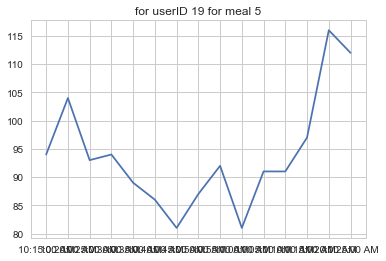

[ 94 104  93  94  89  86  81  87  92  81  91  91  97 116 112]
               0
10:15:00 AM   94
10:20:00 AM  104
10:25:00 AM   93
10:30:00 AM   94
10:35:00 AM   89
10:40:00 AM   86
10:45:00 AM   81
10:50:00 AM   87
10:55:00 AM   92
11:00:00 AM   81
11:05:00 AM   91
11:10:00 AM   91
11:15:00 AM   97
11:20:00 AM  116
11:25:00 AM  112
2133-028 Bar 2


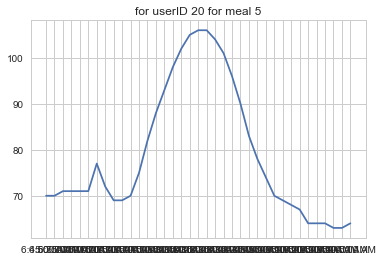

[ 70  70  71  71  71  71  77  72  69  69  70  75  82  88  93  98 102 105
 106 106 104 101  96  90  83  78  74  70  69  68  67  64  64  64  63  63
  64]
              0
6:45:00 AM   70
6:50:00 AM   70
6:55:00 AM   71
7:00:00 AM   71
7:05:00 AM   71
7:10:00 AM   71
7:15:00 AM   77
7:20:00 AM   72
7:25:00 AM   69
7:30:00 AM   69
7:35:00 AM   70
7:40:00 AM   75
7:45:00 AM   82
7:50:00 AM   88
7:55:00 AM   93
8:00:00 AM   98
8:05:00 AM  102
8:10:00 AM  105
8:15:00 AM  106
8:20:00 AM  106
8:25:00 AM  104
8:30:00 AM  101
8:35:00 AM   96
8:40:00 AM   90
8:45:00 AM   83
8:50:00 AM   78
8:55:00 AM   74
9:00:00 AM   70
9:05:00 AM   69
9:10:00 AM   68
9:15:00 AM   67
9:20:00 AM   64
9:25:00 AM   64
9:30:00 AM   64
9:35:00 AM   63
9:40:00 AM   63
9:45:00 AM   64
2133-030 Bar 2


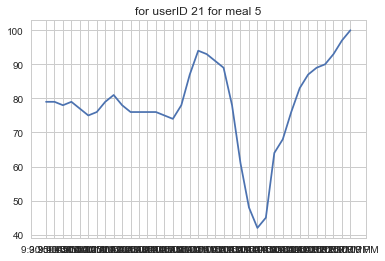

[ 79  79  78  79  77  75  76  79  81  78  76  76  76  76  75  74  78  87
  94  93  91  89  78  61  48  42  45  64  68  76  83  87  89  90  93  97
 100]
               0
9:30:00 AM    79
9:35:00 AM    79
9:40:00 AM    78
9:45:00 AM    79
9:50:00 AM    77
9:55:00 AM    75
10:00:00 AM   76
10:05:00 AM   79
10:10:00 AM   81
10:15:00 AM   78
10:20:00 AM   76
10:25:00 AM   76
10:30:00 AM   76
10:35:00 AM   76
10:40:00 AM   75
10:45:00 AM   74
10:50:00 AM   78
10:55:00 AM   87
11:00:00 AM   94
11:05:00 AM   93
11:10:00 AM   91
11:15:00 AM   89
11:20:00 AM   78
11:25:00 AM   61
11:30:00 AM   48
11:35:00 AM   42
11:40:00 AM   45
11:45:00 AM   64
11:50:00 AM   68
11:55:00 AM   76
12:00:00 PM   83
12:05:00 PM   87
12:10:00 PM   89
12:15:00 PM   90
12:20:00 PM   93
12:25:00 PM   97
12:30:00 PM  100
2133-032 Bar 2


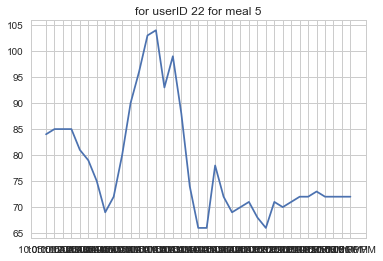

[ 84  85  85  85  81  79  75  69  72  80  90  96 103 104  93  99  88  74
  66  66  78  72  69  70  71  68  66  71  70  71  72  72  73  72  72  72
  72]
               0
10:05:00 AM   84
10:10:00 AM   85
10:15:00 AM   85
10:20:00 AM   85
10:25:00 AM   81
10:30:00 AM   79
10:35:00 AM   75
10:40:00 AM   69
10:45:00 AM   72
10:50:00 AM   80
10:55:00 AM   90
11:00:00 AM   96
11:05:00 AM  103
11:10:00 AM  104
11:15:00 AM   93
11:20:00 AM   99
11:25:00 AM   88
11:30:00 AM   74
11:35:00 AM   66
11:40:00 AM   66
11:45:00 AM   78
11:50:00 AM   72
11:55:00 AM   69
12:00:00 PM   70
12:05:00 PM   71
12:10:00 PM   68
12:15:00 PM   66
12:20:00 PM   71
12:25:00 PM   70
12:30:00 PM   71
12:35:00 PM   72
12:40:00 PM   72
12:45:00 PM   73
12:50:00 PM   72
12:55:00 PM   72
1:00:00 PM    72
1:05:00 PM    72
2133-033 Bar 2


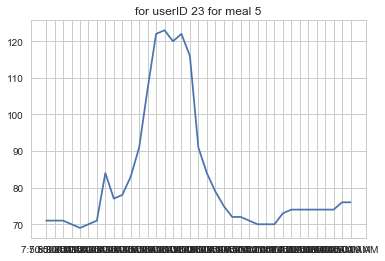

[ 71  71  71  70  69  70  71  84  77  78  83  91 107 122 123 120 122 116
  91  84  79  75  72  72  71  70  70  70  73  74  74  74  74  74  74  76
  76]
               0
7:50:00 AM    71
7:55:00 AM    71
8:00:00 AM    71
8:05:00 AM    70
8:10:00 AM    69
8:15:00 AM    70
8:20:00 AM    71
8:25:00 AM    84
8:30:00 AM    77
8:35:00 AM    78
8:40:00 AM    83
8:45:00 AM    91
8:50:00 AM   107
8:55:00 AM   122
9:00:00 AM   123
9:05:00 AM   120
9:10:00 AM   122
9:15:00 AM   116
9:20:00 AM    91
9:25:00 AM    84
9:30:00 AM    79
9:35:00 AM    75
9:40:00 AM    72
9:45:00 AM    72
9:50:00 AM    71
9:55:00 AM    70
10:00:00 AM   70
10:05:00 AM   70
10:10:00 AM   73
10:15:00 AM   74
10:20:00 AM   74
10:25:00 AM   74
10:30:00 AM   74
10:35:00 AM   74
10:40:00 AM   74
10:45:00 AM   76
10:50:00 AM   76
2133-035 Bar 2


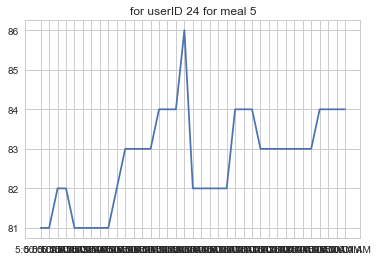

[81 81 82 82 81 81 81 81 81 82 83 83 83 83 84 84 84 86 82 82 82 82 82 84
 84 84 83 83 83 83 83 83 83 84 84 84 84]
             0
5:00:00 AM  81
5:05:00 AM  81
5:10:00 AM  82
5:15:00 AM  82
5:20:00 AM  81
5:25:00 AM  81
5:30:00 AM  81
5:35:00 AM  81
5:40:00 AM  81
5:45:00 AM  82
5:50:00 AM  83
5:55:00 AM  83
6:00:00 AM  83
6:05:00 AM  83
6:10:00 AM  84
6:15:00 AM  84
6:20:00 AM  84
6:25:00 AM  86
6:30:00 AM  82
6:35:00 AM  82
6:40:00 AM  82
6:45:00 AM  82
6:50:00 AM  82
6:55:00 AM  84
7:00:00 AM  84
7:05:00 AM  84
7:10:00 AM  83
7:15:00 AM  83
7:20:00 AM  83
7:25:00 AM  83
7:30:00 AM  83
7:35:00 AM  83
7:40:00 AM  83
7:45:00 AM  84
7:50:00 AM  84
7:55:00 AM  84
8:00:00 AM  84
2133-036 Bar 2


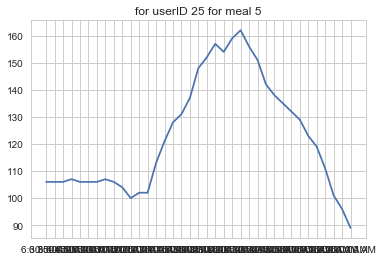

[106 106 106 107 106 106 106 107 106 104 100 102 102 113 121 128 131 137
 148 152 157 154 159 162 156 151 142 138 135 132 129 123 119 111 101  96
  89]
              0
6:30:00 AM  106
6:35:00 AM  106
6:40:00 AM  106
6:45:00 AM  107
6:50:00 AM  106
6:55:00 AM  106
7:00:00 AM  106
7:05:00 AM  107
7:10:00 AM  106
7:15:00 AM  104
7:20:00 AM  100
7:25:00 AM  102
7:30:00 AM  102
7:35:00 AM  113
7:40:00 AM  121
7:45:00 AM  128
7:50:00 AM  131
7:55:00 AM  137
8:00:00 AM  148
8:05:00 AM  152
8:10:00 AM  157
8:15:00 AM  154
8:20:00 AM  159
8:25:00 AM  162
8:30:00 AM  156
8:35:00 AM  151
8:40:00 AM  142
8:45:00 AM  138
8:50:00 AM  135
8:55:00 AM  132
9:00:00 AM  129
9:05:00 AM  123
9:10:00 AM  119
9:15:00 AM  111
9:20:00 AM  101
9:25:00 AM   96
9:30:00 AM   89
2133-037 Bar 2


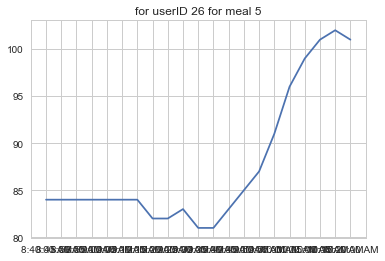

[ 84  84  84  84  84  84  84  82  82  83  81  81  83  85  87  91  96  99
 101 102 101]
               0
8:40:00 AM    84
8:45:00 AM    84
8:50:00 AM    84
8:55:00 AM    84
9:00:00 AM    84
9:05:00 AM    84
9:10:00 AM    84
9:15:00 AM    82
9:20:00 AM    82
9:25:00 AM    83
9:30:00 AM    81
9:35:00 AM    81
9:40:00 AM    83
9:45:00 AM    85
9:50:00 AM    87
9:55:00 AM    91
10:00:00 AM   96
10:05:00 AM   99
10:10:00 AM  101
10:15:00 AM  102
10:20:00 AM  101
2133-039 Bar 2


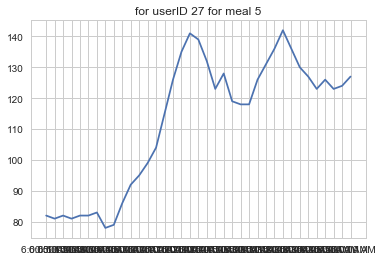

[ 82  81  82  81  82  82  83  78  79  86  92  95  99 104 115 126 135 141
 139 132 123 128 119 118 118 126 131 136 142 136 130 127 123 126 123 124
 127]
              0
6:00:00 AM   82
6:05:00 AM   81
6:10:00 AM   82
6:15:00 AM   81
6:20:00 AM   82
6:25:00 AM   82
6:30:00 AM   83
6:35:00 AM   78
6:40:00 AM   79
6:45:00 AM   86
6:50:00 AM   92
6:55:00 AM   95
7:00:00 AM   99
7:05:00 AM  104
7:10:00 AM  115
7:15:00 AM  126
7:20:00 AM  135
7:25:00 AM  141
7:30:00 AM  139
7:35:00 AM  132
7:40:00 AM  123
7:45:00 AM  128
7:50:00 AM  119
7:55:00 AM  118
8:00:00 AM  118
8:05:00 AM  126
8:10:00 AM  131
8:15:00 AM  136
8:20:00 AM  142
8:25:00 AM  136
8:30:00 AM  130
8:35:00 AM  127
8:40:00 AM  123
8:45:00 AM  126
8:50:00 AM  123
8:55:00 AM  124
9:00:00 AM  127
2133-040 Bar 2


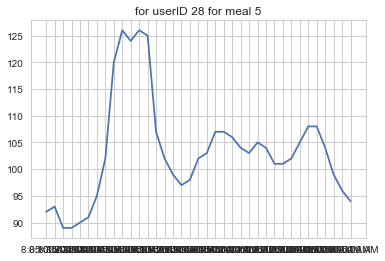

[ 92  93  89  89  90  91  95 102 120 126 124 126 125 107 102  99  97  98
 102 103 107 107 106 104 103 105 104 101 101 102 105 108 108 104  99  96
  94]
               0
8:05:00 AM    92
8:10:00 AM    93
8:15:00 AM    89
8:20:00 AM    89
8:25:00 AM    90
8:30:00 AM    91
8:35:00 AM    95
8:40:00 AM   102
8:45:00 AM   120
8:50:00 AM   126
8:55:00 AM   124
9:00:00 AM   126
9:05:00 AM   125
9:10:00 AM   107
9:15:00 AM   102
9:20:00 AM    99
9:25:00 AM    97
9:30:00 AM    98
9:35:00 AM   102
9:40:00 AM   103
9:45:00 AM   107
9:50:00 AM   107
9:55:00 AM   106
10:00:00 AM  104
10:05:00 AM  103
10:10:00 AM  105
10:15:00 AM  104
10:20:00 AM  101
10:25:00 AM  101
10:30:00 AM  102
10:35:00 AM  105
10:40:00 AM  108
10:45:00 AM  108
10:50:00 AM  104
10:55:00 AM   99
11:00:00 AM   96
11:05:00 AM   94
2133-041 Bar 2


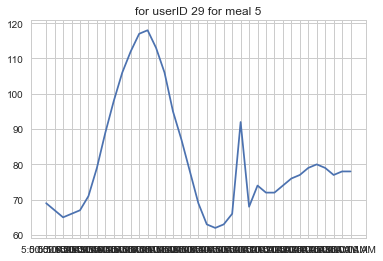

[ 69  67  65  66  67  71  79  89  98 106 112 117 118 113 106  95  87  78
  69  63  62  63  66  92  68  74  72  72  74  76  77  79  80  79  77  78
  78]
              0
5:00:00 AM   69
5:05:00 AM   67
5:10:00 AM   65
5:15:00 AM   66
5:20:00 AM   67
5:25:00 AM   71
5:30:00 AM   79
5:35:00 AM   89
5:40:00 AM   98
5:45:00 AM  106
5:50:00 AM  112
5:55:00 AM  117
6:00:00 AM  118
6:05:00 AM  113
6:10:00 AM  106
6:15:00 AM   95
6:20:00 AM   87
6:25:00 AM   78
6:30:00 AM   69
6:35:00 AM   63
6:40:00 AM   62
6:45:00 AM   63
6:50:00 AM   66
6:55:00 AM   92
7:00:00 AM   68
7:05:00 AM   74
7:10:00 AM   72
7:15:00 AM   72
7:20:00 AM   74
7:25:00 AM   76
7:30:00 AM   77
7:35:00 AM   79
7:40:00 AM   80
7:45:00 AM   79
7:50:00 AM   77
7:55:00 AM   78
8:00:00 AM   78


In [3]:
for i in range(0,len(meal_list)):
    for j in range(0,len(ID_list)):
#         from datetime import datetime

#         import calendar
     
        print(ID_list[j],meal_list[i])
        test =data[data['userID'].isin([ID_list[j]]) & data['Meal'].isin([meal_list[i]]) ]
        time = np.array(test['time'])
        glucose = np.array(test['GlucoseValue'])
        glucose = glucose.astype(int)
        plt.plot(time,glucose)
        plt.title('for userID '+str(j)+' for meal '+str(i))
        plt.show()
        print(glucose)
        file_name = ID_list[j]+"_"+meal_list[i]+".csv"
        glucose = pd.DataFrame( glucose,time)
        print(glucose)
        glucose.to_csv(file_name)
        
#         print(time[len(time)-1],time[0])
       
   